# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:15:00.328569: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:15:04.407549
2025-04-14 21:15:04.407549


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 2
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:14:57"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

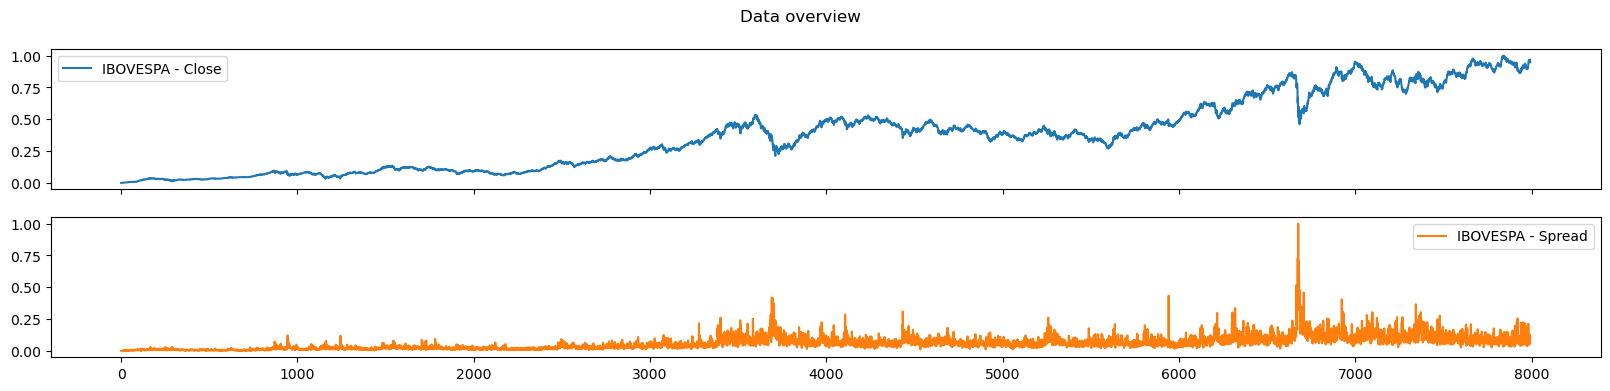

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

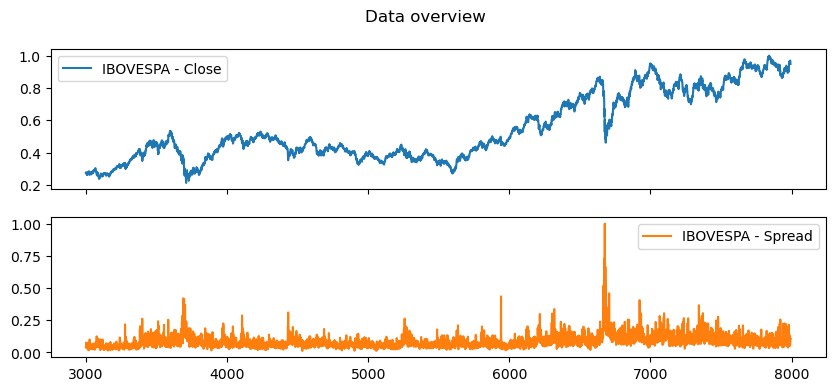

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

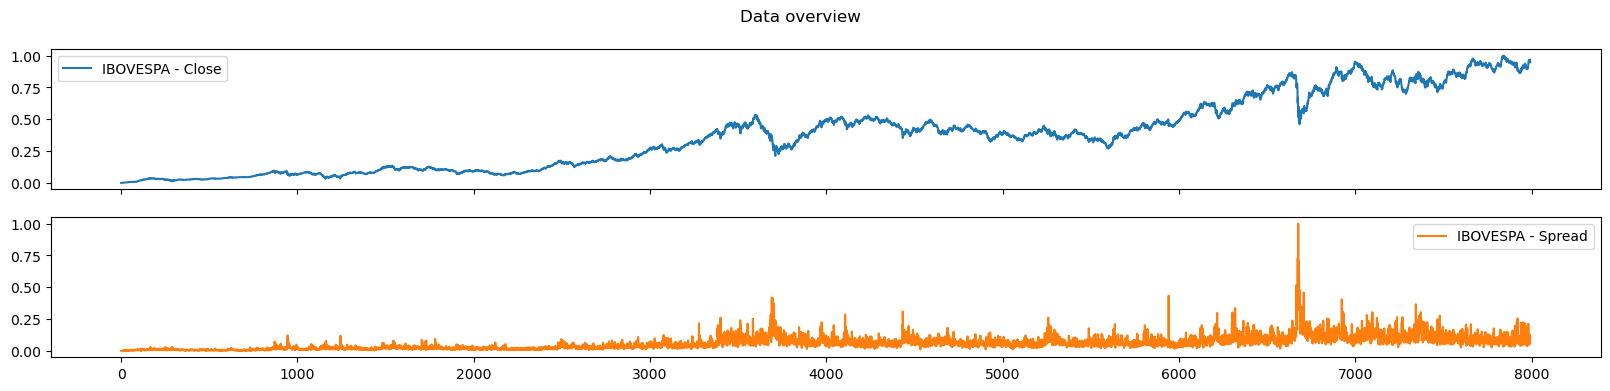

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

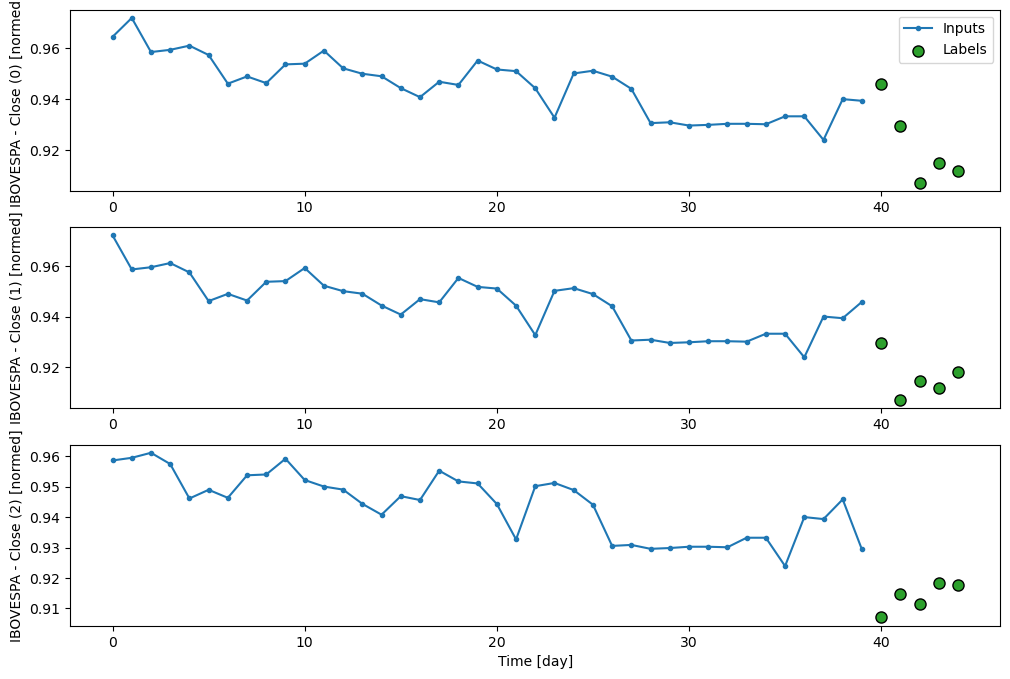

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:52 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.3136 - mean_squared_error: 6.2841e-05 - root_mean_squared_error: 0.0078  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 63.6386 - mean_squared_error: 7.0207e-05 - root_mean_squared_error: 0.0083

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 56.1381 - mean_squared_error: 6.8472e-05 - root_mean_squared_error: 0.0082

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 50.7708 - mean_squared_error: 6.4992e-05 - root_mean_squared_error: 0.0080

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 46.6152 - mean_squared_error: 6.1306e-05 - root_mean_squared_error: 0.0078

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 43.3419 - mean_squared_error: 5.8035e-05 - root_mean_squared_error: 0.0075

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 40.6944 - mean_squared_error: 5.5366e-05 - root_mean_squared_error: 0.0073

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 38.5796 - mean_squared_error: 5.3458e-05 - root_mean_squared_error: 0.0072

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 36.7348 - mean_squared_error: 5.1641e-05 - root_mean_squared_error: 0.0071

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 35.0824 - mean_squared_error: 4.9877e-05 - root_mean_squared_error: 0.0070

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 34.3224 - mean_squared_error: 4.9033e-05 - root_mean_squared_error: 0.0069

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 32.9681 - mean_squared_error: 4.7860e-05 - root_mean_squared_error: 0.0068

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 31.7843 - mean_squared_error: 4.7311e-05 - root_mean_squared_error: 0.0068

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 30.7786 - mean_squared_error: 4.8305e-05 - root_mean_squared_error: 0.0069

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 30.3557 - mean_squared_error: 4.9738e-05 - root_mean_squared_error: 0.0070

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 29.5868 - mean_squared_error: 5.2579e-05 - root_mean_squared_error: 0.0071

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 28.8968 - mean_squared_error: 5.5478e-05 - root_mean_squared_error: 0.0073

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 28.5702 - mean_squared_error: 5.6743e-05 - root_mean_squared_error: 0.0074

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 28.2887 - mean_squared_error: 5.8418e-05 - root_mean_squared_error: 0.0075

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 28.0524 - mean_squared_error: 6.0439e-05 - root_mean_squared_error: 0.0076

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 27.8243 - mean_squared_error: 6.2308e-05 - root_mean_squared_error: 0.0077

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 27.6032 - mean_squared_error: 6.4031e-05 - root_mean_squared_error: 0.0078

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 27.2395 - mean_squared_error: 6.8926e-05 - root_mean_squared_error: 0.0080

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 26.9517 - mean_squared_error: 7.5299e-05 - root_mean_squared_error: 0.0083

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 26.6749 - mean_squared_error: 8.1021e-05 - root_mean_squared_error: 0.0086

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 26.3977 - mean_squared_error: 8.6077e-05 - root_mean_squared_error: 0.0088

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 26.1341 - mean_squared_error: 9.1121e-05 - root_mean_squared_error: 0.0091

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 25.8719 - mean_squared_error: 9.5625e-05 - root_mean_squared_error: 0.0093

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.6281 - mean_squared_error: 1.0030e-04 - root_mean_squared_error: 0.0095

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 25.4001 - mean_squared_error: 1.0502e-04 - root_mean_squared_error: 0.0097

 56/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.1716 - mean_squared_error: 1.0921e-04 - root_mean_squared_error: 0.0099

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.9410 - mean_squared_error: 1.1289e-04 - root_mean_squared_error: 0.0100

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 24.7246 - mean_squared_error: 1.1638e-04 - root_mean_squared_error: 0.0102

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 24.5131 - mean_squared_error: 1.1953e-04 - root_mean_squared_error: 0.0103

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 24.3056 - mean_squared_error: 1.2238e-04 - root_mean_squared_error: 0.0105

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 24.1142 - mean_squared_error: 1.2513e-04 - root_mean_squared_error: 0.0106

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 23.9444 - mean_squared_error: 1.2792e-04 - root_mean_squared_error: 0.0107

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 23.7764 - mean_squared_error: 1.3043e-04 - root_mean_squared_error: 0.0108

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 23.6191 - mean_squared_error: 1.3295e-04 - root_mean_squared_error: 0.0109

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 23.4794 - mean_squared_error: 1.3590e-04 - root_mean_squared_error: 0.0111

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 23.3621 - mean_squared_error: 1.4050e-04 - root_mean_squared_error: 0.0112

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 23.2665 - mean_squared_error: 1.4776e-04 - root_mean_squared_error: 0.0115

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 23.1784 - mean_squared_error: 1.5548e-04 - root_mean_squared_error: 0.0117

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 23.0870 - mean_squared_error: 1.6264e-04 - root_mean_squared_error: 0.0120

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 22.9931 - mean_squared_error: 1.6932e-04 - root_mean_squared_error: 0.0122

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 22.8975 - mean_squared_error: 1.7561e-04 - root_mean_squared_error: 0.0124

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 22.8045 - mean_squared_error: 1.8186e-04 - root_mean_squared_error: 0.0126

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 22.7132 - mean_squared_error: 1.8801e-04 - root_mean_squared_error: 0.0128

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 22.6219 - mean_squared_error: 1.9401e-04 - root_mean_squared_error: 0.0130

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 22.5352 - mean_squared_error: 2.0089e-04 - root_mean_squared_error: 0.0132

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 22.4502 - mean_squared_error: 2.0805e-04 - root_mean_squared_error: 0.0134

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 22.3643 - mean_squared_error: 2.1490e-04 - root_mean_squared_error: 0.0136

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 22.2779 - mean_squared_error: 2.2155e-04 - root_mean_squared_error: 0.0138

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 22.1921 - mean_squared_error: 2.2826e-04 - root_mean_squared_error: 0.0140

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 22.1053 - mean_squared_error: 2.3476e-04 - root_mean_squared_error: 0.0142

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 22.0197 - mean_squared_error: 2.4180e-04 - root_mean_squared_error: 0.0144

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 21.9332 - mean_squared_error: 2.4876e-04 - root_mean_squared_error: 0.0146

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 21.8457 - mean_squared_error: 2.5549e-04 - root_mean_squared_error: 0.0148

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 21.7577 - mean_squared_error: 2.6219e-04 - root_mean_squared_error: 0.0149

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 21.6724 - mean_squared_error: 2.7005e-04 - root_mean_squared_error: 0.0151

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 21.6007 - mean_squared_error: 2.8429e-04 - root_mean_squared_error: 0.0155

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 21.5366 - mean_squared_error: 3.0079e-04 - root_mean_squared_error: 0.0158

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 21.4736 - mean_squared_error: 3.1724e-04 - root_mean_squared_error: 0.0161

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 21.4149 - mean_squared_error: 3.3582e-04 - root_mean_squared_error: 0.0165

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 21.3627 - mean_squared_error: 3.6035e-04 - root_mean_squared_error: 0.0169

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 21.3163 - mean_squared_error: 3.9092e-04 - root_mean_squared_error: 0.0174

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 21.2718 - mean_squared_error: 4.2323e-04 - root_mean_squared_error: 0.0179

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 21.2294 - mean_squared_error: 4.5738e-04 - root_mean_squared_error: 0.0184

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 21.1862 - mean_squared_error: 4.9043e-04 - root_mean_squared_error: 0.0189

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 21.1416 - mean_squared_error: 5.2221e-04 - root_mean_squared_error: 0.0194

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 21.0952 - mean_squared_error: 5.5261e-04 - root_mean_squared_error: 0.0199

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 21.0484 - mean_squared_error: 5.8196e-04 - root_mean_squared_error: 0.0203

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 21.0009 - mean_squared_error: 6.1020e-04 - root_mean_squared_error: 0.0207

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 20.9539 - mean_squared_error: 6.3801e-04 - root_mean_squared_error: 0.0212

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 20.9083 - mean_squared_error: 6.6618e-04 - root_mean_squared_error: 0.0216

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 20.8619 - mean_squared_error: 6.9327e-04 - root_mean_squared_error: 0.0220

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 20.8142 - mean_squared_error: 7.1922e-04 - root_mean_squared_error: 0.0224

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 20.7656 - mean_squared_error: 7.4410e-04 - root_mean_squared_error: 0.0228

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 20.7170 - mean_squared_error: 7.6820e-04 - root_mean_squared_error: 0.0231

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 20.6697 - mean_squared_error: 7.9193e-04 - root_mean_squared_error: 0.0235

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 20.6218 - mean_squared_error: 8.1476e-04 - root_mean_squared_error: 0.0239

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 20.5727 - mean_squared_error: 8.3662e-04 - root_mean_squared_error: 0.0242

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 20.5230 - mean_squared_error: 8.5762e-04 - root_mean_squared_error: 0.0245

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 20.4741 - mean_squared_error: 8.7818e-04 - root_mean_squared_error: 0.0248

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 20.4263 - mean_squared_error: 8.9866e-04 - root_mean_squared_error: 0.0251

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 20.3783 - mean_squared_error: 9.1842e-04 - root_mean_squared_error: 0.0254

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 20.3295 - mean_squared_error: 9.3739e-04 - root_mean_squared_error: 0.0257

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 20.2802 - mean_squared_error: 9.5561e-04 - root_mean_squared_error: 0.0260

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 20.2319 - mean_squared_error: 9.7349e-04 - root_mean_squared_error: 0.0263

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 20.1856 - mean_squared_error: 9.9131e-04 - root_mean_squared_error: 0.0266

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 20.1403 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0268    

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 20.0946 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0271

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 20.0497 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0274

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 20.0062 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0276

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 19.9641 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 19.9227 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 19.8820 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0284

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 19.8417 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 19.8013 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 19.7614 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 19.7231 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0294

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 19.6851 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 19.6467 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0299

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 19.6083 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 19.5697 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 19.5306 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 19.5110 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 19.4922 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 19.4743 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 19.4569 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0311

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 19.4224 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 19.3880 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 19.3541 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 19.3210 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 19.2886 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 19.2559 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 19.2229 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 19.1896 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0335

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 19.1563 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 19.1227 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0340

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 19.0887 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0343

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 19.0544 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 19.0201 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 18.9861 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350 - val_loss: 0.0663 - val_mean_absolute_error: 0.0663 - val_mean_absolute_percentage_error: 7.0168 - val_mean_squared_error: 0.0050 - val_root_mean_squared_error: 0.0706 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.6003 - mean_absolute_error: 0.6003 - mean_absolute_percentage_error: 8065.3096 - mean_squared_error: 0.3604 - root_mean_squared_error: 0.6003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6000 - mean_absolute_error: 0.6000 - mean_absolute_percentage_error: 6747.1694 - mean_squared_error: 0.3600 - root_mean_squared_error: 0.6000 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5954 - mean_absolute_error: 0.5954 - mean_absolute_percentage_error: 5726.4790 - mean_squared_error: 0.3546 - root_mean_squared_error: 0.5954

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5874 - mean_absolute_error: 0.5874 - mean_absolute_percentage_error: 5064.6274 - mean_squared_error: 0.3457 - root_mean_squared_error: 0.5878

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5711 - mean_absolute_error: 0.5711 - mean_absolute_percentage_error: 4599.9155 - mean_squared_error: 0.3314 - root_mean_squared_error: 0.5750

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5530 - mean_absolute_error: 0.5530 - mean_absolute_percentage_error: 4241.3311 - mean_squared_error: 0.3163 - root_mean_squared_error: 0.5611

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5389 - mean_absolute_error: 0.5389 - mean_absolute_percentage_error: 3963.3923 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5494

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5272 - mean_absolute_error: 0.5272 - mean_absolute_percentage_error: 3739.1416 - mean_squared_error: 0.2931 - root_mean_squared_error: 0.5391

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5165 - mean_absolute_error: 0.5165 - mean_absolute_percentage_error: 3548.8960 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.5295

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5149 - mean_absolute_error: 0.5149 - mean_absolute_percentage_error: 3402.6716 - mean_squared_error: 0.3172 - root_mean_squared_error: 0.5501

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.5234 - mean_absolute_error: 0.5234 - mean_absolute_percentage_error: 3357.7317 - mean_squared_error: 0.3638 - root_mean_squared_error: 0.5785

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.5303 - mean_absolute_error: 0.5303 - mean_absolute_percentage_error: 3313.0642 - mean_squared_error: 0.4034 - root_mean_squared_error: 0.6030

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.5371 - mean_absolute_error: 0.5371 - mean_absolute_percentage_error: 3271.5730 - mean_squared_error: 0.4388 - root_mean_squared_error: 0.6250

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5437 - mean_absolute_error: 0.5437 - mean_absolute_percentage_error: 3232.0000 - mean_squared_error: 0.4703 - root_mean_squared_error: 0.6447

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5552 - mean_absolute_error: 0.5552 - mean_absolute_percentage_error: 3155.7571 - mean_squared_error: 0.5223 - root_mean_squared_error: 0.6778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5639 - mean_absolute_error: 0.5639 - mean_absolute_percentage_error: 3081.4272 - mean_squared_error: 0.5617 - root_mean_squared_error: 0.7036

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.5670 - mean_absolute_error: 0.5670 - mean_absolute_percentage_error: 3044.7854 - mean_squared_error: 0.5774 - root_mean_squared_error: 0.7143

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.5693 - mean_absolute_error: 0.5693 - mean_absolute_percentage_error: 3008.4421 - mean_squared_error: 0.5909 - root_mean_squared_error: 0.7236

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.5708 - mean_absolute_error: 0.5708 - mean_absolute_percentage_error: 2972.4119 - mean_squared_error: 0.6024 - root_mean_squared_error: 0.7317

 31/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.5718 - mean_absolute_error: 0.5718 - mean_absolute_percentage_error: 2936.9199 - mean_squared_error: 0.6122 - root_mean_squared_error: 0.7388

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.5722 - mean_absolute_error: 0.5722 - mean_absolute_percentage_error: 2902.0098 - mean_squared_error: 0.6206 - root_mean_squared_error: 0.7450

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.5722 - mean_absolute_error: 0.5722 - mean_absolute_percentage_error: 2867.6775 - mean_squared_error: 0.6276 - root_mean_squared_error: 0.7504

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.5717 - mean_absolute_error: 0.5717 - mean_absolute_percentage_error: 2833.8757 - mean_squared_error: 0.6335 - root_mean_squared_error: 0.7551

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.5709 - mean_absolute_error: 0.5709 - mean_absolute_percentage_error: 2800.7090 - mean_squared_error: 0.6384 - root_mean_squared_error: 0.7592

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.5683 - mean_absolute_error: 0.5683 - mean_absolute_percentage_error: 2736.5215 - mean_squared_error: 0.6456 - root_mean_squared_error: 0.7656

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.5649 - mean_absolute_error: 0.5649 - mean_absolute_percentage_error: 2674.9683 - mean_squared_error: 0.6500 - root_mean_squared_error: 0.7702

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.5606 - mean_absolute_error: 0.5606 - mean_absolute_percentage_error: 2615.8782 - mean_squared_error: 0.6523 - root_mean_squared_error: 0.7734

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.5583 - mean_absolute_error: 0.5583 - mean_absolute_percentage_error: 2587.2715 - mean_squared_error: 0.6527 - root_mean_squared_error: 0.7745

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.5559 - mean_absolute_error: 0.5559 - mean_absolute_percentage_error: 2559.2646 - mean_squared_error: 0.6528 - root_mean_squared_error: 0.7753

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.5507 - mean_absolute_error: 0.5507 - mean_absolute_percentage_error: 2504.9482 - mean_squared_error: 0.6520 - root_mean_squared_error: 0.7762

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.5452 - mean_absolute_error: 0.5452 - mean_absolute_percentage_error: 2452.8389 - mean_squared_error: 0.6500 - root_mean_squared_error: 0.7763

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.5395 - mean_absolute_error: 0.5395 - mean_absolute_percentage_error: 2402.8811 - mean_squared_error: 0.6472 - root_mean_squared_error: 0.7758

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.5336 - mean_absolute_error: 0.5336 - mean_absolute_percentage_error: 2354.9700 - mean_squared_error: 0.6438 - root_mean_squared_error: 0.7746

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5277 - mean_absolute_error: 0.5277 - mean_absolute_percentage_error: 2309.0000 - mean_squared_error: 0.6397 - root_mean_squared_error: 0.7731

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5217 - mean_absolute_error: 0.5217 - mean_absolute_percentage_error: 2264.8772 - mean_squared_error: 0.6353 - root_mean_squared_error: 0.7711

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.5157 - mean_absolute_error: 0.5157 - mean_absolute_percentage_error: 2222.5259 - mean_squared_error: 0.6305 - root_mean_squared_error: 0.7689

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.5098 - mean_absolute_error: 0.5098 - mean_absolute_percentage_error: 2181.8418 - mean_squared_error: 0.6255 - root_mean_squared_error: 0.7663

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.5038 - mean_absolute_error: 0.5038 - mean_absolute_percentage_error: 2142.7507 - mean_squared_error: 0.6203 - root_mean_squared_error: 0.7636

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.4951 - mean_absolute_error: 0.4951 - mean_absolute_percentage_error: 2086.9211 - mean_squared_error: 0.6122 - root_mean_squared_error: 0.7592

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4894 - mean_absolute_error: 0.4894 - mean_absolute_percentage_error: 2051.4539 - mean_squared_error: 0.6067 - root_mean_squared_error: 0.7561

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.4838 - mean_absolute_error: 0.4838 - mean_absolute_percentage_error: 2017.3107 - mean_squared_error: 0.6012 - root_mean_squared_error: 0.7529

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 1984.4105 - mean_squared_error: 0.5956 - root_mean_squared_error: 0.7495

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.4728 - mean_absolute_error: 0.4728 - mean_absolute_percentage_error: 1952.6925 - mean_squared_error: 0.5900 - root_mean_squared_error: 0.7462

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.4675 - mean_absolute_error: 0.4675 - mean_absolute_percentage_error: 1922.0826 - mean_squared_error: 0.5845 - root_mean_squared_error: 0.7428

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.4623 - mean_absolute_error: 0.4623 - mean_absolute_percentage_error: 1892.5181 - mean_squared_error: 0.5789 - root_mean_squared_error: 0.7393

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.4571 - mean_absolute_error: 0.4571 - mean_absolute_percentage_error: 1863.9468 - mean_squared_error: 0.5734 - root_mean_squared_error: 0.7358

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.4521 - mean_absolute_error: 0.4521 - mean_absolute_percentage_error: 1836.3284 - mean_squared_error: 0.5679 - root_mean_squared_error: 0.7323

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.4448 - mean_absolute_error: 0.4448 - mean_absolute_percentage_error: 1796.5806 - mean_squared_error: 0.5599 - root_mean_squared_error: 0.7271

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4377 - mean_absolute_error: 0.4377 - mean_absolute_percentage_error: 1758.7192 - mean_squared_error: 0.5519 - root_mean_squared_error: 0.7218

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.4331 - mean_absolute_error: 0.4331 - mean_absolute_percentage_error: 1734.4564 - mean_squared_error: 0.5467 - root_mean_squared_error: 0.7183

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.4286 - mean_absolute_error: 0.4286 - mean_absolute_percentage_error: 1710.9331 - mean_squared_error: 0.5416 - root_mean_squared_error: 0.7148

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.4242 - mean_absolute_error: 0.4242 - mean_absolute_percentage_error: 1688.1140 - mean_squared_error: 0.5365 - root_mean_squared_error: 0.7114

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.4199 - mean_absolute_error: 0.4199 - mean_absolute_percentage_error: 1665.9696 - mean_squared_error: 0.5315 - root_mean_squared_error: 0.7079

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - mean_absolute_percentage_error: 1644.4692 - mean_squared_error: 0.5266 - root_mean_squared_error: 0.7045

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.4115 - mean_absolute_error: 0.4115 - mean_absolute_percentage_error: 1623.5896 - mean_squared_error: 0.5218 - root_mean_squared_error: 0.7011

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.4075 - mean_absolute_error: 0.4075 - mean_absolute_percentage_error: 1603.3000 - mean_squared_error: 0.5170 - root_mean_squared_error: 0.6978

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.4036 - mean_absolute_error: 0.4036 - mean_absolute_percentage_error: 1583.5730 - mean_squared_error: 0.5123 - root_mean_squared_error: 0.6944

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 1554.9910 - mean_squared_error: 0.5055 - root_mean_squared_error: 0.6895

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.3941 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 1536.5754 - mean_squared_error: 0.5010 - root_mean_squared_error: 0.6862

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3905 - mean_absolute_error: 0.3905 - mean_absolute_percentage_error: 1518.6455 - mean_squared_error: 0.4966 - root_mean_squared_error: 0.6830

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3852 - mean_absolute_error: 0.3852 - mean_absolute_percentage_error: 1492.6196 - mean_squared_error: 0.4901 - root_mean_squared_error: 0.6782

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 1475.8251 - mean_squared_error: 0.4859 - root_mean_squared_error: 0.6751

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3784 - mean_absolute_error: 0.3784 - mean_absolute_percentage_error: 1459.4685 - mean_squared_error: 0.4817 - root_mean_squared_error: 0.6720

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3736 - mean_absolute_error: 0.3736 - mean_absolute_percentage_error: 1435.7096 - mean_squared_error: 0.4756 - root_mean_squared_error: 0.6674

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3705 - mean_absolute_error: 0.3705 - mean_absolute_percentage_error: 1420.3527 - mean_squared_error: 0.4717 - root_mean_squared_error: 0.6644

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 1398.0099 - mean_squared_error: 0.4659 - root_mean_squared_error: 0.6600

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 1383.5594 - mean_squared_error: 0.4621 - root_mean_squared_error: 0.6571

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3589 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 1362.5153 - mean_squared_error: 0.4565 - root_mean_squared_error: 0.6528

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 1342.1869 - mean_squared_error: 0.4511 - root_mean_squared_error: 0.6485

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 1329.0114 - mean_squared_error: 0.4476 - root_mean_squared_error: 0.6458

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 1309.7908 - mean_squared_error: 0.4424 - root_mean_squared_error: 0.6417

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3447 - mean_absolute_error: 0.3447 - mean_absolute_percentage_error: 1291.2009 - mean_squared_error: 0.4373 - root_mean_squared_error: 0.6377

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 1279.1401 - mean_squared_error: 0.4340 - root_mean_squared_error: 0.6350

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 1261.5201 - mean_squared_error: 0.4292 - root_mean_squared_error: 0.6311

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1250.0753 - mean_squared_error: 0.4260 - root_mean_squared_error: 0.6286

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1238.8635 - mean_squared_error: 0.4229 - root_mean_squared_error: 0.6260

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3319 - mean_absolute_error: 0.3319 - mean_absolute_percentage_error: 1227.8779 - mean_squared_error: 0.4198 - root_mean_squared_error: 0.6235

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 1217.1108 - mean_squared_error: 0.4168 - root_mean_squared_error: 0.6210

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3276 - mean_absolute_error: 0.3276 - mean_absolute_percentage_error: 1206.5549 - mean_squared_error: 0.4138 - root_mean_squared_error: 0.6186

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3254 - mean_absolute_error: 0.3254 - mean_absolute_percentage_error: 1196.2036 - mean_squared_error: 0.4109 - root_mean_squared_error: 0.6162

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 1181.0479 - mean_squared_error: 0.4065 - root_mean_squared_error: 0.6126

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1166.3198 - mean_squared_error: 0.4023 - root_mean_squared_error: 0.6091

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1156.7296 - mean_squared_error: 0.3996 - root_mean_squared_error: 0.6067

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1142.6742 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.6033

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1128.9988 - mean_squared_error: 0.3915 - root_mean_squared_error: 0.5999

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1120.0861 - mean_squared_error: 0.3889 - root_mean_squared_error: 0.5977

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1107.0129 - mean_squared_error: 0.3851 - root_mean_squared_error: 0.5945

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1094.2826 - mean_squared_error: 0.3814 - root_mean_squared_error: 0.5912

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1085.9808 - mean_squared_error: 0.3789 - root_mean_squared_error: 0.5891

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1073.7957 - mean_squared_error: 0.3753 - root_mean_squared_error: 0.5860

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1065.8444 - mean_squared_error: 0.3729 - root_mean_squared_error: 0.5839

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1058.0260 - mean_squared_error: 0.3706 - root_mean_squared_error: 0.5819

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2947 - mean_absolute_error: 0.2947 - mean_absolute_percentage_error: 1050.3370 - mean_squared_error: 0.3683 - root_mean_squared_error: 0.5799

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1042.7740 - mean_squared_error: 0.3660 - root_mean_squared_error: 0.5779

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1031.6580 - mean_squared_error: 0.3627 - root_mean_squared_error: 0.5749

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2892 - mean_absolute_error: 0.2892 - mean_absolute_percentage_error: 1024.3950 - mean_squared_error: 0.3605 - root_mean_squared_error: 0.5730

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2869 - mean_absolute_error: 0.2869 - mean_absolute_percentage_error: 1013.7142 - mean_squared_error: 0.3573 - root_mean_squared_error: 0.5701

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1003.2812 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5673

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 996.4592 - mean_squared_error: 0.3520 - root_mean_squared_error: 0.5654 

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2810 - mean_absolute_error: 0.2810 - mean_absolute_percentage_error: 986.4202 - mean_squared_error: 0.3490 - root_mean_squared_error: 0.5626

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 976.6120 - mean_squared_error: 0.3460 - root_mean_squared_error: 0.5599

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 970.1959 - mean_squared_error: 0.3440 - root_mean_squared_error: 0.5581

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 960.7482 - mean_squared_error: 0.3411 - root_mean_squared_error: 0.5555

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 951.5063 - mean_squared_error: 0.3383 - root_mean_squared_error: 0.5529

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2723 - mean_absolute_error: 0.2723 - mean_absolute_percentage_error: 945.4557 - mean_squared_error: 0.3364 - root_mean_squared_error: 0.5512

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 936.5413 - mean_squared_error: 0.3337 - root_mean_squared_error: 0.5486

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 930.7029 - mean_squared_error: 0.3319 - root_mean_squared_error: 0.5470

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 924.9461 - mean_squared_error: 0.3301 - root_mean_squared_error: 0.5453

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 919.2690 - mean_squared_error: 0.3283 - root_mean_squared_error: 0.5437

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 913.6699 - mean_squared_error: 0.3266 - root_mean_squared_error: 0.5420

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 905.4138 - mean_squared_error: 0.3240 - root_mean_squared_error: 0.5396

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 897.3359 - mean_squared_error: 0.3215 - root_mean_squared_error: 0.5372 - val_loss: 0.0755 - val_mean_absolute_error: 0.0755 - val_mean_absolute_percentage_error: 8.0016 - val_mean_squared_error: 0.0063 - val_root_mean_squared_error: 0.0796 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.6821 - mean_absolute_error: 0.6821 - mean_absolute_percentage_error: 9164.6582 - mean_squared_error: 0.4653 - root_mean_squared_error: 0.6821

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6817 - mean_absolute_error: 0.6817 - mean_absolute_percentage_error: 7666.9224 - mean_squared_error: 0.4648 - root_mean_squared_error: 0.6817 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6758 - mean_absolute_error: 0.6758 - mean_absolute_percentage_error: 6102.0513 - mean_squared_error: 0.4568 - root_mean_squared_error: 0.6758

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6670 - mean_absolute_error: 0.6670 - mean_absolute_percentage_error: 5301.9214 - mean_squared_error: 0.4455 - root_mean_squared_error: 0.6673

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6595 - mean_absolute_error: 0.6595 - mean_absolute_percentage_error: 4952.1729 - mean_squared_error: 0.4362 - root_mean_squared_error: 0.6601

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6455 - mean_absolute_error: 0.6455 - mean_absolute_percentage_error: 4543.2075 - mean_squared_error: 0.4198 - root_mean_squared_error: 0.6472

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6345 - mean_absolute_error: 0.6345 - mean_absolute_percentage_error: 4318.2139 - mean_squared_error: 0.4078 - root_mean_squared_error: 0.6374

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6224 - mean_absolute_error: 0.6224 - mean_absolute_percentage_error: 4118.0107 - mean_squared_error: 0.3952 - root_mean_squared_error: 0.6269

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6090 - mean_absolute_error: 0.6090 - mean_absolute_percentage_error: 3936.1345 - mean_squared_error: 0.3825 - root_mean_squared_error: 0.6160

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5944 - mean_absolute_error: 0.5944 - mean_absolute_percentage_error: 3768.9822 - mean_squared_error: 0.3699 - root_mean_squared_error: 0.6048

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5796 - mean_absolute_error: 0.5796 - mean_absolute_percentage_error: 3615.8635 - mean_squared_error: 0.3576 - root_mean_squared_error: 0.5938

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5584 - mean_absolute_error: 0.5584 - mean_absolute_percentage_error: 3409.8254 - mean_squared_error: 0.3405 - root_mean_squared_error: 0.5779

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5380 - mean_absolute_error: 0.5380 - mean_absolute_percentage_error: 3227.3933 - mean_squared_error: 0.3247 - root_mean_squared_error: 0.5629

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5248 - mean_absolute_error: 0.5248 - mean_absolute_percentage_error: 3117.0349 - mean_squared_error: 0.3149 - root_mean_squared_error: 0.5533

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5122 - mean_absolute_error: 0.5122 - mean_absolute_percentage_error: 3014.7051 - mean_squared_error: 0.3057 - root_mean_squared_error: 0.5441

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5001 - mean_absolute_error: 0.5001 - mean_absolute_percentage_error: 2919.6111 - mean_squared_error: 0.2970 - root_mean_squared_error: 0.5354

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4829 - mean_absolute_error: 0.4829 - mean_absolute_percentage_error: 2788.8311 - mean_squared_error: 0.2849 - root_mean_squared_error: 0.5229

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4721 - mean_absolute_error: 0.4721 - mean_absolute_percentage_error: 2708.7166 - mean_squared_error: 0.2774 - root_mean_squared_error: 0.5151

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4617 - mean_absolute_error: 0.4617 - mean_absolute_percentage_error: 2633.5894 - mean_squared_error: 0.2703 - root_mean_squared_error: 0.5075

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4518 - mean_absolute_error: 0.4518 - mean_absolute_percentage_error: 2562.9758 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.5003

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4377 - mean_absolute_error: 0.4377 - mean_absolute_percentage_error: 2464.6506 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.4901

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4245 - mean_absolute_error: 0.4245 - mean_absolute_percentage_error: 2374.4219 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4804

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4162 - mean_absolute_error: 0.4162 - mean_absolute_percentage_error: 2318.2766 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4743

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4082 - mean_absolute_error: 0.4082 - mean_absolute_percentage_error: 2265.0381 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4684

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4005 - mean_absolute_error: 0.4005 - mean_absolute_percentage_error: 2214.4812 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4627

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3932 - mean_absolute_error: 0.3932 - mean_absolute_percentage_error: 2166.4026 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4572

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3826 - mean_absolute_error: 0.3826 - mean_absolute_percentage_error: 2098.5422 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4493

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3760 - mean_absolute_error: 0.3760 - mean_absolute_percentage_error: 2055.9038 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4443

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 2015.1892 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4395

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3634 - mean_absolute_error: 0.3634 - mean_absolute_percentage_error: 1976.2617 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4348

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1920.9749 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4281

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 1869.0833 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4216

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 1836.2081 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4175

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1789.2692 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4116

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3285 - mean_absolute_error: 0.3285 - mean_absolute_percentage_error: 1759.4530 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.4078

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1730.7369 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.4040

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1703.0608 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.4004

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1676.3652 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3969

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1638.0470 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3918

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1613.5789 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3885

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3004 - mean_absolute_error: 0.3004 - mean_absolute_percentage_error: 1589.9226 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3854

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2966 - mean_absolute_error: 0.2966 - mean_absolute_percentage_error: 1567.0360 - mean_squared_error: 0.1651 - root_mean_squared_error: 0.3822

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1544.8795 - mean_squared_error: 0.1628 - root_mean_squared_error: 0.3792

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1523.4171 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3762

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2857 - mean_absolute_error: 0.2857 - mean_absolute_percentage_error: 1502.6155 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3733

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1482.4441 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3705

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 1462.8733 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3678

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1443.8752 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3651

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2727 - mean_absolute_error: 0.2727 - mean_absolute_percentage_error: 1425.4247 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1407.4971 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3599

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1390.0718 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3574

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1373.1349 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3549

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1356.6641 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3525

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1340.6338 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3502

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1325.0245 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3479

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1309.8219 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3456

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1287.7465 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3424

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1273.4910 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3402

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1252.7616 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3371

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1239.3578 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3351

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2384 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 1219.8479 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3322

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1207.2240 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3302

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1194.8925 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3283

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1176.9163 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3256

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 1165.2651 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3238

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 1148.2664 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3211

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1137.2404 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3194

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1126.4492 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3177

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1115.8855 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3160

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1105.5413 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3144

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2172 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 1090.4220 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3120

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 1075.7592 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3096

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1066.2273 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3081

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1056.8824 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.3066

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1047.7191 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3051

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1034.3030 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3029

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 1021.2676 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.3007

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2042 - mean_absolute_error: 0.2042 - mean_absolute_percentage_error: 1012.7801 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2993

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 1000.3421 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2973

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 988.2436 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2952 

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1988 - mean_absolute_error: 0.1988 - mean_absolute_percentage_error: 980.3588 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2939

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 968.7919 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2920

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 957.5257 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2901

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 950.1760 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2888

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 939.3859 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2870

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 928.8663 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2852

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 921.9984 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2840

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 915.2432 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2828

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 908.5977 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2817

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 898.8292 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2800

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 889.2963 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2783

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 883.0664 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2772

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1815 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 876.9333 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2762

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 870.8948 - mean_squared_error: 0.0934 - root_mean_squared_error: 0.2751

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 862.0096 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2735

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 853.3248 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2720

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 847.6428 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2710

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 839.2762 - mean_squared_error: 0.0902 - root_mean_squared_error: 0.2695

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 833.8004 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2686

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 828.4039 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2676

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 820.4535 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2662

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 812.6803 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2648 - val_loss: 0.0181 - val_mean_absolute_error: 0.0181 - val_mean_absolute_percentage_error: 1.9117 - val_mean_squared_error: 5.3742e-04 - val_root_mean_squared_error: 0.0232 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.3715 - mean_absolute_error: 0.3715 - mean_absolute_percentage_error: 4990.4512 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3716

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 3818.4812 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3696 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 3314.3508 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3666

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3624 - mean_absolute_error: 0.3624 - mean_absolute_percentage_error: 2991.0559 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3626

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 2766.1226 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3575

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3501 - mean_absolute_error: 0.3501 - mean_absolute_percentage_error: 2586.8018 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3514

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3418 - mean_absolute_error: 0.3418 - mean_absolute_percentage_error: 2434.0544 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3443

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 2298.0779 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3366

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 2177.2893 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.3289

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 2070.4924 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.3215

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 1974.7588 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.3144

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1888.0107 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.3076

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1772.6134 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2980

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2684 - mean_absolute_error: 0.2684 - mean_absolute_percentage_error: 1671.8263 - mean_squared_error: 0.0869 - root_mean_squared_error: 0.2892

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1611.4697 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2838

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1529.6097 - mean_squared_error: 0.0800 - root_mean_squared_error: 0.2761

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 1456.5929 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2690

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2353 - mean_absolute_error: 0.2353 - mean_absolute_percentage_error: 1412.1136 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2646

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1350.8296 - mean_squared_error: 0.0712 - root_mean_squared_error: 0.2583

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1313.1835 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2544

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1277.8268 - mean_squared_error: 0.0676 - root_mean_squared_error: 0.2506

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 1244.5537 - mean_squared_error: 0.0659 - root_mean_squared_error: 0.2470

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 1198.1500 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2419

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2011 - mean_absolute_error: 0.2011 - mean_absolute_percentage_error: 1169.3217 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2387

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 1142.0164 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2356

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 1103.6532 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2312

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 1079.6536 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2284

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 1056.8035 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2257

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 1035.0204 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2231

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 1014.2304 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2206

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 984.7551 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2170 

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 966.1567 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2147

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 948.3342 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2124

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 931.2379 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2103

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1612 - mean_absolute_error: 0.1612 - mean_absolute_percentage_error: 906.8574 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2072

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 883.8723 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.2042

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 869.2633 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2023

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 848.3412 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.1995

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 835.0114 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1978

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 822.1450 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1960

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 809.7168 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1943

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 797.7041 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.1927

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 780.4182 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1903

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 763.9529 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1880

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 753.4027 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1866

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 738.1768 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1844

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 728.4042 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1830

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 718.9182 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1817

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 709.7056 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1804

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 700.7544 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1791

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 687.7950 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1772

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 679.4507 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1759

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 667.3525 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1742

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 659.5518 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1730

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 648.2267 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1713

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 637.3291 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1697

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 630.2894 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1686

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 620.0504 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1670

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 613.4290 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1660

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 606.9647 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1650

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1112 - mean_absolute_error: 0.1112 - mean_absolute_percentage_error: 597.5496 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1636

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 591.4532 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1626

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 582.5651 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1612

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 573.9707 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1599

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 568.3967 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1590

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 560.2592 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1577

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 552.3782 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1564

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 547.2603 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1556

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 539.7789 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1544

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 532.5228 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1532

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 527.8054 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1524

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 523.1804 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1517

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 518.6450 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1509

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 514.1966 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1502

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 509.8329 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1494

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 505.5517 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1487

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 501.3505 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1480

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 497.2266 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1473

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 491.1809 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1463

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 487.2411 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1456

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 481.4617 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1447

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 477.6931 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1440

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 473.9899 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1434

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 468.5541 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1424

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 465.0067 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1418

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 459.7966 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1409

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 456.3947 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1403

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 453.0484 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1398

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 449.7565 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1392

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 446.5182 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1386

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 441.7572 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1378

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 438.6458 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1372

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 434.0699 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1364

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 429.5996 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1357

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 426.6766 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1351

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 422.3743 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1344

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 418.1679 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1337

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 415.4154 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1332

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 411.3614 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1325

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 407.3958 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1318

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 406.0953 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1315 - val_loss: 0.0448 - val_mean_absolute_error: 0.0448 - val_mean_absolute_percentage_error: 4.7560 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0473 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - mean_absolute_percentage_error: 1902.5857 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1421

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 1424.6067 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1358 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 1217.7103 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1301

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 1071.5256 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1238

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 961.4583 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1178 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 878.8788 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1130

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 814.1758 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1089

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 736.4482 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1036

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0925 - mean_absolute_error: 0.0925 - mean_absolute_percentage_error: 693.5922 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1005

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 656.4437 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0976

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 623.6523 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0950

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 594.3875 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0926

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 555.9459 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0893

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - mean_absolute_percentage_error: 533.3357 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0873

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 503.1201 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0846

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 476.5713 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0821

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 460.5862 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0806

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 438.7775 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0784

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 419.1847 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0764

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 407.1869 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0752

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 390.5839 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0734

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 375.4449 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0718

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 366.0706 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0708

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 352.9629 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 340.8762 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0680

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 333.3277 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0671

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 326.1509 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0663

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 319.3184 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 312.8076 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0648

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 306.5933 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0640

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 297.7810 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0630

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 289.5242 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0620

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 284.3016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0613

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 276.8572 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 269.8424 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0595

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 265.3853 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0589

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 259.0054 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0581

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 254.9420 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 251.0215 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 245.3907 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0564

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 240.0410 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 234.9486 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0550

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 231.6879 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 228.5285 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 225.4650 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 221.0408 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 218.1995 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0528

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 215.4421 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0524

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 212.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0521

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 208.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 206.3976 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 203.9742 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 200.4619 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 197.0849 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 194.9043 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0500

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 191.7350 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 189.6865 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0494

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 186.7051 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 183.8295 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 181.9683 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 179.2550 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 176.6316 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 174.9311 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 173.2677 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 171.6395 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0474

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 169.2608 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 166.9560 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 165.4586 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 163.2696 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0464

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 161.1454 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 159.7636 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 157.7410 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 155.7779 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 154.5013 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 152.6317 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 150.8128 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 149.6271 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 148.4622 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 147.3175 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 146.1928 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 144.5420 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 143.4649 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 142.4059 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 141.3643 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 139.8336 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 138.3416 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 137.3671 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 135.9345 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 134.5367 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 133.6233 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 132.2795 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 130.9666 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 130.1077 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 129.2618 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 128.4283 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 127.2007 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 126.0006 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.4151 - val_mean_squared_error: 2.6385e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 2839.4358 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.2114

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 2361.7898 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.2095 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 1866.5037 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.2042

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1985 - mean_absolute_error: 0.1985 - mean_absolute_percentage_error: 1671.0586 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1993

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 1526.2195 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1933

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 1405.7761 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 1263.1373 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1780

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1619 - mean_absolute_error: 0.1619 - mean_absolute_percentage_error: 1153.5675 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1704

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1560 - mean_absolute_error: 0.1560 - mean_absolute_percentage_error: 1091.8160 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1657

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 1012.3099 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1594

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 966.4156 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1556 

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 905.7369 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1503

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 869.9348 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1471

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 837.2924 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1441

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 807.3080 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1413

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 779.7255 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1387

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 754.2443 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1362

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 730.5847 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1338

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 698.0800 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1305

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 678.1627 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1284

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 659.4897 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1264

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 633.5693 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1236

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 617.5324 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1218

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 595.1281 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1193

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 574.4877 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1170

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 561.6046 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1155

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 543.4602 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1134

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 526.5948 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1114

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 515.9960 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1101

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 500.9758 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1082

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 491.5006 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1071

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 478.0226 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1054

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 469.4912 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1043

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 461.2975 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1033

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 449.5951 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1018

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 438.5430 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1003

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 431.5092 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0994

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 421.4228 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0981

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 411.8539 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0968

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 405.7422 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0960

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 396.9490 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0948

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 388.5745 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0936

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 383.2088 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0929

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 375.4659 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0918

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 370.4969 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0911

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 365.6737 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0904

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 360.9899 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0898

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 356.4398 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0891

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 352.0181 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0885

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 347.7187 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0879

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 343.5358 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0873

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 339.4645 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0867

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 333.5564 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0858

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 329.7441 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0853

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 324.2054 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0845

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 318.8709 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0837

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 313.7293 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0829

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 310.4036 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0824

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 305.5608 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0817

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 302.4252 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0812

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 299.3612 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0807

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 296.3658 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0803

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 293.4368 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0798

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 290.5719 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0794

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 286.3900 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0787

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 282.3405 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0781

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 279.7112 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0777

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 275.8682 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0771

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 273.3714 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0767

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 269.7197 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0761

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 266.1754 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0755

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 262.7338 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0750

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 260.4943 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0746

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 258.2971 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0743

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 255.0779 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0737

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 251.9470 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0732

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 249.9071 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0729

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 246.9155 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0724

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 244.9652 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0721

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 243.0490 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0718

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 241.1663 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0714

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 239.3159 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0711

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 237.4972 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0708

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 235.7092 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0705

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 233.9509 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0702

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 232.2217 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0700

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 229.6809 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0695

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 227.2021 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0691

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 225.5824 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0688

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 223.2011 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0684

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 220.8752 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0681

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 219.3546 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0678

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 217.8573 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0676

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 216.3828 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0673

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 214.2125 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0670

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 212.0903 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0666

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 210.7016 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0664

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 208.6562 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0660

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 207.3192 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0658 - val_loss: 0.0281 - val_mean_absolute_error: 0.0281 - val_mean_absolute_percentage_error: 2.9770 - val_mean_squared_error: 9.9479e-04 - val_root_mean_squared_error: 0.0315 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 663.5372 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 483.3343 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 377.2052 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 340.5956 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 302.8938 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 283.0443 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 259.4660 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 240.1203 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 229.0714 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 214.5658 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 206.0592 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 198.3106 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 191.2842 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 184.8232 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 176.0693 - mean_squared_error: 9.6166e-04 - root_mean_squared_error: 0.0303

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 170.7630 - mean_squared_error: 9.3716e-04 - root_mean_squared_error: 0.0299

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 165.8174 - mean_squared_error: 9.1396e-04 - root_mean_squared_error: 0.0294

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 161.1929 - mean_squared_error: 8.9198e-04 - root_mean_squared_error: 0.0291

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 156.8599 - mean_squared_error: 8.7113e-04 - root_mean_squared_error: 0.0287

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 152.7882 - mean_squared_error: 8.5137e-04 - root_mean_squared_error: 0.0283

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 148.9582 - mean_squared_error: 8.3275e-04 - root_mean_squared_error: 0.0280

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 143.6183 - mean_squared_error: 8.0662e-04 - root_mean_squared_error: 0.0275

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 140.2976 - mean_squared_error: 7.9021e-04 - root_mean_squared_error: 0.0272

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 135.6457 - mean_squared_error: 7.6716e-04 - root_mean_squared_error: 0.0267

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 131.3428 - mean_squared_error: 7.4564e-04 - root_mean_squared_error: 0.0263

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 128.6501 - mean_squared_error: 7.3208e-04 - root_mean_squared_error: 0.0261

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.8499 - mean_squared_error: 7.1284e-04 - root_mean_squared_error: 0.0257

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 121.3129 - mean_squared_error: 6.9481e-04 - root_mean_squared_error: 0.0253

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 119.0873 - mean_squared_error: 6.8340e-04 - root_mean_squared_error: 0.0251

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 115.9287 - mean_squared_error: 6.6713e-04 - root_mean_squared_error: 0.0248

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 112.9614 - mean_squared_error: 6.5175e-04 - root_mean_squared_error: 0.0244

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 111.0798 - mean_squared_error: 6.4197e-04 - root_mean_squared_error: 0.0242

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 108.3918 - mean_squared_error: 6.2800e-04 - root_mean_squared_error: 0.0239

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 106.6842 - mean_squared_error: 6.1914e-04 - root_mean_squared_error: 0.0238

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 105.0378 - mean_squared_error: 6.1057e-04 - root_mean_squared_error: 0.0236

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 102.6769 - mean_squared_error: 5.9829e-04 - root_mean_squared_error: 0.0233

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.1708 - mean_squared_error: 5.9045e-04 - root_mean_squared_error: 0.0231

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 99.0059 - mean_squared_error: 5.7918e-04 - root_mean_squared_error: 0.0229 

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.6213 - mean_squared_error: 5.7198e-04 - root_mean_squared_error: 0.0227

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.2811 - mean_squared_error: 5.6503e-04 - root_mean_squared_error: 0.0226

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.3495 - mean_squared_error: 5.5505e-04 - root_mean_squared_error: 0.0224

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.1106 - mean_squared_error: 5.4865e-04 - root_mean_squared_error: 0.0222

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 91.3212 - mean_squared_error: 5.3944e-04 - root_mean_squared_error: 0.0220

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.6094 - mean_squared_error: 5.3069e-04 - root_mean_squared_error: 0.0218

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 88.5091 - mean_squared_error: 5.2515e-04 - root_mean_squared_error: 0.0217

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 86.9160 - mean_squared_error: 5.1720e-04 - root_mean_squared_error: 0.0215

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 85.3887 - mean_squared_error: 5.0977e-04 - root_mean_squared_error: 0.0214

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 84.4058 - mean_squared_error: 5.0512e-04 - root_mean_squared_error: 0.0213

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 82.9800 - mean_squared_error: 4.9841e-04 - root_mean_squared_error: 0.0211

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.0601 - mean_squared_error: 4.9408e-04 - root_mean_squared_error: 0.0210

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 80.7233 - mean_squared_error: 4.8780e-04 - root_mean_squared_error: 0.0209

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.4355 - mean_squared_error: 4.8176e-04 - root_mean_squared_error: 0.0207

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 78.6030 - mean_squared_error: 4.7786e-04 - root_mean_squared_error: 0.0207

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 77.7901 - mean_squared_error: 4.7405e-04 - root_mean_squared_error: 0.0206

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.9963 - mean_squared_error: 4.7032e-04 - root_mean_squared_error: 0.0205

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 76.2208 - mean_squared_error: 4.6666e-04 - root_mean_squared_error: 0.0204

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.0907 - mean_squared_error: 4.6135e-04 - root_mean_squared_error: 0.0203

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.3587 - mean_squared_error: 4.5793e-04 - root_mean_squared_error: 0.0202

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.2911 - mean_squared_error: 4.5295e-04 - root_mean_squared_error: 0.0201

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.2585 - mean_squared_error: 4.4816e-04 - root_mean_squared_error: 0.0200

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.5885 - mean_squared_error: 4.4505e-04 - root_mean_squared_error: 0.0199

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 70.9326 - mean_squared_error: 4.4200e-04 - root_mean_squared_error: 0.0199

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 70.2905 - mean_squared_error: 4.3901e-04 - root_mean_squared_error: 0.0198

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.3520 - mean_squared_error: 4.3463e-04 - root_mean_squared_error: 0.0197

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.4418 - mean_squared_error: 4.3036e-04 - root_mean_squared_error: 0.0196

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.8500 - mean_squared_error: 4.2758e-04 - root_mean_squared_error: 0.0195

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.9842 - mean_squared_error: 4.2351e-04 - root_mean_squared_error: 0.0194

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.1440 - mean_squared_error: 4.1958e-04 - root_mean_squared_error: 0.0193

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 65.5972 - mean_squared_error: 4.1703e-04 - root_mean_squared_error: 0.0193

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 64.7962 - mean_squared_error: 4.1327e-04 - root_mean_squared_error: 0.0192

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 64.0177 - mean_squared_error: 4.0962e-04 - root_mean_squared_error: 0.0191

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 63.5107 - mean_squared_error: 4.0725e-04 - root_mean_squared_error: 0.0190

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 62.7674 - mean_squared_error: 4.0380e-04 - root_mean_squared_error: 0.0190

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 62.2830 - mean_squared_error: 4.0154e-04 - root_mean_squared_error: 0.0189

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 61.8071 - mean_squared_error: 3.9934e-04 - root_mean_squared_error: 0.0189

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 61.1088 - mean_squared_error: 3.9611e-04 - root_mean_squared_error: 0.0188

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 60.6534 - mean_squared_error: 3.9402e-04 - root_mean_squared_error: 0.0187

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 60.2057 - mean_squared_error: 3.9196e-04 - root_mean_squared_error: 0.0187

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 59.7656 - mean_squared_error: 3.8996e-04 - root_mean_squared_error: 0.0186

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 59.1195 - mean_squared_error: 3.8709e-04 - root_mean_squared_error: 0.0186

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 58.4895 - mean_squared_error: 3.8439e-04 - root_mean_squared_error: 0.0185

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 58.0782 - mean_squared_error: 3.8268e-04 - root_mean_squared_error: 0.0185

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 57.4735 - mean_squared_error: 3.8019e-04 - root_mean_squared_error: 0.0184

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 56.8832 - mean_squared_error: 3.7779e-04 - root_mean_squared_error: 0.0184

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 56.4978 - mean_squared_error: 3.7645e-04 - root_mean_squared_error: 0.0183

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 55.9310 - mean_squared_error: 3.7453e-04 - root_mean_squared_error: 0.0183

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 55.3773 - mean_squared_error: 3.7278e-04 - root_mean_squared_error: 0.0182

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 55.0153 - mean_squared_error: 3.7170e-04 - root_mean_squared_error: 0.0182

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 54.6587 - mean_squared_error: 3.7066e-04 - root_mean_squared_error: 0.0182

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 54.3075 - mean_squared_error: 3.6968e-04 - root_mean_squared_error: 0.0182

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 53.9615 - mean_squared_error: 3.6873e-04 - root_mean_squared_error: 0.0182

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 53.4522 - mean_squared_error: 3.6749e-04 - root_mean_squared_error: 0.0182

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 53.1188 - mean_squared_error: 3.6670e-04 - root_mean_squared_error: 0.0181

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 52.6277 - mean_squared_error: 3.6558e-04 - root_mean_squared_error: 0.0181

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 52.1471 - mean_squared_error: 3.6456e-04 - root_mean_squared_error: 0.0181

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 51.8325 - mean_squared_error: 3.6400e-04 - root_mean_squared_error: 0.0181

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 51.5230 - mean_squared_error: 3.6348e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0246 - val_mean_absolute_error: 0.0246 - val_mean_absolute_percentage_error: 2.6020 - val_mean_squared_error: 7.8558e-04 - val_root_mean_squared_error: 0.0280 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 646.8687 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 474.5903 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 370.5687 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0408

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 331.2928 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 289.6752 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 260.2748 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 244.6593 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 224.9304 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 208.6285 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 199.2238 - mean_squared_error: 9.8801e-04 - root_mean_squared_error: 0.0305

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 190.7464 - mean_squared_error: 9.4845e-04 - root_mean_squared_error: 0.0298

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 183.0709 - mean_squared_error: 9.1251e-04 - root_mean_squared_error: 0.0292

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 172.8225 - mean_squared_error: 8.6420e-04 - root_mean_squared_error: 0.0283

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 163.8461 - mean_squared_error: 8.2167e-04 - root_mean_squared_error: 0.0275

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 158.4902 - mean_squared_error: 7.9625e-04 - root_mean_squared_error: 0.0270

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 151.2305 - mean_squared_error: 7.6180e-04 - root_mean_squared_error: 0.0264

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 146.8271 - mean_squared_error: 7.4095e-04 - root_mean_squared_error: 0.0260

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 142.7336 - mean_squared_error: 7.2168e-04 - root_mean_squared_error: 0.0256

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 137.0831 - mean_squared_error: 6.9530e-04 - root_mean_squared_error: 0.0251

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 133.6082 - mean_squared_error: 6.7930e-04 - root_mean_squared_error: 0.0248

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 128.7644 - mean_squared_error: 6.5690e-04 - root_mean_squared_error: 0.0243

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 124.3217 - mean_squared_error: 6.3634e-04 - root_mean_squared_error: 0.0239

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 121.5560 - mean_squared_error: 6.2351e-04 - root_mean_squared_error: 0.0237

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 118.9345 - mean_squared_error: 6.1131e-04 - root_mean_squared_error: 0.0234

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 116.4467 - mean_squared_error: 5.9972e-04 - root_mean_squared_error: 0.0232

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 114.0810 - mean_squared_error: 5.8866e-04 - root_mean_squared_error: 0.0229

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 111.8276 - mean_squared_error: 5.7810e-04 - root_mean_squared_error: 0.0227

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 109.6836 - mean_squared_error: 5.6803e-04 - root_mean_squared_error: 0.0225

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.6534 - mean_squared_error: 5.5379e-04 - root_mean_squared_error: 0.0222

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.7453 - mean_squared_error: 5.4480e-04 - root_mean_squared_error: 0.0220

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 102.0333 - mean_squared_error: 5.3203e-04 - root_mean_squared_error: 0.0217

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 99.4826 - mean_squared_error: 5.2005e-04 - root_mean_squared_error: 0.0215 

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.8650 - mean_squared_error: 5.1248e-04 - root_mean_squared_error: 0.0213

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.5524 - mean_squared_error: 5.0168e-04 - root_mean_squared_error: 0.0211

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 93.3645 - mean_squared_error: 4.9147e-04 - root_mean_squared_error: 0.0208

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 91.9701 - mean_squared_error: 4.8496e-04 - root_mean_squared_error: 0.0207

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.9686 - mean_squared_error: 4.7567e-04 - root_mean_squared_error: 0.0205

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.6902 - mean_squared_error: 4.6977e-04 - root_mean_squared_error: 0.0203

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.8510 - mean_squared_error: 4.6138e-04 - root_mean_squared_error: 0.0201

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.1009 - mean_squared_error: 4.5358e-04 - root_mean_squared_error: 0.0200

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.9792 - mean_squared_error: 4.4862e-04 - root_mean_squared_error: 0.0198

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.3603 - mean_squared_error: 4.4154e-04 - root_mean_squared_error: 0.0197

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.3211 - mean_squared_error: 4.3709e-04 - root_mean_squared_error: 0.0196

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.3120 - mean_squared_error: 4.3283e-04 - root_mean_squared_error: 0.0195

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.8525 - mean_squared_error: 4.2686e-04 - root_mean_squared_error: 0.0194

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 77.9132 - mean_squared_error: 4.2309e-04 - root_mean_squared_error: 0.0193

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 76.5537 - mean_squared_error: 4.1785e-04 - root_mean_squared_error: 0.0192

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.6787 - mean_squared_error: 4.1458e-04 - root_mean_squared_error: 0.0191

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.8270 - mean_squared_error: 4.1142e-04 - root_mean_squared_error: 0.0190

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.5911 - mean_squared_error: 4.0696e-04 - root_mean_squared_error: 0.0189

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.7933 - mean_squared_error: 4.0410e-04 - root_mean_squared_error: 0.0189

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.0154 - mean_squared_error: 4.0135e-04 - root_mean_squared_error: 0.0188

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.2568 - mean_squared_error: 3.9872e-04 - root_mean_squared_error: 0.0187

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.1530 - mean_squared_error: 3.9489e-04 - root_mean_squared_error: 0.0187

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.0880 - mean_squared_error: 3.9120e-04 - root_mean_squared_error: 0.0186

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.3984 - mean_squared_error: 3.8880e-04 - root_mean_squared_error: 0.0185

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.3938 - mean_squared_error: 3.8534e-04 - root_mean_squared_error: 0.0185

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.4229 - mean_squared_error: 3.8199e-04 - root_mean_squared_error: 0.0184

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.7934 - mean_squared_error: 3.7982e-04 - root_mean_squared_error: 0.0183

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.1779 - mean_squared_error: 3.7771e-04 - root_mean_squared_error: 0.0183

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 64.5755 - mean_squared_error: 3.7565e-04 - root_mean_squared_error: 0.0183

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.9858 - mean_squared_error: 3.7362e-04 - root_mean_squared_error: 0.0182

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.4086 - mean_squared_error: 3.7163e-04 - root_mean_squared_error: 0.0182

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.8434 - mean_squared_error: 3.6967e-04 - root_mean_squared_error: 0.0181

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.2896 - mean_squared_error: 3.6775e-04 - root_mean_squared_error: 0.0181

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.7470 - mean_squared_error: 3.6585e-04 - root_mean_squared_error: 0.0180

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.2152 - mean_squared_error: 3.6397e-04 - root_mean_squared_error: 0.0180

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.6939 - mean_squared_error: 3.6211e-04 - root_mean_squared_error: 0.0180

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.9311 - mean_squared_error: 3.5942e-04 - root_mean_squared_error: 0.0179

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.4349 - mean_squared_error: 3.5766e-04 - root_mean_squared_error: 0.0179

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 58.7081 - mean_squared_error: 3.5507e-04 - root_mean_squared_error: 0.0178

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 58.2351 - mean_squared_error: 3.5338e-04 - root_mean_squared_error: 0.0178

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 57.7708 - mean_squared_error: 3.5172e-04 - root_mean_squared_error: 0.0177

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 57.3152 - mean_squared_error: 3.5009e-04 - root_mean_squared_error: 0.0177

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 56.8679 - mean_squared_error: 3.4849e-04 - root_mean_squared_error: 0.0176

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 56.2118 - mean_squared_error: 3.4614e-04 - root_mean_squared_error: 0.0176

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 55.7841 - mean_squared_error: 3.4461e-04 - root_mean_squared_error: 0.0176

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 55.1564 - mean_squared_error: 3.4235e-04 - root_mean_squared_error: 0.0175

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 54.5447 - mean_squared_error: 3.4014e-04 - root_mean_squared_error: 0.0174

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 54.1456 - mean_squared_error: 3.3870e-04 - root_mean_squared_error: 0.0174

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 53.5593 - mean_squared_error: 3.3659e-04 - root_mean_squared_error: 0.0174

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 52.9876 - mean_squared_error: 3.3456e-04 - root_mean_squared_error: 0.0173

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 52.6143 - mean_squared_error: 3.3324e-04 - root_mean_squared_error: 0.0173

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 52.0656 - mean_squared_error: 3.3134e-04 - root_mean_squared_error: 0.0172

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 51.5299 - mean_squared_error: 3.2949e-04 - root_mean_squared_error: 0.0172

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 51.1799 - mean_squared_error: 3.2843e-04 - root_mean_squared_error: 0.0172

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 50.6659 - mean_squared_error: 3.2717e-04 - root_mean_squared_error: 0.0172

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 50.1638 - mean_squared_error: 3.2602e-04 - root_mean_squared_error: 0.0171

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 49.8357 - mean_squared_error: 3.2542e-04 - root_mean_squared_error: 0.0171

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 49.3528 - mean_squared_error: 3.2458e-04 - root_mean_squared_error: 0.0171

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 48.8808 - mean_squared_error: 3.2390e-04 - root_mean_squared_error: 0.0171

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 48.5720 - mean_squared_error: 3.2350e-04 - root_mean_squared_error: 0.0171

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 48.2679 - mean_squared_error: 3.2317e-04 - root_mean_squared_error: 0.0171

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 47.9681 - mean_squared_error: 3.2284e-04 - root_mean_squared_error: 0.0171

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 47.6726 - mean_squared_error: 3.2255e-04 - root_mean_squared_error: 0.0171

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 47.3815 - mean_squared_error: 3.2230e-04 - root_mean_squared_error: 0.0171

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 47.0944 - mean_squared_error: 3.2208e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 46.6718 - mean_squared_error: 3.2187e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 46.5331 - mean_squared_error: 3.2181e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3342 - val_mean_squared_error: 2.5472e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 312.5974 - mean_squared_error: 6.3749e-04 - root_mean_squared_error: 0.0252

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 244.2091 - mean_squared_error: 5.3371e-04 - root_mean_squared_error: 0.0230 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 182.5519 - mean_squared_error: 4.2156e-04 - root_mean_squared_error: 0.0203

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 152.5613 - mean_squared_error: 3.6879e-04 - root_mean_squared_error: 0.0189

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 133.9318 - mean_squared_error: 3.3239e-04 - root_mean_squared_error: 0.0179

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 124.6399 - mean_squared_error: 3.1318e-04 - root_mean_squared_error: 0.0174

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 117.0824 - mean_squared_error: 2.9741e-04 - root_mean_squared_error: 0.0169

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 107.7538 - mean_squared_error: 2.7753e-04 - root_mean_squared_error: 0.0163

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 102.6413 - mean_squared_error: 2.6707e-04 - root_mean_squared_error: 0.0160

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 98.1101 - mean_squared_error: 2.5758e-04 - root_mean_squared_error: 0.0157 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 92.1522 - mean_squared_error: 2.4498e-04 - root_mean_squared_error: 0.0153

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 88.6473 - mean_squared_error: 2.3772e-04 - root_mean_squared_error: 0.0151

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 83.9972 - mean_squared_error: 2.2835e-04 - root_mean_squared_error: 0.0147

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 79.9202 - mean_squared_error: 2.2012e-04 - root_mean_squared_error: 0.0145

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 77.4744 - mean_squared_error: 2.1507e-04 - root_mean_squared_error: 0.0143

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 74.1604 - mean_squared_error: 2.0818e-04 - root_mean_squared_error: 0.0141

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 71.1911 - mean_squared_error: 2.0200e-04 - root_mean_squared_error: 0.0138

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 68.5125 - mean_squared_error: 1.9644e-04 - root_mean_squared_error: 0.0136

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.0785 - mean_squared_error: 1.9160e-04 - root_mean_squared_error: 0.0135

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 63.8457 - mean_squared_error: 1.8716e-04 - root_mean_squared_error: 0.0133

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 62.4552 - mean_squared_error: 1.8433e-04 - root_mean_squared_error: 0.0132

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 61.1384 - mean_squared_error: 1.8166e-04 - root_mean_squared_error: 0.0131

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 59.2855 - mean_squared_error: 1.7784e-04 - root_mean_squared_error: 0.0130

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 58.1278 - mean_squared_error: 1.7543e-04 - root_mean_squared_error: 0.0129

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.0264 - mean_squared_error: 1.7313e-04 - root_mean_squared_error: 0.0128

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.9761 - mean_squared_error: 1.7090e-04 - root_mean_squared_error: 0.0127

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.4975 - mean_squared_error: 1.6779e-04 - root_mean_squared_error: 0.0126

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.1229 - mean_squared_error: 1.6491e-04 - root_mean_squared_error: 0.0125

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.2571 - mean_squared_error: 1.6310e-04 - root_mean_squared_error: 0.0124

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.4274 - mean_squared_error: 1.6136e-04 - root_mean_squared_error: 0.0123

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.6295 - mean_squared_error: 1.5967e-04 - root_mean_squared_error: 0.0123

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.8622 - mean_squared_error: 1.5809e-04 - root_mean_squared_error: 0.0122

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.7647 - mean_squared_error: 1.5587e-04 - root_mean_squared_error: 0.0121

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.0654 - mean_squared_error: 1.5445e-04 - root_mean_squared_error: 0.0121

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.0607 - mean_squared_error: 1.5240e-04 - root_mean_squared_error: 0.0120

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.4187 - mean_squared_error: 1.5109e-04 - root_mean_squared_error: 0.0120

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.4953 - mean_squared_error: 1.4924e-04 - root_mean_squared_error: 0.0119

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.6156 - mean_squared_error: 1.4752e-04 - root_mean_squared_error: 0.0118

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.0519 - mean_squared_error: 1.4647e-04 - root_mean_squared_error: 0.0118

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.2394 - mean_squared_error: 1.4507e-04 - root_mean_squared_error: 0.0117

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.7176 - mean_squared_error: 1.4419e-04 - root_mean_squared_error: 0.0117

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.2108 - mean_squared_error: 1.4338e-04 - root_mean_squared_error: 0.0117

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.4777 - mean_squared_error: 1.4232e-04 - root_mean_squared_error: 0.0116

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.0058 - mean_squared_error: 1.4171e-04 - root_mean_squared_error: 0.0116

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.3223 - mean_squared_error: 1.4102e-04 - root_mean_squared_error: 0.0116

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.6658 - mean_squared_error: 1.4048e-04 - root_mean_squared_error: 0.0116

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.2436 - mean_squared_error: 1.4032e-04 - root_mean_squared_error: 0.0116

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.6312 - mean_squared_error: 1.4015e-04 - root_mean_squared_error: 0.0116

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0419 - mean_squared_error: 1.4004e-04 - root_mean_squared_error: 0.0116

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.6611 - mean_squared_error: 1.4002e-04 - root_mean_squared_error: 0.0116

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.2893 - mean_squared_error: 1.4000e-04 - root_mean_squared_error: 0.0116

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.9263 - mean_squared_error: 1.4001e-04 - root_mean_squared_error: 0.0116

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.3974 - mean_squared_error: 1.4005e-04 - root_mean_squared_error: 0.0116

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 35.8863 - mean_squared_error: 1.4010e-04 - root_mean_squared_error: 0.0116

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 35.5548 - mean_squared_error: 1.4012e-04 - root_mean_squared_error: 0.0116

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 35.0713 - mean_squared_error: 1.4018e-04 - root_mean_squared_error: 0.0116

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 34.7578 - mean_squared_error: 1.4022e-04 - root_mean_squared_error: 0.0116

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 34.3000 - mean_squared_error: 1.4030e-04 - root_mean_squared_error: 0.0116

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 33.8567 - mean_squared_error: 1.4040e-04 - root_mean_squared_error: 0.0116

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 33.4269 - mean_squared_error: 1.4049e-04 - root_mean_squared_error: 0.0116

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 33.1476 - mean_squared_error: 1.4054e-04 - root_mean_squared_error: 0.0116

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 32.7391 - mean_squared_error: 1.4062e-04 - root_mean_squared_error: 0.0116

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 32.3424 - mean_squared_error: 1.4067e-04 - root_mean_squared_error: 0.0116

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 32.0842 - mean_squared_error: 1.4069e-04 - root_mean_squared_error: 0.0116

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 31.8309 - mean_squared_error: 1.4069e-04 - root_mean_squared_error: 0.0117

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 31.5824 - mean_squared_error: 1.4070e-04 - root_mean_squared_error: 0.0117

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 31.2184 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0117

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 30.8644 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0117

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 30.6338 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0117

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 30.2957 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0117

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 29.9667 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0117

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 29.7521 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0117

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 29.5412 - mean_squared_error: 1.4073e-04 - root_mean_squared_error: 0.0117

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 29.3338 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0117

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 29.1300 - mean_squared_error: 1.4073e-04 - root_mean_squared_error: 0.0117

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 28.9294 - mean_squared_error: 1.4073e-04 - root_mean_squared_error: 0.0117

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 28.7321 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0117

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 28.5380 - mean_squared_error: 1.4071e-04 - root_mean_squared_error: 0.0117

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 28.3470 - mean_squared_error: 1.4072e-04 - root_mean_squared_error: 0.0117

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 28.0662 - mean_squared_error: 1.4074e-04 - root_mean_squared_error: 0.0117

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 27.8828 - mean_squared_error: 1.4077e-04 - root_mean_squared_error: 0.0117

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 27.6129 - mean_squared_error: 1.4084e-04 - root_mean_squared_error: 0.0117

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 27.3492 - mean_squared_error: 1.4093e-04 - root_mean_squared_error: 0.0117

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 27.1767 - mean_squared_error: 1.4100e-04 - root_mean_squared_error: 0.0117

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 26.9236 - mean_squared_error: 1.4151e-04 - root_mean_squared_error: 0.0117

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 26.6762 - mean_squared_error: 1.4208e-04 - root_mean_squared_error: 0.0118

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 26.5145 - mean_squared_error: 1.4257e-04 - root_mean_squared_error: 0.0118

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 26.2764 - mean_squared_error: 1.4336e-04 - root_mean_squared_error: 0.0118

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 26.1206 - mean_squared_error: 1.4393e-04 - root_mean_squared_error: 0.0118

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.8912 - mean_squared_error: 1.4480e-04 - root_mean_squared_error: 0.0119

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.7409 - mean_squared_error: 1.4543e-04 - root_mean_squared_error: 0.0119

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.5928 - mean_squared_error: 1.4606e-04 - root_mean_squared_error: 0.0119

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.3745 - mean_squared_error: 1.4701e-04 - root_mean_squared_error: 0.0120

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.2315 - mean_squared_error: 1.4765e-04 - root_mean_squared_error: 0.0120

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 25.0206 - mean_squared_error: 1.4864e-04 - root_mean_squared_error: 0.0120

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 24.8143 - mean_squared_error: 1.4964e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1322 - val_mean_squared_error: 1.7228e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 424.9220 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 335.8674 - mean_squared_error: 9.9244e-04 - root_mean_squared_error: 0.0314

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 272.6873 - mean_squared_error: 8.3562e-04 - root_mean_squared_error: 0.0286

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 234.1205 - mean_squared_error: 7.3842e-04 - root_mean_squared_error: 0.0268

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 209.1147 - mean_squared_error: 6.7178e-04 - root_mean_squared_error: 0.0255

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 182.4484 - mean_squared_error: 5.9572e-04 - root_mean_squared_error: 0.0239

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 163.8740 - mean_squared_error: 5.4284e-04 - root_mean_squared_error: 0.0228

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 149.5121 - mean_squared_error: 4.9988e-04 - root_mean_squared_error: 0.0218

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 141.5266 - mean_squared_error: 4.7540e-04 - root_mean_squared_error: 0.0212

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 131.3390 - mean_squared_error: 4.4391e-04 - root_mean_squared_error: 0.0204

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 125.4331 - mean_squared_error: 4.2535e-04 - root_mean_squared_error: 0.0200

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 120.1192 - mean_squared_error: 4.0861e-04 - root_mean_squared_error: 0.0195

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 113.0763 - mean_squared_error: 3.8637e-04 - root_mean_squared_error: 0.0189

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 108.8958 - mean_squared_error: 3.7308e-04 - root_mean_squared_error: 0.0186

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 103.2671 - mean_squared_error: 3.5508e-04 - root_mean_squared_error: 0.0181

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 98.3185 - mean_squared_error: 3.3919e-04 - root_mean_squared_error: 0.0176 

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 95.3301 - mean_squared_error: 3.2956e-04 - root_mean_squared_error: 0.0174

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 91.2377 - mean_squared_error: 3.1636e-04 - root_mean_squared_error: 0.0170

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 87.5524 - mean_squared_error: 3.0453e-04 - root_mean_squared_error: 0.0166

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 85.2909 - mean_squared_error: 2.9740e-04 - root_mean_squared_error: 0.0164

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 82.1462 - mean_squared_error: 2.8747e-04 - root_mean_squared_error: 0.0161

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 79.2631 - mean_squared_error: 2.7834e-04 - root_mean_squared_error: 0.0158

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 78.3552 - mean_squared_error: 2.7547e-04 - root_mean_squared_error: 0.0158

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 77.4715 - mean_squared_error: 2.7266e-04 - root_mean_squared_error: 0.0157

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 75.7726 - mean_squared_error: 2.6725e-04 - root_mean_squared_error: 0.0155

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 74.1608 - mean_squared_error: 2.6209e-04 - root_mean_squared_error: 0.0153

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 72.6294 - mean_squared_error: 2.5719e-04 - root_mean_squared_error: 0.0152

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 71.8911 - mean_squared_error: 2.5481e-04 - root_mean_squared_error: 0.0151

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 70.4674 - mean_squared_error: 2.5022e-04 - root_mean_squared_error: 0.0150

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 69.1103 - mean_squared_error: 2.4583e-04 - root_mean_squared_error: 0.0148

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 67.8152 - mean_squared_error: 2.4161e-04 - root_mean_squared_error: 0.0147

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.5769 - mean_squared_error: 2.3757e-04 - root_mean_squared_error: 0.0145

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 65.9775 - mean_squared_error: 2.3561e-04 - root_mean_squared_error: 0.0145

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 65.3905 - mean_squared_error: 2.3369e-04 - root_mean_squared_error: 0.0144

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 64.8155 - mean_squared_error: 2.3180e-04 - root_mean_squared_error: 0.0143

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 63.6999 - mean_squared_error: 2.2813e-04 - root_mean_squared_error: 0.0142

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 62.6287 - mean_squared_error: 2.2461e-04 - root_mean_squared_error: 0.0141

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 61.5994 - mean_squared_error: 2.2124e-04 - root_mean_squared_error: 0.0140

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.6093 - mean_squared_error: 2.1800e-04 - root_mean_squared_error: 0.0139

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 59.6556 - mean_squared_error: 2.1487e-04 - root_mean_squared_error: 0.0138

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.7363 - mean_squared_error: 2.1186e-04 - root_mean_squared_error: 0.0137

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 57.8498 - mean_squared_error: 2.0896e-04 - root_mean_squared_error: 0.0136

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 56.9943 - mean_squared_error: 2.0617e-04 - root_mean_squared_error: 0.0135

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.1681 - mean_squared_error: 2.0348e-04 - root_mean_squared_error: 0.0134

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.3695 - mean_squared_error: 2.0090e-04 - root_mean_squared_error: 0.0133

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.9801 - mean_squared_error: 1.9966e-04 - root_mean_squared_error: 0.0132

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.5973 - mean_squared_error: 1.9844e-04 - root_mean_squared_error: 0.0132

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.8504 - mean_squared_error: 1.9609e-04 - root_mean_squared_error: 0.0131

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.1271 - mean_squared_error: 1.9383e-04 - root_mean_squared_error: 0.0130

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.4262 - mean_squared_error: 1.9166e-04 - root_mean_squared_error: 0.0129

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 51.7467 - mean_squared_error: 1.8957e-04 - root_mean_squared_error: 0.0129

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 51.0876 - mean_squared_error: 1.8761e-04 - root_mean_squared_error: 0.0128

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 50.4481 - mean_squared_error: 1.8576e-04 - root_mean_squared_error: 0.0127

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.8273 - mean_squared_error: 1.8404e-04 - root_mean_squared_error: 0.0127

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 49.2243 - mean_squared_error: 1.8242e-04 - root_mean_squared_error: 0.0126

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.6384 - mean_squared_error: 1.8092e-04 - root_mean_squared_error: 0.0126

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 48.0701 - mean_squared_error: 1.7965e-04 - root_mean_squared_error: 0.0125

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 47.5178 - mean_squared_error: 1.7845e-04 - root_mean_squared_error: 0.0125

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.9804 - mean_squared_error: 1.7731e-04 - root_mean_squared_error: 0.0125

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.4571 - mean_squared_error: 1.7621e-04 - root_mean_squared_error: 0.0124

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.9473 - mean_squared_error: 1.7515e-04 - root_mean_squared_error: 0.0124

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.4504 - mean_squared_error: 1.7414e-04 - root_mean_squared_error: 0.0124

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.9659 - mean_squared_error: 1.7316e-04 - root_mean_squared_error: 0.0123

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.4934 - mean_squared_error: 1.7223e-04 - root_mean_squared_error: 0.0123

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.2614 - mean_squared_error: 1.7177e-04 - root_mean_squared_error: 0.0123

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.8059 - mean_squared_error: 1.7087e-04 - root_mean_squared_error: 0.0123

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.3610 - mean_squared_error: 1.6999e-04 - root_mean_squared_error: 0.0123

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.9265 - mean_squared_error: 1.6913e-04 - root_mean_squared_error: 0.0122

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.5023 - mean_squared_error: 1.6831e-04 - root_mean_squared_error: 0.0122

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 42.0879 - mean_squared_error: 1.6754e-04 - root_mean_squared_error: 0.0122

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.6829 - mean_squared_error: 1.6679e-04 - root_mean_squared_error: 0.0122

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.2872 - mean_squared_error: 1.6608e-04 - root_mean_squared_error: 0.0121

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.9002 - mean_squared_error: 1.6540e-04 - root_mean_squared_error: 0.0121

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.5216 - mean_squared_error: 1.6473e-04 - root_mean_squared_error: 0.0121

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.1510 - mean_squared_error: 1.6407e-04 - root_mean_squared_error: 0.0121

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.9687 - mean_squared_error: 1.6374e-04 - root_mean_squared_error: 0.0121

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.6100 - mean_squared_error: 1.6311e-04 - root_mean_squared_error: 0.0121

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.2586 - mean_squared_error: 1.6248e-04 - root_mean_squared_error: 0.0120

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.0857 - mean_squared_error: 1.6217e-04 - root_mean_squared_error: 0.0120

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.7450 - mean_squared_error: 1.6155e-04 - root_mean_squared_error: 0.0120

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.5773 - mean_squared_error: 1.6124e-04 - root_mean_squared_error: 0.0120

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.2469 - mean_squared_error: 1.6064e-04 - root_mean_squared_error: 0.0120

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.9231 - mean_squared_error: 1.6005e-04 - root_mean_squared_error: 0.0120

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.4497 - mean_squared_error: 1.5923e-04 - root_mean_squared_error: 0.0120

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.9900 - mean_squared_error: 1.5843e-04 - root_mean_squared_error: 0.0119

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.6909 - mean_squared_error: 1.5791e-04 - root_mean_squared_error: 0.0119

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.3974 - mean_squared_error: 1.5739e-04 - root_mean_squared_error: 0.0119

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.1096 - mean_squared_error: 1.5690e-04 - root_mean_squared_error: 0.0119

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.6880 - mean_squared_error: 1.5620e-04 - root_mean_squared_error: 0.0119

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.2778 - mean_squared_error: 1.5554e-04 - root_mean_squared_error: 0.0118

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.0105 - mean_squared_error: 1.5511e-04 - root_mean_squared_error: 0.0118

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.6185 - mean_squared_error: 1.5450e-04 - root_mean_squared_error: 0.0118

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.2366 - mean_squared_error: 1.5392e-04 - root_mean_squared_error: 0.0118

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.9875 - mean_squared_error: 1.5354e-04 - root_mean_squared_error: 0.0118

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.7427 - mean_squared_error: 1.5321e-04 - root_mean_squared_error: 0.0118

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.5021 - mean_squared_error: 1.5289e-04 - root_mean_squared_error: 0.0118

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.2656 - mean_squared_error: 1.5263e-04 - root_mean_squared_error: 0.0118

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 33.0331 - mean_squared_error: 1.5242e-04 - root_mean_squared_error: 0.0118

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.8044 - mean_squared_error: 1.5222e-04 - root_mean_squared_error: 0.0118

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.5795 - mean_squared_error: 1.5205e-04 - root_mean_squared_error: 0.0118

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.3581 - mean_squared_error: 1.5189e-04 - root_mean_squared_error: 0.0118

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.1404 - mean_squared_error: 1.5184e-04 - root_mean_squared_error: 0.0118

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.0330 - mean_squared_error: 1.5188e-04 - root_mean_squared_error: 0.0118

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 31.8206 - mean_squared_error: 1.5197e-04 - root_mean_squared_error: 0.0118

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 31.6117 - mean_squared_error: 1.5207e-04 - root_mean_squared_error: 0.0118

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 31.4060 - mean_squared_error: 1.5224e-04 - root_mean_squared_error: 0.0118

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 31.2035 - mean_squared_error: 1.5243e-04 - root_mean_squared_error: 0.0118

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 31.0041 - mean_squared_error: 1.5266e-04 - root_mean_squared_error: 0.0118

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.8078 - mean_squared_error: 1.5290e-04 - root_mean_squared_error: 0.0118

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.6144 - mean_squared_error: 1.5317e-04 - root_mean_squared_error: 0.0119

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.4239 - mean_squared_error: 1.5347e-04 - root_mean_squared_error: 0.0119

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.2362 - mean_squared_error: 1.5378e-04 - root_mean_squared_error: 0.0119

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.0512 - mean_squared_error: 1.5411e-04 - root_mean_squared_error: 0.0119

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 29.8689 - mean_squared_error: 1.5444e-04 - root_mean_squared_error: 0.0119

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 29.7787 - mean_squared_error: 1.5461e-04 - root_mean_squared_error: 0.0119

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 29.6003 - mean_squared_error: 1.5495e-04 - root_mean_squared_error: 0.0120

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 29.4245 - mean_squared_error: 1.5531e-04 - root_mean_squared_error: 0.0120

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 29.2514 - mean_squared_error: 1.5566e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0763 - val_mean_squared_error: 1.6139e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 707.7027 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 571.8915 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0519 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 432.6129 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 378.7643 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 329.1067 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 293.4846 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 274.8943 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 251.7932 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 238.8099 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 222.0172 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 212.2807 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 203.4794 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 191.8004 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 181.5958 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 172.6258 - mean_squared_error: 9.6845e-04 - root_mean_squared_error: 0.0298

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 167.2194 - mean_squared_error: 9.3951e-04 - root_mean_squared_error: 0.0293

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 159.8136 - mean_squared_error: 8.9968e-04 - root_mean_squared_error: 0.0286

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 155.2873 - mean_squared_error: 8.7524e-04 - root_mean_squared_error: 0.0282

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 149.0279 - mean_squared_error: 8.4135e-04 - root_mean_squared_error: 0.0276

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 143.3232 - mean_squared_error: 8.1037e-04 - root_mean_squared_error: 0.0270

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 139.7893 - mean_squared_error: 7.9112e-04 - root_mean_squared_error: 0.0266

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 134.8493 - mean_squared_error: 7.6414e-04 - root_mean_squared_error: 0.0261

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 131.7728 - mean_squared_error: 7.4730e-04 - root_mean_squared_error: 0.0258

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 127.4490 - mean_squared_error: 7.2356e-04 - root_mean_squared_error: 0.0253

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 123.4401 - mean_squared_error: 7.0149e-04 - root_mean_squared_error: 0.0249

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 120.9247 - mean_squared_error: 6.8761e-04 - root_mean_squared_error: 0.0246

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 117.3670 - mean_squared_error: 6.6793e-04 - root_mean_squared_error: 0.0242

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 114.0430 - mean_squared_error: 6.4949e-04 - root_mean_squared_error: 0.0238

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 111.9444 - mean_squared_error: 6.3783e-04 - root_mean_squared_error: 0.0236

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 108.9570 - mean_squared_error: 6.2121e-04 - root_mean_squared_error: 0.0232

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 107.0653 - mean_squared_error: 6.1069e-04 - root_mean_squared_error: 0.0230

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 105.2484 - mean_squared_error: 6.0059e-04 - root_mean_squared_error: 0.0228

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.5011 - mean_squared_error: 5.9088e-04 - root_mean_squared_error: 0.0226

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 101.8189 - mean_squared_error: 5.8152e-04 - root_mean_squared_error: 0.0224

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 99.4103 - mean_squared_error: 5.6813e-04 - root_mean_squared_error: 0.0221 

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.8762 - mean_squared_error: 5.5960e-04 - root_mean_squared_error: 0.0219

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.3956 - mean_squared_error: 5.5138e-04 - root_mean_squared_error: 0.0217

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.9654 - mean_squared_error: 5.4344e-04 - root_mean_squared_error: 0.0215

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.9094 - mean_squared_error: 5.3207e-04 - root_mean_squared_error: 0.0213

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.9531 - mean_squared_error: 5.2128e-04 - root_mean_squared_error: 0.0211

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.7004 - mean_squared_error: 5.1438e-04 - root_mean_squared_error: 0.0209

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.8937 - mean_squared_error: 5.0445e-04 - root_mean_squared_error: 0.0207

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.1685 - mean_squared_error: 4.9506e-04 - root_mean_squared_error: 0.0205

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.0612 - mean_squared_error: 4.8911e-04 - root_mean_squared_error: 0.0203

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.9861 - mean_squared_error: 4.8338e-04 - root_mean_squared_error: 0.0202

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.9419 - mean_squared_error: 4.7787e-04 - root_mean_squared_error: 0.0201

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.9282 - mean_squared_error: 4.7269e-04 - root_mean_squared_error: 0.0199

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.9436 - mean_squared_error: 4.6777e-04 - root_mean_squared_error: 0.0198

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 79.5175 - mean_squared_error: 4.6072e-04 - root_mean_squared_error: 0.0197

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.1486 - mean_squared_error: 4.5407e-04 - root_mean_squared_error: 0.0195

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.2658 - mean_squared_error: 4.4981e-04 - root_mean_squared_error: 0.0194

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.4057 - mean_squared_error: 4.4570e-04 - root_mean_squared_error: 0.0194

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.1563 - mean_squared_error: 4.3980e-04 - root_mean_squared_error: 0.0192

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.3490 - mean_squared_error: 4.3601e-04 - root_mean_squared_error: 0.0191

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.1748 - mean_squared_error: 4.3051e-04 - root_mean_squared_error: 0.0190

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.4153 - mean_squared_error: 4.2697e-04 - root_mean_squared_error: 0.0189

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.3099 - mean_squared_error: 4.2188e-04 - root_mean_squared_error: 0.0188

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 70.2430 - mean_squared_error: 4.1704e-04 - root_mean_squared_error: 0.0187

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.5519 - mean_squared_error: 4.1393e-04 - root_mean_squared_error: 0.0187

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.8764 - mean_squared_error: 4.1089e-04 - root_mean_squared_error: 0.0186

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.2157 - mean_squared_error: 4.0791e-04 - root_mean_squared_error: 0.0185

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.5694 - mean_squared_error: 4.0499e-04 - root_mean_squared_error: 0.0185

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.9369 - mean_squared_error: 4.0213e-04 - root_mean_squared_error: 0.0184

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.0133 - mean_squared_error: 3.9796e-04 - root_mean_squared_error: 0.0183

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.1184 - mean_squared_error: 3.9390e-04 - root_mean_squared_error: 0.0182

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.2509 - mean_squared_error: 3.8995e-04 - root_mean_squared_error: 0.0181

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.6872 - mean_squared_error: 3.8739e-04 - root_mean_squared_error: 0.0181

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.8629 - mean_squared_error: 3.8367e-04 - root_mean_squared_error: 0.0180

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.3269 - mean_squared_error: 3.8125e-04 - root_mean_squared_error: 0.0179

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.5422 - mean_squared_error: 3.7769e-04 - root_mean_squared_error: 0.0179

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.7800 - mean_squared_error: 3.7424e-04 - root_mean_squared_error: 0.0178

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.2841 - mean_squared_error: 3.7202e-04 - root_mean_squared_error: 0.0177

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.5576 - mean_squared_error: 3.6879e-04 - root_mean_squared_error: 0.0177

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.8510 - mean_squared_error: 3.6566e-04 - root_mean_squared_error: 0.0176

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.3907 - mean_squared_error: 3.6364e-04 - root_mean_squared_error: 0.0175

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.7155 - mean_squared_error: 3.6069e-04 - root_mean_squared_error: 0.0175

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.2753 - mean_squared_error: 3.5878e-04 - root_mean_squared_error: 0.0174

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.8429 - mean_squared_error: 3.5692e-04 - root_mean_squared_error: 0.0174

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.2083 - mean_squared_error: 3.5428e-04 - root_mean_squared_error: 0.0173

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.7944 - mean_squared_error: 3.5258e-04 - root_mean_squared_error: 0.0173

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.3875 - mean_squared_error: 3.5095e-04 - root_mean_squared_error: 0.0173

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.9874 - mean_squared_error: 3.4939e-04 - root_mean_squared_error: 0.0172

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.5939 - mean_squared_error: 3.4786e-04 - root_mean_squared_error: 0.0172

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.0156 - mean_squared_error: 3.4563e-04 - root_mean_squared_error: 0.0171

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.6380 - mean_squared_error: 3.4428e-04 - root_mean_squared_error: 0.0171

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.2666 - mean_squared_error: 3.4309e-04 - root_mean_squared_error: 0.0171

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.9011 - mean_squared_error: 3.4191e-04 - root_mean_squared_error: 0.0171

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.3637 - mean_squared_error: 3.4026e-04 - root_mean_squared_error: 0.0170

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.8388 - mean_squared_error: 3.3874e-04 - root_mean_squared_error: 0.0170

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.4956 - mean_squared_error: 3.3778e-04 - root_mean_squared_error: 0.0170

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.9905 - mean_squared_error: 3.3641e-04 - root_mean_squared_error: 0.0170

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.6602 - mean_squared_error: 3.3558e-04 - root_mean_squared_error: 0.0170

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.1738 - mean_squared_error: 3.3439e-04 - root_mean_squared_error: 0.0169

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.6982 - mean_squared_error: 3.3326e-04 - root_mean_squared_error: 0.0169

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 49.3868 - mean_squared_error: 3.3253e-04 - root_mean_squared_error: 0.0169

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.9281 - mean_squared_error: 3.3152e-04 - root_mean_squared_error: 0.0169

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 48.6283 - mean_squared_error: 3.3087e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1156 - val_mean_squared_error: 1.7109e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 964.7854 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0732

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 716.3336 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 606.8341 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 501.6489 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0596

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 439.1476 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 393.7896 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0533

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 369.7089 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0517

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 340.1572 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0497

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 315.6969 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 301.5684 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 282.8745 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 266.6750 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 252.4522 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 239.8783 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 228.6735 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 221.8453 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 215.4689 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 209.4986 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 203.8985 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 196.1157 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 191.2936 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 184.5512 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 178.3329 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 174.4497 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 168.9771 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 163.8905 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 160.6931 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 157.6366 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 154.7107 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 150.5471 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 147.9110 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 144.1505 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 140.6025 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 138.3459 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 135.1123 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 132.0470 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 130.0904 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 127.2771 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.6000 - mean_squared_error: 9.9169e-04 - root_mean_squared_error: 0.0290

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 122.8853 - mean_squared_error: 9.7846e-04 - root_mean_squared_error: 0.0287

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 121.2237 - mean_squared_error: 9.6566e-04 - root_mean_squared_error: 0.0285

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 119.6127 - mean_squared_error: 9.5329e-04 - root_mean_squared_error: 0.0283

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 117.2861 - mean_squared_error: 9.3556e-04 - root_mean_squared_error: 0.0280

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 115.0606 - mean_squared_error: 9.1873e-04 - root_mean_squared_error: 0.0277

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 113.6300 - mean_squared_error: 9.0800e-04 - root_mean_squared_error: 0.0276

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 111.5609 - mean_squared_error: 8.9274e-04 - root_mean_squared_error: 0.0273

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 109.5766 - mean_squared_error: 8.7815e-04 - root_mean_squared_error: 0.0271

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 108.2979 - mean_squared_error: 8.6876e-04 - root_mean_squared_error: 0.0269

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 106.4423 - mean_squared_error: 8.5517e-04 - root_mean_squared_error: 0.0267

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.2448 - mean_squared_error: 8.4641e-04 - root_mean_squared_error: 0.0265

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 104.0777 - mean_squared_error: 8.3790e-04 - root_mean_squared_error: 0.0264

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 102.9396 - mean_squared_error: 8.2960e-04 - root_mean_squared_error: 0.0263

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.8293 - mean_squared_error: 8.2150e-04 - root_mean_squared_error: 0.0261

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 100.2139 - mean_squared_error: 8.0972e-04 - root_mean_squared_error: 0.0259

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.6557 - mean_squared_error: 7.9837e-04 - root_mean_squared_error: 0.0257 

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 97.6474 - mean_squared_error: 7.9105e-04 - root_mean_squared_error: 0.0256

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.1781 - mean_squared_error: 7.8040e-04 - root_mean_squared_error: 0.0254

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.2263 - mean_squared_error: 7.7352e-04 - root_mean_squared_error: 0.0253

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.8381 - mean_squared_error: 7.6347e-04 - root_mean_squared_error: 0.0251

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.4949 - mean_squared_error: 7.5374e-04 - root_mean_squared_error: 0.0249

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.6236 - mean_squared_error: 7.4744e-04 - root_mean_squared_error: 0.0248

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 90.3509 - mean_squared_error: 7.3821e-04 - root_mean_squared_error: 0.0247

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 89.1177 - mean_squared_error: 7.2926e-04 - root_mean_squared_error: 0.0245

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.3165 - mean_squared_error: 7.2344e-04 - root_mean_squared_error: 0.0244

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.1451 - mean_squared_error: 7.1495e-04 - root_mean_squared_error: 0.0242

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.3838 - mean_squared_error: 7.0944e-04 - root_mean_squared_error: 0.0241

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.6375 - mean_squared_error: 7.0404e-04 - root_mean_squared_error: 0.0241

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.5450 - mean_squared_error: 6.9612e-04 - root_mean_squared_error: 0.0239

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.8342 - mean_squared_error: 6.9097e-04 - root_mean_squared_error: 0.0238

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.7934 - mean_squared_error: 6.8346e-04 - root_mean_squared_error: 0.0237

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.7818 - mean_squared_error: 6.7617e-04 - root_mean_squared_error: 0.0235

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.1228 - mean_squared_error: 6.7143e-04 - root_mean_squared_error: 0.0235

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 80.1568 - mean_squared_error: 6.6449e-04 - root_mean_squared_error: 0.0233

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 79.2166 - mean_squared_error: 6.5775e-04 - root_mean_squared_error: 0.0232

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.6036 - mean_squared_error: 6.5337e-04 - root_mean_squared_error: 0.0231

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.0012 - mean_squared_error: 6.4906e-04 - root_mean_squared_error: 0.0230

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.4093 - mean_squared_error: 6.4486e-04 - root_mean_squared_error: 0.0230

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.5405 - mean_squared_error: 6.3873e-04 - root_mean_squared_error: 0.0229

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.6938 - mean_squared_error: 6.3284e-04 - root_mean_squared_error: 0.0227

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.1411 - mean_squared_error: 6.2902e-04 - root_mean_squared_error: 0.0227

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.3290 - mean_squared_error: 6.2343e-04 - root_mean_squared_error: 0.0226

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.7986 - mean_squared_error: 6.1980e-04 - root_mean_squared_error: 0.0225

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.2771 - mean_squared_error: 6.1643e-04 - root_mean_squared_error: 0.0225

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.7639 - mean_squared_error: 6.1314e-04 - root_mean_squared_error: 0.0224

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.0094 - mean_squared_error: 6.0835e-04 - root_mean_squared_error: 0.0223

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.5163 - mean_squared_error: 6.0529e-04 - root_mean_squared_error: 0.0223

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.0308 - mean_squared_error: 6.0229e-04 - root_mean_squared_error: 0.0222

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.3166 - mean_squared_error: 5.9793e-04 - root_mean_squared_error: 0.0221

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.6185 - mean_squared_error: 5.9373e-04 - root_mean_squared_error: 0.0221

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.1619 - mean_squared_error: 5.9102e-04 - root_mean_squared_error: 0.0220

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.4896 - mean_squared_error: 5.8705e-04 - root_mean_squared_error: 0.0220

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.8321 - mean_squared_error: 5.8320e-04 - root_mean_squared_error: 0.0219

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.4016 - mean_squared_error: 5.8070e-04 - root_mean_squared_error: 0.0218

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 66.7677 - mean_squared_error: 5.7702e-04 - root_mean_squared_error: 0.0218

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 66.5598 - mean_squared_error: 5.7582e-04 - root_mean_squared_error: 0.0218 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1140 - val_mean_squared_error: 1.7375e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 646.0822 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0504

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 469.7416 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 393.8746 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 327.7986 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 300.1203 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 267.8232 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 243.7798 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 230.5145 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 213.6364 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 199.4176 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 191.1156 - mean_squared_error: 9.9656e-04 - root_mean_squared_error: 0.0306

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 180.0733 - mean_squared_error: 9.4354e-04 - root_mean_squared_error: 0.0297

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 170.4393 - mean_squared_error: 8.9682e-04 - root_mean_squared_error: 0.0289

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 164.6645 - mean_squared_error: 8.6856e-04 - root_mean_squared_error: 0.0284

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 156.8407 - mean_squared_error: 8.2992e-04 - root_mean_squared_error: 0.0277

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 149.8486 - mean_squared_error: 7.9509e-04 - root_mean_squared_error: 0.0270

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 145.5788 - mean_squared_error: 7.7370e-04 - root_mean_squared_error: 0.0266

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 139.6746 - mean_squared_error: 7.4397e-04 - root_mean_squared_error: 0.0261

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 136.0357 - mean_squared_error: 7.2558e-04 - root_mean_squared_error: 0.0257

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 132.6089 - mean_squared_error: 7.0822e-04 - root_mean_squared_error: 0.0254

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 129.3743 - mean_squared_error: 6.9178e-04 - root_mean_squared_error: 0.0250

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 126.3173 - mean_squared_error: 6.7621e-04 - root_mean_squared_error: 0.0247

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 122.0313 - mean_squared_error: 6.5429e-04 - root_mean_squared_error: 0.0243

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 119.3550 - mean_squared_error: 6.4056e-04 - root_mean_squared_error: 0.0240

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 116.8116 - mean_squared_error: 6.2748e-04 - root_mean_squared_error: 0.0237

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 114.3902 - mean_squared_error: 6.1500e-04 - root_mean_squared_error: 0.0234

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 110.9688 - mean_squared_error: 5.9731e-04 - root_mean_squared_error: 0.0230

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 107.7783 - mean_squared_error: 5.8075e-04 - root_mean_squared_error: 0.0227

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.7669 - mean_squared_error: 5.7028e-04 - root_mean_squared_error: 0.0225

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 102.9070 - mean_squared_error: 5.5537e-04 - root_mean_squared_error: 0.0221

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 101.0968 - mean_squared_error: 5.4591e-04 - root_mean_squared_error: 0.0219

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 99.3588 - mean_squared_error: 5.3684e-04 - root_mean_squared_error: 0.0217 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 98.5156 - mean_squared_error: 5.3244e-04 - root_mean_squared_error: 0.0216

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 96.8781 - mean_squared_error: 5.2389e-04 - root_mean_squared_error: 0.0214

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.3020 - mean_squared_error: 5.1565e-04 - root_mean_squared_error: 0.0212

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 93.0452 - mean_squared_error: 5.0386e-04 - root_mean_squared_error: 0.0209

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.6079 - mean_squared_error: 4.9635e-04 - root_mean_squared_error: 0.0208

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.5456 - mean_squared_error: 4.8558e-04 - root_mean_squared_error: 0.0205

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.2289 - mean_squared_error: 4.7871e-04 - root_mean_squared_error: 0.0203

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.3356 - mean_squared_error: 4.6887e-04 - root_mean_squared_error: 0.0201

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.5336 - mean_squared_error: 4.5954e-04 - root_mean_squared_error: 0.0199

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.3795 - mean_squared_error: 4.5357e-04 - root_mean_squared_error: 0.0197

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.7145 - mean_squared_error: 4.4499e-04 - root_mean_squared_error: 0.0195

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.1243 - mean_squared_error: 4.3688e-04 - root_mean_squared_error: 0.0193

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 79.1033 - mean_squared_error: 4.3174e-04 - root_mean_squared_error: 0.0192

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.6268 - mean_squared_error: 4.2440e-04 - root_mean_squared_error: 0.0190

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.6776 - mean_squared_error: 4.1977e-04 - root_mean_squared_error: 0.0189

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 75.3057 - mean_squared_error: 4.1344e-04 - root_mean_squared_error: 0.0188

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 74.4226 - mean_squared_error: 4.0940e-04 - root_mean_squared_error: 0.0187

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 73.5636 - mean_squared_error: 4.0555e-04 - root_mean_squared_error: 0.0186

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.3179 - mean_squared_error: 4.0008e-04 - root_mean_squared_error: 0.0185

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.1201 - mean_squared_error: 3.9491e-04 - root_mean_squared_error: 0.0183

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.3471 - mean_squared_error: 3.9168e-04 - root_mean_squared_error: 0.0183

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.2233 - mean_squared_error: 3.8702e-04 - root_mean_squared_error: 0.0182

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.4968 - mean_squared_error: 3.8402e-04 - root_mean_squared_error: 0.0181

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.4394 - mean_squared_error: 3.7965e-04 - root_mean_squared_error: 0.0180

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.7554 - mean_squared_error: 3.7688e-04 - root_mean_squared_error: 0.0179

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.0872 - mean_squared_error: 3.7418e-04 - root_mean_squared_error: 0.0179

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.4344 - mean_squared_error: 3.7156e-04 - root_mean_squared_error: 0.0178

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.7963 - mean_squared_error: 3.6900e-04 - root_mean_squared_error: 0.0178

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.8655 - mean_squared_error: 3.6526e-04 - root_mean_squared_error: 0.0177

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.9648 - mean_squared_error: 3.6162e-04 - root_mean_squared_error: 0.0176

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.3804 - mean_squared_error: 3.5925e-04 - root_mean_squared_error: 0.0175

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.5268 - mean_squared_error: 3.5578e-04 - root_mean_squared_error: 0.0175

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.9725 - mean_squared_error: 3.5352e-04 - root_mean_squared_error: 0.0174

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.4295 - mean_squared_error: 3.5130e-04 - root_mean_squared_error: 0.0174

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.6355 - mean_squared_error: 3.4805e-04 - root_mean_squared_error: 0.0173

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.1196 - mean_squared_error: 3.4595e-04 - root_mean_squared_error: 0.0172

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.3649 - mean_squared_error: 3.4289e-04 - root_mean_squared_error: 0.0172

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.6321 - mean_squared_error: 3.3991e-04 - root_mean_squared_error: 0.0171

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.1552 - mean_squared_error: 3.3796e-04 - root_mean_squared_error: 0.0170

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.4570 - mean_squared_error: 3.3513e-04 - root_mean_squared_error: 0.0170

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.7785 - mean_squared_error: 3.3242e-04 - root_mean_squared_error: 0.0169

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.3365 - mean_squared_error: 3.3065e-04 - root_mean_squared_error: 0.0169

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.6886 - mean_squared_error: 3.2807e-04 - root_mean_squared_error: 0.0168

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.0580 - mean_squared_error: 3.2559e-04 - root_mean_squared_error: 0.0167

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.6469 - mean_squared_error: 3.2398e-04 - root_mean_squared_error: 0.0167

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.0436 - mean_squared_error: 3.2164e-04 - root_mean_squared_error: 0.0167

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.6502 - mean_squared_error: 3.2015e-04 - root_mean_squared_error: 0.0166

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.0727 - mean_squared_error: 3.1803e-04 - root_mean_squared_error: 0.0166

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.5099 - mean_squared_error: 3.1603e-04 - root_mean_squared_error: 0.0165

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.1424 - mean_squared_error: 3.1476e-04 - root_mean_squared_error: 0.0165

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.6023 - mean_squared_error: 3.1290e-04 - root_mean_squared_error: 0.0165

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.2495 - mean_squared_error: 3.1170e-04 - root_mean_squared_error: 0.0164

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.9026 - mean_squared_error: 3.1073e-04 - root_mean_squared_error: 0.0164

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.3927 - mean_squared_error: 3.0932e-04 - root_mean_squared_error: 0.0164

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.0594 - mean_squared_error: 3.0845e-04 - root_mean_squared_error: 0.0164

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.5692 - mean_squared_error: 3.0723e-04 - root_mean_squared_error: 0.0163

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.0902 - mean_squared_error: 3.0612e-04 - root_mean_squared_error: 0.0163

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.7770 - mean_squared_error: 3.0541e-04 - root_mean_squared_error: 0.0163

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.3159 - mean_squared_error: 3.0445e-04 - root_mean_squared_error: 0.0163

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.0143 - mean_squared_error: 3.0385e-04 - root_mean_squared_error: 0.0163

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.7171 - mean_squared_error: 3.0328e-04 - root_mean_squared_error: 0.0163

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.4242 - mean_squared_error: 3.0273e-04 - root_mean_squared_error: 0.0163

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.1355 - mean_squared_error: 3.0220e-04 - root_mean_squared_error: 0.0163

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 45.7103 - mean_squared_error: 3.0147e-04 - root_mean_squared_error: 0.0163

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 45.4323 - mean_squared_error: 3.0101e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1133 - val_mean_squared_error: 1.7349e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 919.3186 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0702

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 682.2242 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0661 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 578.0121 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0624

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 478.4070 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 419.5721 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 390.0670 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0524

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 354.1509 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 325.8275 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0480

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 309.7024 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 288.8311 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 276.6156 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 265.5553 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 250.7572 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 241.8960 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 229.8909 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 219.1934 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 212.6709 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 203.6773 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 195.5138 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 190.4778 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 185.7296 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 181.2456 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 174.9666 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 171.0503 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 167.3328 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 162.0926 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 158.8063 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 155.6713 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 152.6775 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 148.4268 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 144.4378 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 141.9120 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 138.3088 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 134.9092 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 132.7470 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 129.6487 - mean_squared_error: 9.9992e-04 - root_mean_squared_error: 0.0292

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 126.7115 - mean_squared_error: 9.7773e-04 - root_mean_squared_error: 0.0289

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 124.8367 - mean_squared_error: 9.6359e-04 - root_mean_squared_error: 0.0286

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 122.1408 - mean_squared_error: 9.4331e-04 - root_mean_squared_error: 0.0283

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 119.5754 - mean_squared_error: 9.2406e-04 - root_mean_squared_error: 0.0280

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 117.9322 - mean_squared_error: 9.1175e-04 - root_mean_squared_error: 0.0278

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 115.5620 - mean_squared_error: 8.9404e-04 - root_mean_squared_error: 0.0275

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 114.0415 - mean_squared_error: 8.8274e-04 - root_mean_squared_error: 0.0273

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 112.5662 - mean_squared_error: 8.7186e-04 - root_mean_squared_error: 0.0271

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 111.1340 - mean_squared_error: 8.6134e-04 - root_mean_squared_error: 0.0269

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 109.7429 - mean_squared_error: 8.5119e-04 - root_mean_squared_error: 0.0267

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 109.0624 - mean_squared_error: 8.4626e-04 - root_mean_squared_error: 0.0266

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 107.7310 - mean_squared_error: 8.3674e-04 - root_mean_squared_error: 0.0265

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 106.4367 - mean_squared_error: 8.2752e-04 - root_mean_squared_error: 0.0263

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 105.1776 - mean_squared_error: 8.1857e-04 - root_mean_squared_error: 0.0262

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 103.3514 - mean_squared_error: 8.0560e-04 - root_mean_squared_error: 0.0259

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 102.1736 - mean_squared_error: 7.9726e-04 - root_mean_squared_error: 0.0258

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 100.4630 - mean_squared_error: 7.8516e-04 - root_mean_squared_error: 0.0256

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 98.8163 - mean_squared_error: 7.7355e-04 - root_mean_squared_error: 0.0254 

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 97.7521 - mean_squared_error: 7.6604e-04 - root_mean_squared_error: 0.0252

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 96.2036 - mean_squared_error: 7.5512e-04 - root_mean_squared_error: 0.0250

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 94.7100 - mean_squared_error: 7.4460e-04 - root_mean_squared_error: 0.0249

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.7434 - mean_squared_error: 7.3782e-04 - root_mean_squared_error: 0.0247

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 92.3349 - mean_squared_error: 7.2795e-04 - root_mean_squared_error: 0.0246

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 91.4224 - mean_squared_error: 7.2156e-04 - root_mean_squared_error: 0.0244

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.5302 - mean_squared_error: 7.1532e-04 - root_mean_squared_error: 0.0243

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.2283 - mean_squared_error: 7.0621e-04 - root_mean_squared_error: 0.0242

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.3838 - mean_squared_error: 7.0029e-04 - root_mean_squared_error: 0.0241

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.5573 - mean_squared_error: 6.9450e-04 - root_mean_squared_error: 0.0239

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 86.7481 - mean_squared_error: 6.8883e-04 - root_mean_squared_error: 0.0238

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.9557 - mean_squared_error: 6.8326e-04 - root_mean_squared_error: 0.0237

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 84.7975 - mean_squared_error: 6.7513e-04 - root_mean_squared_error: 0.0236

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 83.6743 - mean_squared_error: 6.6725e-04 - root_mean_squared_error: 0.0234

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 82.5847 - mean_squared_error: 6.5962e-04 - root_mean_squared_error: 0.0233

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.5268 - mean_squared_error: 6.5221e-04 - root_mean_squared_error: 0.0232

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.8386 - mean_squared_error: 6.4739e-04 - root_mean_squared_error: 0.0231

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.8310 - mean_squared_error: 6.4034e-04 - root_mean_squared_error: 0.0229

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.8517 - mean_squared_error: 6.3352e-04 - root_mean_squared_error: 0.0228

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.2140 - mean_squared_error: 6.2908e-04 - root_mean_squared_error: 0.0227

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 77.2791 - mean_squared_error: 6.2258e-04 - root_mean_squared_error: 0.0226

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.3693 - mean_squared_error: 6.1628e-04 - root_mean_squared_error: 0.0225

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.7762 - mean_squared_error: 6.1218e-04 - root_mean_squared_error: 0.0224

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.9059 - mean_squared_error: 6.0616e-04 - root_mean_squared_error: 0.0223

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.3382 - mean_squared_error: 6.0227e-04 - root_mean_squared_error: 0.0222

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 73.5050 - mean_squared_error: 5.9658e-04 - root_mean_squared_error: 0.0221

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 72.9614 - mean_squared_error: 5.9293e-04 - root_mean_squared_error: 0.0220

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.4268 - mean_squared_error: 5.8935e-04 - root_mean_squared_error: 0.0220

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 71.6415 - mean_squared_error: 5.8413e-04 - root_mean_squared_error: 0.0219

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.1286 - mean_squared_error: 5.8072e-04 - root_mean_squared_error: 0.0218

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 70.6242 - mean_squared_error: 5.7749e-04 - root_mean_squared_error: 0.0218

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.1281 - mean_squared_error: 5.7445e-04 - root_mean_squared_error: 0.0217

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.3987 - mean_squared_error: 5.7000e-04 - root_mean_squared_error: 0.0216

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.9221 - mean_squared_error: 5.6717e-04 - root_mean_squared_error: 0.0216

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.2210 - mean_squared_error: 5.6306e-04 - root_mean_squared_error: 0.0215

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.7627 - mean_squared_error: 5.6042e-04 - root_mean_squared_error: 0.0215

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.0881 - mean_squared_error: 5.5656e-04 - root_mean_squared_error: 0.0214

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 66.4288 - mean_squared_error: 5.5287e-04 - root_mean_squared_error: 0.0213

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 65.9974 - mean_squared_error: 5.5047e-04 - root_mean_squared_error: 0.0213

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 65.5724 - mean_squared_error: 5.4812e-04 - root_mean_squared_error: 0.0212

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 64.9464 - mean_squared_error: 5.4469e-04 - root_mean_squared_error: 0.0212

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 64.5367 - mean_squared_error: 5.4248e-04 - root_mean_squared_error: 0.0212

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 64.1329 - mean_squared_error: 5.4030e-04 - root_mean_squared_error: 0.0211

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 63.9336 - mean_squared_error: 5.3922e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1078 - val_mean_squared_error: 1.6558e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 543.3013 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 392.8173 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 329.2141 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 273.6132 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 249.3991 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 230.0446 - mean_squared_error: 9.8871e-04 - root_mean_squared_error: 0.0308

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 207.9703 - mean_squared_error: 9.0262e-04 - root_mean_squared_error: 0.0293

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 195.9723 - mean_squared_error: 8.5468e-04 - root_mean_squared_error: 0.0285

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 180.8427 - mean_squared_error: 7.9313e-04 - root_mean_squared_error: 0.0274

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 168.2263 - mean_squared_error: 7.4093e-04 - root_mean_squared_error: 0.0264

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 160.8989 - mean_squared_error: 7.1046e-04 - root_mean_squared_error: 0.0258

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 151.2071 - mean_squared_error: 6.7006e-04 - root_mean_squared_error: 0.0250

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 145.4793 - mean_squared_error: 6.4609e-04 - root_mean_squared_error: 0.0245

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 137.7950 - mean_squared_error: 6.1385e-04 - root_mean_squared_error: 0.0238

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 131.0437 - mean_squared_error: 5.8539e-04 - root_mean_squared_error: 0.0232

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 126.9937 - mean_squared_error: 5.6832e-04 - root_mean_squared_error: 0.0228

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 121.4527 - mean_squared_error: 5.4492e-04 - root_mean_squared_error: 0.0223

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 116.4591 - mean_squared_error: 5.2378e-04 - root_mean_squared_error: 0.0218

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 113.3883 - mean_squared_error: 5.1075e-04 - root_mean_squared_error: 0.0215

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 109.1180 - mean_squared_error: 4.9258e-04 - root_mean_squared_error: 0.0211

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 105.2034 - mean_squared_error: 4.7586e-04 - root_mean_squared_error: 0.0207

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 102.7700 - mean_squared_error: 4.6544e-04 - root_mean_squared_error: 0.0204

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 99.3541 - mean_squared_error: 4.5076e-04 - root_mean_squared_error: 0.0201 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 96.1928 - mean_squared_error: 4.3712e-04 - root_mean_squared_error: 0.0197

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.2116 - mean_squared_error: 4.2854e-04 - root_mean_squared_error: 0.0195

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 92.3235 - mean_squared_error: 4.2034e-04 - root_mean_squared_error: 0.0193

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.5232 - mean_squared_error: 4.1251e-04 - root_mean_squared_error: 0.0191

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.9727 - mean_squared_error: 4.0138e-04 - root_mean_squared_error: 0.0188

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.5849 - mean_squared_error: 3.9092e-04 - root_mean_squared_error: 0.0185

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 84.0746 - mean_squared_error: 3.8429e-04 - root_mean_squared_error: 0.0184

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 81.9221 - mean_squared_error: 3.7485e-04 - root_mean_squared_error: 0.0181

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.5575 - mean_squared_error: 3.6888e-04 - root_mean_squared_error: 0.0179

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 79.2454 - mean_squared_error: 3.6315e-04 - root_mean_squared_error: 0.0178

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.9818 - mean_squared_error: 3.5762e-04 - root_mean_squared_error: 0.0176

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 76.7642 - mean_squared_error: 3.5231e-04 - root_mean_squared_error: 0.0175

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.0187 - mean_squared_error: 3.4470e-04 - root_mean_squared_error: 0.0173

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 73.9055 - mean_squared_error: 3.3986e-04 - root_mean_squared_error: 0.0171

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.3055 - mean_squared_error: 3.3291e-04 - root_mean_squared_error: 0.0170

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.7899 - mean_squared_error: 3.3069e-04 - root_mean_squared_error: 0.0169

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.2829 - mean_squared_error: 3.2851e-04 - root_mean_squared_error: 0.0168

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.7840 - mean_squared_error: 3.2636e-04 - root_mean_squared_error: 0.0168

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 70.2933 - mean_squared_error: 3.2426e-04 - root_mean_squared_error: 0.0167

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.8103 - mean_squared_error: 3.2219e-04 - root_mean_squared_error: 0.0166

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.3350 - mean_squared_error: 3.2015e-04 - root_mean_squared_error: 0.0166

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.8670 - mean_squared_error: 3.1815e-04 - root_mean_squared_error: 0.0165

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.9526 - mean_squared_error: 3.1425e-04 - root_mean_squared_error: 0.0164

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 66.6326 - mean_squared_error: 3.0868e-04 - root_mean_squared_error: 0.0163

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.7851 - mean_squared_error: 3.0516e-04 - root_mean_squared_error: 0.0162

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.5601 - mean_squared_error: 3.0020e-04 - root_mean_squared_error: 0.0160

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.3871 - mean_squared_error: 2.9558e-04 - root_mean_squared_error: 0.0159

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.6339 - mean_squared_error: 2.9284e-04 - root_mean_squared_error: 0.0158

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.5430 - mean_squared_error: 2.8893e-04 - root_mean_squared_error: 0.0157

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.4958 - mean_squared_error: 2.8525e-04 - root_mean_squared_error: 0.0156

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.8204 - mean_squared_error: 2.8291e-04 - root_mean_squared_error: 0.0156

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.1623 - mean_squared_error: 2.8066e-04 - root_mean_squared_error: 0.0155

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.5209 - mean_squared_error: 2.7850e-04 - root_mean_squared_error: 0.0155

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.5885 - mean_squared_error: 2.7539e-04 - root_mean_squared_error: 0.0154

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.6897 - mean_squared_error: 2.7241e-04 - root_mean_squared_error: 0.0153

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.1083 - mean_squared_error: 2.7048e-04 - root_mean_squared_error: 0.0152

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.2618 - mean_squared_error: 2.6772e-04 - root_mean_squared_error: 0.0152

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.7139 - mean_squared_error: 2.6596e-04 - root_mean_squared_error: 0.0151

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.9156 - mean_squared_error: 2.6344e-04 - root_mean_squared_error: 0.0151

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.1438 - mean_squared_error: 2.6102e-04 - root_mean_squared_error: 0.0150

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.6434 - mean_squared_error: 2.5945e-04 - root_mean_squared_error: 0.0150

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.1536 - mean_squared_error: 2.5790e-04 - root_mean_squared_error: 0.0149

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.6743 - mean_squared_error: 2.5639e-04 - root_mean_squared_error: 0.0149

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.2052 - mean_squared_error: 2.5490e-04 - root_mean_squared_error: 0.0148

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.5195 - mean_squared_error: 2.5273e-04 - root_mean_squared_error: 0.0148

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.8548 - mean_squared_error: 2.5060e-04 - root_mean_squared_error: 0.0147

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.2100 - mean_squared_error: 2.4855e-04 - root_mean_squared_error: 0.0147

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.5847 - mean_squared_error: 2.4659e-04 - root_mean_squared_error: 0.0146

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.9775 - mean_squared_error: 2.4468e-04 - root_mean_squared_error: 0.0146

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.3877 - mean_squared_error: 2.4282e-04 - root_mean_squared_error: 0.0145

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.8147 - mean_squared_error: 2.4103e-04 - root_mean_squared_error: 0.0145

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.2579 - mean_squared_error: 2.3932e-04 - root_mean_squared_error: 0.0144

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.8952 - mean_squared_error: 2.3822e-04 - root_mean_squared_error: 0.0144

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.3634 - mean_squared_error: 2.3660e-04 - root_mean_squared_error: 0.0144

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.8459 - mean_squared_error: 2.3506e-04 - root_mean_squared_error: 0.0143

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.5084 - mean_squared_error: 2.3406e-04 - root_mean_squared_error: 0.0143

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.1768 - mean_squared_error: 2.3309e-04 - root_mean_squared_error: 0.0143

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.6901 - mean_squared_error: 2.3171e-04 - root_mean_squared_error: 0.0142

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.2160 - mean_squared_error: 2.3043e-04 - root_mean_squared_error: 0.0142

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.9066 - mean_squared_error: 2.2964e-04 - root_mean_squared_error: 0.0142

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.6024 - mean_squared_error: 2.2890e-04 - root_mean_squared_error: 0.0142

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.3031 - mean_squared_error: 2.2818e-04 - root_mean_squared_error: 0.0142

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.8632 - mean_squared_error: 2.2715e-04 - root_mean_squared_error: 0.0141

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.5760 - mean_squared_error: 2.2658e-04 - root_mean_squared_error: 0.0141

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.1540 - mean_squared_error: 2.2592e-04 - root_mean_squared_error: 0.0141

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.7418 - mean_squared_error: 2.2533e-04 - root_mean_squared_error: 0.0141

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.3393 - mean_squared_error: 2.2483e-04 - root_mean_squared_error: 0.0141

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 39.9460 - mean_squared_error: 2.2440e-04 - root_mean_squared_error: 0.0141

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 39.5615 - mean_squared_error: 2.2402e-04 - root_mean_squared_error: 0.0141

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 39.3100 - mean_squared_error: 2.2382e-04 - root_mean_squared_error: 0.0141

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 38.9397 - mean_squared_error: 2.2356e-04 - root_mean_squared_error: 0.0141

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 38.5775 - mean_squared_error: 2.2335e-04 - root_mean_squared_error: 0.0141

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 38.3404 - mean_squared_error: 2.2321e-04 - root_mean_squared_error: 0.0141

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 38.1066 - mean_squared_error: 2.2311e-04 - root_mean_squared_error: 0.0141

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 37.7626 - mean_squared_error: 2.2298e-04 - root_mean_squared_error: 0.0141 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1085 - val_mean_squared_error: 1.6873e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 800.5364 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0612

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 591.4916 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0572 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 464.6824 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 413.3864 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 362.3987 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 324.9227 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 296.1902 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 280.1868 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 259.7202 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 242.4302 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 232.3110 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 218.8473 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 210.8331 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 200.0161 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 190.4256 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 184.6003 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 179.1728 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 174.0996 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 167.0813 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 160.6834 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 154.8225 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 149.4325 - mean_squared_error: 9.6624e-04 - root_mean_squared_error: 0.0292

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 144.4564 - mean_squared_error: 9.3472e-04 - root_mean_squared_error: 0.0287

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 141.3461 - mean_squared_error: 9.1499e-04 - root_mean_squared_error: 0.0283

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 136.9585 - mean_squared_error: 8.8711e-04 - root_mean_squared_error: 0.0278

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 132.8752 - mean_squared_error: 8.6110e-04 - root_mean_squared_error: 0.0274

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 129.0629 - mean_squared_error: 8.3677e-04 - root_mean_squared_error: 0.0269

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 125.4926 - mean_squared_error: 8.1395e-04 - root_mean_squared_error: 0.0265

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 122.1406 - mean_squared_error: 7.9251e-04 - root_mean_squared_error: 0.0261

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 120.0180 - mean_squared_error: 7.7894e-04 - root_mean_squared_error: 0.0259

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 117.9785 - mean_squared_error: 7.6590e-04 - root_mean_squared_error: 0.0256

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 116.0166 - mean_squared_error: 7.5336e-04 - root_mean_squared_error: 0.0254

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 114.1278 - mean_squared_error: 7.4127e-04 - root_mean_squared_error: 0.0251

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 112.3080 - mean_squared_error: 7.2964e-04 - root_mean_squared_error: 0.0249

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 110.5536 - mean_squared_error: 7.1842e-04 - root_mean_squared_error: 0.0247

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 108.8608 - mean_squared_error: 7.0760e-04 - root_mean_squared_error: 0.0245

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.4296 - mean_squared_error: 6.9208e-04 - root_mean_squared_error: 0.0242

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 104.1197 - mean_squared_error: 6.7737e-04 - root_mean_squared_error: 0.0239

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 102.6424 - mean_squared_error: 6.6799e-04 - root_mean_squared_error: 0.0237

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.5138 - mean_squared_error: 6.5448e-04 - root_mean_squared_error: 0.0234

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 98.4835 - mean_squared_error: 6.4164e-04 - root_mean_squared_error: 0.0232 

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.5449 - mean_squared_error: 6.2949e-04 - root_mean_squared_error: 0.0229

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.3006 - mean_squared_error: 6.2177e-04 - root_mean_squared_error: 0.0228

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 94.0924 - mean_squared_error: 6.1433e-04 - root_mean_squared_error: 0.0226

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 92.9190 - mean_squared_error: 6.0718e-04 - root_mean_squared_error: 0.0225

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 91.2227 - mean_squared_error: 5.9711e-04 - root_mean_squared_error: 0.0223

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.1311 - mean_squared_error: 5.9066e-04 - root_mean_squared_error: 0.0221

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.5488 - mean_squared_error: 5.8137e-04 - root_mean_squared_error: 0.0219

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.0288 - mean_squared_error: 5.7249e-04 - root_mean_squared_error: 0.0218

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 86.0480 - mean_squared_error: 5.6678e-04 - root_mean_squared_error: 0.0217

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.0923 - mean_squared_error: 5.6125e-04 - root_mean_squared_error: 0.0215

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.7033 - mean_squared_error: 5.5323e-04 - root_mean_squared_error: 0.0214

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.8056 - mean_squared_error: 5.4805e-04 - root_mean_squared_error: 0.0213

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.4994 - mean_squared_error: 5.4052e-04 - root_mean_squared_error: 0.0211

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.2396 - mean_squared_error: 5.3332e-04 - root_mean_squared_error: 0.0210

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.4244 - mean_squared_error: 5.2869e-04 - root_mean_squared_error: 0.0209

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.2366 - mean_squared_error: 5.2197e-04 - root_mean_squared_error: 0.0207

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.4670 - mean_squared_error: 5.1763e-04 - root_mean_squared_error: 0.0207

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.3445 - mean_squared_error: 5.1130e-04 - root_mean_squared_error: 0.0205

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.2584 - mean_squared_error: 5.0516e-04 - root_mean_squared_error: 0.0204

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.5537 - mean_squared_error: 5.0118e-04 - root_mean_squared_error: 0.0203

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.5243 - mean_squared_error: 4.9536e-04 - root_mean_squared_error: 0.0202

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.8559 - mean_squared_error: 4.9157e-04 - root_mean_squared_error: 0.0201

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.2012 - mean_squared_error: 4.8786e-04 - root_mean_squared_error: 0.0200

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 71.5598 - mean_squared_error: 4.8424e-04 - root_mean_squared_error: 0.0200

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.9315 - mean_squared_error: 4.8070e-04 - root_mean_squared_error: 0.0199

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.0124 - mean_squared_error: 4.7553e-04 - root_mean_squared_error: 0.0198

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.4146 - mean_squared_error: 4.7216e-04 - root_mean_squared_error: 0.0197

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.8283 - mean_squared_error: 4.6886e-04 - root_mean_squared_error: 0.0196

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.9701 - mean_squared_error: 4.6404e-04 - root_mean_squared_error: 0.0195

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.4115 - mean_squared_error: 4.6092e-04 - root_mean_squared_error: 0.0195

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.5932 - mean_squared_error: 4.5637e-04 - root_mean_squared_error: 0.0194

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.7972 - mean_squared_error: 4.5194e-04 - root_mean_squared_error: 0.0193

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.2786 - mean_squared_error: 4.4908e-04 - root_mean_squared_error: 0.0192

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.5179 - mean_squared_error: 4.4489e-04 - root_mean_squared_error: 0.0191

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.7772 - mean_squared_error: 4.4082e-04 - root_mean_squared_error: 0.0190

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.2942 - mean_squared_error: 4.3821e-04 - root_mean_squared_error: 0.0190

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.5853 - mean_squared_error: 4.3441e-04 - root_mean_squared_error: 0.0189

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.1228 - mean_squared_error: 4.3198e-04 - root_mean_squared_error: 0.0189

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.6681 - mean_squared_error: 4.2962e-04 - root_mean_squared_error: 0.0188

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.2210 - mean_squared_error: 4.2731e-04 - root_mean_squared_error: 0.0188

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.5639 - mean_squared_error: 4.2393e-04 - root_mean_squared_error: 0.0187

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.9230 - mean_squared_error: 4.2086e-04 - root_mean_squared_error: 0.0186

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.5045 - mean_squared_error: 4.1894e-04 - root_mean_squared_error: 0.0186

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.8891 - mean_squared_error: 4.1616e-04 - root_mean_squared_error: 0.0185

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.4870 - mean_squared_error: 4.1440e-04 - root_mean_squared_error: 0.0185

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.0911 - mean_squared_error: 4.1269e-04 - root_mean_squared_error: 0.0185

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.7013 - mean_squared_error: 4.1104e-04 - root_mean_squared_error: 0.0185

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.1277 - mean_squared_error: 4.0863e-04 - root_mean_squared_error: 0.0184

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.5671 - mean_squared_error: 4.0637e-04 - root_mean_squared_error: 0.0184

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.0190 - mean_squared_error: 4.0419e-04 - root_mean_squared_error: 0.0183

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.4830 - mean_squared_error: 4.0210e-04 - root_mean_squared_error: 0.0183

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.1321 - mean_squared_error: 4.0075e-04 - root_mean_squared_error: 0.0183

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.6153 - mean_squared_error: 3.9879e-04 - root_mean_squared_error: 0.0182

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.4459 - mean_squared_error: 3.9815e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1398 - val_mean_squared_error: 1.7358e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 747.3171 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0573

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 608.2172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0549 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 503.5383 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 431.7390 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0484

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 383.7709 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 335.1526 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 310.1388 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 280.3449 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 256.6906 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 243.4398 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 226.2714 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 216.3009 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 203.1372 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 191.7194 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 184.9041 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 175.7130 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 167.5386 - mean_squared_error: 9.8198e-04 - root_mean_squared_error: 0.0297

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 162.5659 - mean_squared_error: 9.5337e-04 - root_mean_squared_error: 0.0292

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 155.7162 - mean_squared_error: 9.1389e-04 - root_mean_squared_error: 0.0285

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 149.5009 - mean_squared_error: 8.7806e-04 - root_mean_squared_error: 0.0279

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 145.6638 - mean_squared_error: 8.5591e-04 - root_mean_squared_error: 0.0275

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 140.3138 - mean_squared_error: 8.2499e-04 - root_mean_squared_error: 0.0269

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 135.3968 - mean_squared_error: 7.9654e-04 - root_mean_squared_error: 0.0264

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 132.3325 - mean_squared_error: 7.7878e-04 - root_mean_squared_error: 0.0260

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 128.0252 - mean_squared_error: 7.5379e-04 - root_mean_squared_error: 0.0256

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 125.3279 - mean_squared_error: 7.3812e-04 - root_mean_squared_error: 0.0253

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 121.5207 - mean_squared_error: 7.1596e-04 - root_mean_squared_error: 0.0248

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 117.9720 - mean_squared_error: 6.9528e-04 - root_mean_squared_error: 0.0244

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 115.7357 - mean_squared_error: 6.8223e-04 - root_mean_squared_error: 0.0242

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 112.5572 - mean_squared_error: 6.6366e-04 - root_mean_squared_error: 0.0238

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 110.5466 - mean_squared_error: 6.5192e-04 - root_mean_squared_error: 0.0235

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 107.6815 - mean_squared_error: 6.3521e-04 - root_mean_squared_error: 0.0232

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 104.9819 - mean_squared_error: 6.1946e-04 - root_mean_squared_error: 0.0229

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 103.2663 - mean_squared_error: 6.0946e-04 - root_mean_squared_error: 0.0227

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 101.6138 - mean_squared_error: 5.9982e-04 - root_mean_squared_error: 0.0225

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 99.2460 - mean_squared_error: 5.8604e-04 - root_mean_squared_error: 0.0222 

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 97.7364 - mean_squared_error: 5.7725e-04 - root_mean_squared_error: 0.0220

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 96.2784 - mean_squared_error: 5.6879e-04 - root_mean_squared_error: 0.0218

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 94.8695 - mean_squared_error: 5.6063e-04 - root_mean_squared_error: 0.0216

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 92.8428 - mean_squared_error: 5.4893e-04 - root_mean_squared_error: 0.0214

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 91.5455 - mean_squared_error: 5.4145e-04 - root_mean_squared_error: 0.0212

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 90.2891 - mean_squared_error: 5.3423e-04 - root_mean_squared_error: 0.0210

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 88.4766 - mean_squared_error: 5.2386e-04 - root_mean_squared_error: 0.0208

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 86.7458 - mean_squared_error: 5.1409e-04 - root_mean_squared_error: 0.0206

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 85.6346 - mean_squared_error: 5.0789e-04 - root_mean_squared_error: 0.0205

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 84.0278 - mean_squared_error: 4.9905e-04 - root_mean_squared_error: 0.0203

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 82.9960 - mean_squared_error: 4.9357e-04 - root_mean_squared_error: 0.0201

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.5024 - mean_squared_error: 4.8571e-04 - root_mean_squared_error: 0.0200

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 80.0694 - mean_squared_error: 4.7822e-04 - root_mean_squared_error: 0.0198

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 79.1457 - mean_squared_error: 4.7341e-04 - root_mean_squared_error: 0.0197

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 77.8050 - mean_squared_error: 4.6648e-04 - root_mean_squared_error: 0.0196

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.5152 - mean_squared_error: 4.5985e-04 - root_mean_squared_error: 0.0194

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 75.6822 - mean_squared_error: 4.5559e-04 - root_mean_squared_error: 0.0193

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 74.4706 - mean_squared_error: 4.4939e-04 - root_mean_squared_error: 0.0192

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 73.3025 - mean_squared_error: 4.4343e-04 - root_mean_squared_error: 0.0191

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 72.5470 - mean_squared_error: 4.3961e-04 - root_mean_squared_error: 0.0190

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.4468 - mean_squared_error: 4.3410e-04 - root_mean_squared_error: 0.0189

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 70.3842 - mean_squared_error: 4.2880e-04 - root_mean_squared_error: 0.0187

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 69.6957 - mean_squared_error: 4.2538e-04 - root_mean_squared_error: 0.0187

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 68.6913 - mean_squared_error: 4.2037e-04 - root_mean_squared_error: 0.0186

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 68.0398 - mean_squared_error: 4.1713e-04 - root_mean_squared_error: 0.0185

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.0887 - mean_squared_error: 4.1239e-04 - root_mean_squared_error: 0.0184

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.1674 - mean_squared_error: 4.0779e-04 - root_mean_squared_error: 0.0183

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 65.2745 - mean_squared_error: 4.0332e-04 - root_mean_squared_error: 0.0182

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 64.4089 - mean_squared_error: 3.9902e-04 - root_mean_squared_error: 0.0181

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.8465 - mean_squared_error: 3.9623e-04 - root_mean_squared_error: 0.0180

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 63.0235 - mean_squared_error: 3.9215e-04 - root_mean_squared_error: 0.0179

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.4882 - mean_squared_error: 3.8950e-04 - root_mean_squared_error: 0.0179

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.7047 - mean_squared_error: 3.8562e-04 - root_mean_squared_error: 0.0178

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.1949 - mean_squared_error: 3.8312e-04 - root_mean_squared_error: 0.0177

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.6947 - mean_squared_error: 3.8067e-04 - root_mean_squared_error: 0.0177

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.2039 - mean_squared_error: 3.7827e-04 - root_mean_squared_error: 0.0176

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.7220 - mean_squared_error: 3.7593e-04 - root_mean_squared_error: 0.0176

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.0157 - mean_squared_error: 3.7251e-04 - root_mean_squared_error: 0.0175

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.5553 - mean_squared_error: 3.7028e-04 - root_mean_squared_error: 0.0174

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.8799 - mean_squared_error: 3.6704e-04 - root_mean_squared_error: 0.0174

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.2223 - mean_squared_error: 3.6392e-04 - root_mean_squared_error: 0.0173

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.7933 - mean_squared_error: 3.6191e-04 - root_mean_squared_error: 0.0173

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.1637 - mean_squared_error: 3.5903e-04 - root_mean_squared_error: 0.0172

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.5500 - mean_squared_error: 3.5628e-04 - root_mean_squared_error: 0.0171

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.1493 - mean_squared_error: 3.5450e-04 - root_mean_squared_error: 0.0171

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.5604 - mean_squared_error: 3.5190e-04 - root_mean_squared_error: 0.0170

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.1761 - mean_squared_error: 3.5041e-04 - root_mean_squared_error: 0.0170

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.6112 - mean_squared_error: 3.4825e-04 - root_mean_squared_error: 0.0170

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.0597 - mean_squared_error: 3.4622e-04 - root_mean_squared_error: 0.0169

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.5211 - mean_squared_error: 3.4430e-04 - root_mean_squared_error: 0.0169

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.9950 - mean_squared_error: 3.4247e-04 - root_mean_squared_error: 0.0169

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.4809 - mean_squared_error: 3.4074e-04 - root_mean_squared_error: 0.0168

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.9783 - mean_squared_error: 3.3911e-04 - root_mean_squared_error: 0.0168

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.6495 - mean_squared_error: 3.3806e-04 - root_mean_squared_error: 0.0168

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.1654 - mean_squared_error: 3.3655e-04 - root_mean_squared_error: 0.0168

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.6917 - mean_squared_error: 3.3510e-04 - root_mean_squared_error: 0.0167

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.2287 - mean_squared_error: 3.3370e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0670 - val_mean_squared_error: 1.5850e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 715.1354 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0552

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 525.6154 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0512 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 442.9433 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 365.5970 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 318.4964 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 294.4312 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 274.6762 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 250.4387 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 236.9606 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 225.0809 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 214.5088 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 200.6487 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 192.5195 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 185.1247 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 178.3672 - mean_squared_error: 9.9451e-04 - root_mean_squared_error: 0.0300

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 172.1801 - mean_squared_error: 9.6074e-04 - root_mean_squared_error: 0.0294

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 163.8059 - mean_squared_error: 9.1490e-04 - root_mean_squared_error: 0.0286

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 156.3332 - mean_squared_error: 8.7391e-04 - root_mean_squared_error: 0.0279

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 151.7771 - mean_squared_error: 8.4886e-04 - root_mean_squared_error: 0.0275

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 145.4899 - mean_squared_error: 8.1427e-04 - root_mean_squared_error: 0.0268

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 141.6217 - mean_squared_error: 7.9298e-04 - root_mean_squared_error: 0.0264

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 136.2419 - mean_squared_error: 7.6333e-04 - root_mean_squared_error: 0.0259

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 131.3122 - mean_squared_error: 7.3614e-04 - root_mean_squared_error: 0.0253

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 128.2470 - mean_squared_error: 7.1921e-04 - root_mean_squared_error: 0.0250

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 123.9459 - mean_squared_error: 6.9542e-04 - root_mean_squared_error: 0.0245

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 119.9646 - mean_squared_error: 6.7338e-04 - root_mean_squared_error: 0.0241

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 117.4700 - mean_squared_error: 6.5954e-04 - root_mean_squared_error: 0.0238

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 113.9467 - mean_squared_error: 6.3998e-04 - root_mean_squared_error: 0.0234

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 110.6596 - mean_squared_error: 6.2169e-04 - root_mean_squared_error: 0.0230

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 108.5866 - mean_squared_error: 6.1015e-04 - root_mean_squared_error: 0.0228

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 105.6384 - mean_squared_error: 5.9373e-04 - root_mean_squared_error: 0.0224

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 103.7730 - mean_squared_error: 5.8335e-04 - root_mean_squared_error: 0.0222

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 101.9825 - mean_squared_error: 5.7339e-04 - root_mean_squared_error: 0.0220

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 99.4260 - mean_squared_error: 5.5919e-04 - root_mean_squared_error: 0.0217 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 97.8015 - mean_squared_error: 5.5016e-04 - root_mean_squared_error: 0.0215

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 95.4761 - mean_squared_error: 5.3726e-04 - root_mean_squared_error: 0.0212

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 93.9952 - mean_squared_error: 5.2905e-04 - root_mean_squared_error: 0.0210

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 91.8700 - mean_squared_error: 5.1728e-04 - root_mean_squared_error: 0.0208

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 89.8522 - mean_squared_error: 5.0616e-04 - root_mean_squared_error: 0.0205

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 88.5626 - mean_squared_error: 4.9908e-04 - root_mean_squared_error: 0.0204

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 86.7057 - mean_squared_error: 4.8890e-04 - root_mean_squared_error: 0.0201

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 84.9355 - mean_squared_error: 4.7923e-04 - root_mean_squared_error: 0.0199

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 83.8007 - mean_squared_error: 4.7309e-04 - root_mean_squared_error: 0.0198

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 82.7002 - mean_squared_error: 4.6717e-04 - root_mean_squared_error: 0.0196

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 81.6326 - mean_squared_error: 4.6150e-04 - root_mean_squared_error: 0.0195

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 80.5961 - mean_squared_error: 4.5604e-04 - root_mean_squared_error: 0.0194

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 79.5897 - mean_squared_error: 4.5081e-04 - root_mean_squared_error: 0.0192

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.6132 - mean_squared_error: 4.4594e-04 - root_mean_squared_error: 0.0191

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.1997 - mean_squared_error: 4.3894e-04 - root_mean_squared_error: 0.0190

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.2898 - mean_squared_error: 4.3449e-04 - root_mean_squared_error: 0.0189

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.9703 - mean_squared_error: 4.2809e-04 - root_mean_squared_error: 0.0187

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.7021 - mean_squared_error: 4.2201e-04 - root_mean_squared_error: 0.0186

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.8839 - mean_squared_error: 4.1814e-04 - root_mean_squared_error: 0.0185

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.6947 - mean_squared_error: 4.1254e-04 - root_mean_squared_error: 0.0184

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.9263 - mean_squared_error: 4.0893e-04 - root_mean_squared_error: 0.0183

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.8083 - mean_squared_error: 4.0369e-04 - root_mean_squared_error: 0.0182

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.7304 - mean_squared_error: 3.9870e-04 - root_mean_squared_error: 0.0181

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.0327 - mean_squared_error: 3.9549e-04 - root_mean_squared_error: 0.0180

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.0163 - mean_squared_error: 3.9083e-04 - root_mean_squared_error: 0.0179

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.3577 - mean_squared_error: 3.8782e-04 - root_mean_squared_error: 0.0179

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.7138 - mean_squared_error: 3.8486e-04 - root_mean_squared_error: 0.0178

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.7742 - mean_squared_error: 3.8055e-04 - root_mean_squared_error: 0.0177

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.1647 - mean_squared_error: 3.7775e-04 - root_mean_squared_error: 0.0176

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.2746 - mean_squared_error: 3.7366e-04 - root_mean_squared_error: 0.0175

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.4123 - mean_squared_error: 3.6968e-04 - root_mean_squared_error: 0.0174

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.5764 - mean_squared_error: 3.6582e-04 - root_mean_squared_error: 0.0174

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.7661 - mean_squared_error: 3.6211e-04 - root_mean_squared_error: 0.0173

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.9799 - mean_squared_error: 3.5852e-04 - root_mean_squared_error: 0.0172

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.2167 - mean_squared_error: 3.5502e-04 - root_mean_squared_error: 0.0171

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 58.4756 - mean_squared_error: 3.5163e-04 - root_mean_squared_error: 0.0170

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.7558 - mean_squared_error: 3.4838e-04 - root_mean_squared_error: 0.0170

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.0561 - mean_squared_error: 3.4523e-04 - root_mean_squared_error: 0.0169

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.6003 - mean_squared_error: 3.4318e-04 - root_mean_squared_error: 0.0168

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.9322 - mean_squared_error: 3.4020e-04 - root_mean_squared_error: 0.0168

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.4968 - mean_squared_error: 3.3826e-04 - root_mean_squared_error: 0.0167

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.8580 - mean_squared_error: 3.3543e-04 - root_mean_squared_error: 0.0167

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.2359 - mean_squared_error: 3.3272e-04 - root_mean_squared_error: 0.0166

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.8302 - mean_squared_error: 3.3098e-04 - root_mean_squared_error: 0.0166

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.4315 - mean_squared_error: 3.2930e-04 - root_mean_squared_error: 0.0165

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.8461 - mean_squared_error: 3.2689e-04 - root_mean_squared_error: 0.0165

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.4639 - mean_squared_error: 3.2534e-04 - root_mean_squared_error: 0.0164

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.9023 - mean_squared_error: 3.2307e-04 - root_mean_squared_error: 0.0164

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.3547 - mean_squared_error: 3.2107e-04 - root_mean_squared_error: 0.0163

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 50.9970 - mean_squared_error: 3.1984e-04 - root_mean_squared_error: 0.0163

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.4712 - mean_squared_error: 3.1809e-04 - root_mean_squared_error: 0.0163

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.1276 - mean_squared_error: 3.1700e-04 - root_mean_squared_error: 0.0163

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.6222 - mean_squared_error: 3.1544e-04 - root_mean_squared_error: 0.0162

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 49.1284 - mean_squared_error: 3.1397e-04 - root_mean_squared_error: 0.0162

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 48.8055 - mean_squared_error: 3.1306e-04 - root_mean_squared_error: 0.0162

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 48.3303 - mean_squared_error: 3.1176e-04 - root_mean_squared_error: 0.0162

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.8656 - mean_squared_error: 3.1053e-04 - root_mean_squared_error: 0.0162

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.5615 - mean_squared_error: 3.0975e-04 - root_mean_squared_error: 0.0161

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 47.1136 - mean_squared_error: 3.0864e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 46.6759 - mean_squared_error: 3.0759e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1073 - val_mean_squared_error: 1.6911e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 719.2379 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0551

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 530.8552 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0514 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 416.7012 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 352.8600 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 323.8952 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 289.6226 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 271.6539 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 249.2597 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 230.9690 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 215.5797 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 202.4021 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 190.9750 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 184.1488 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 174.9259 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 169.3578 - mean_squared_error: 9.6933e-04 - root_mean_squared_error: 0.0297

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 164.1827 - mean_squared_error: 9.4064e-04 - root_mean_squared_error: 0.0292

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 159.3603 - mean_squared_error: 9.1382e-04 - root_mean_squared_error: 0.0287

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 154.8531 - mean_squared_error: 8.8869e-04 - root_mean_squared_error: 0.0283

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 148.6191 - mean_squared_error: 8.5390e-04 - root_mean_squared_error: 0.0276

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 144.7751 - mean_squared_error: 8.3243e-04 - root_mean_squared_error: 0.0272

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 139.4183 - mean_squared_error: 8.0245e-04 - root_mean_squared_error: 0.0267

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 134.4992 - mean_squared_error: 7.7486e-04 - root_mean_squared_error: 0.0262

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 131.4351 - mean_squared_error: 7.5764e-04 - root_mean_squared_error: 0.0258

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 127.1311 - mean_squared_error: 7.3341e-04 - root_mean_squared_error: 0.0254

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 123.1399 - mean_squared_error: 7.1090e-04 - root_mean_squared_error: 0.0249

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 120.6380 - mean_squared_error: 6.9676e-04 - root_mean_squared_error: 0.0246

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 117.0996 - mean_squared_error: 6.7671e-04 - root_mean_squared_error: 0.0242

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 114.8715 - mean_squared_error: 6.6407e-04 - root_mean_squared_error: 0.0240

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 112.7390 - mean_squared_error: 6.5196e-04 - root_mean_squared_error: 0.0237

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 109.7051 - mean_squared_error: 6.3472e-04 - root_mean_squared_error: 0.0234

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 107.7848 - mean_squared_error: 6.2381e-04 - root_mean_squared_error: 0.0231

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.9410 - mean_squared_error: 6.1334e-04 - root_mean_squared_error: 0.0229

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 103.3076 - mean_squared_error: 5.9839e-04 - root_mean_squared_error: 0.0226

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 100.8200 - mean_squared_error: 5.8428e-04 - root_mean_squared_error: 0.0223

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 98.4665 - mean_squared_error: 5.7093e-04 - root_mean_squared_error: 0.0220 

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.2360 - mean_squared_error: 5.5830e-04 - root_mean_squared_error: 0.0217

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.8122 - mean_squared_error: 5.5026e-04 - root_mean_squared_error: 0.0216

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 92.7654 - mean_squared_error: 5.3874e-04 - root_mean_squared_error: 0.0213

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 91.4564 - mean_squared_error: 5.3140e-04 - root_mean_squared_error: 0.0211

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.5702 - mean_squared_error: 5.2084e-04 - root_mean_squared_error: 0.0209

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.7708 - mean_squared_error: 5.1081e-04 - root_mean_squared_error: 0.0207

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.6168 - mean_squared_error: 5.0444e-04 - root_mean_squared_error: 0.0205

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.9499 - mean_squared_error: 4.9537e-04 - root_mean_squared_error: 0.0203

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 83.3551 - mean_squared_error: 4.8681e-04 - root_mean_squared_error: 0.0201

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.3305 - mean_squared_error: 4.8146e-04 - root_mean_squared_error: 0.0200

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.3353 - mean_squared_error: 4.7636e-04 - root_mean_squared_error: 0.0199

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.3676 - mean_squared_error: 4.7141e-04 - root_mean_squared_error: 0.0198

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.9648 - mean_squared_error: 4.6428e-04 - root_mean_squared_error: 0.0197

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.0603 - mean_squared_error: 4.5971e-04 - root_mean_squared_error: 0.0196

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.1793 - mean_squared_error: 4.5527e-04 - root_mean_squared_error: 0.0195

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.3207 - mean_squared_error: 4.5096e-04 - root_mean_squared_error: 0.0194

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 75.0730 - mean_squared_error: 4.4473e-04 - root_mean_squared_error: 0.0192

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.8710 - mean_squared_error: 4.3873e-04 - root_mean_squared_error: 0.0191

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.7119 - mean_squared_error: 4.3294e-04 - root_mean_squared_error: 0.0190

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.5941 - mean_squared_error: 4.2741e-04 - root_mean_squared_error: 0.0188

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.8705 - mean_squared_error: 4.2385e-04 - root_mean_squared_error: 0.0188

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.1636 - mean_squared_error: 4.2038e-04 - root_mean_squared_error: 0.0187

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.4726 - mean_squared_error: 4.1700e-04 - root_mean_squared_error: 0.0186

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.4650 - mean_squared_error: 4.1208e-04 - root_mean_squared_error: 0.0185

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.1364 - mean_squared_error: 4.1047e-04 - root_mean_squared_error: 0.0185

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.4900 - mean_squared_error: 4.0731e-04 - root_mean_squared_error: 0.0184

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.8576 - mean_squared_error: 4.0421e-04 - root_mean_squared_error: 0.0183

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.2385 - mean_squared_error: 4.0118e-04 - root_mean_squared_error: 0.0183

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.9339 - mean_squared_error: 3.9969e-04 - root_mean_squared_error: 0.0182

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.6324 - mean_squared_error: 3.9821e-04 - root_mean_squared_error: 0.0182

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.0388 - mean_squared_error: 3.9529e-04 - root_mean_squared_error: 0.0181

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.4573 - mean_squared_error: 3.9243e-04 - root_mean_squared_error: 0.0181

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.8877 - mean_squared_error: 3.8964e-04 - root_mean_squared_error: 0.0180

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.3297 - mean_squared_error: 3.8693e-04 - root_mean_squared_error: 0.0179

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.0549 - mean_squared_error: 3.8559e-04 - root_mean_squared_error: 0.0179

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.7828 - mean_squared_error: 3.8427e-04 - root_mean_squared_error: 0.0179

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.2466 - mean_squared_error: 3.8165e-04 - root_mean_squared_error: 0.0178

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.7208 - mean_squared_error: 3.7909e-04 - root_mean_squared_error: 0.0177

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.2051 - mean_squared_error: 3.7658e-04 - root_mean_squared_error: 0.0177

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.6994 - mean_squared_error: 3.7413e-04 - root_mean_squared_error: 0.0176

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.2032 - mean_squared_error: 3.7174e-04 - root_mean_squared_error: 0.0176

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.7163 - mean_squared_error: 3.6939e-04 - root_mean_squared_error: 0.0175

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.2384 - mean_squared_error: 3.6710e-04 - root_mean_squared_error: 0.0175

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.7691 - mean_squared_error: 3.6484e-04 - root_mean_squared_error: 0.0174

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.3083 - mean_squared_error: 3.6265e-04 - root_mean_squared_error: 0.0174

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.8557 - mean_squared_error: 3.6049e-04 - root_mean_squared_error: 0.0173

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.4110 - mean_squared_error: 3.5837e-04 - root_mean_squared_error: 0.0173

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.9741 - mean_squared_error: 3.5629e-04 - root_mean_squared_error: 0.0172

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.5447 - mean_squared_error: 3.5427e-04 - root_mean_squared_error: 0.0172

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.1228 - mean_squared_error: 3.5229e-04 - root_mean_squared_error: 0.0171

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.7080 - mean_squared_error: 3.5038e-04 - root_mean_squared_error: 0.0171

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.3003 - mean_squared_error: 3.4852e-04 - root_mean_squared_error: 0.0170

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.8993 - mean_squared_error: 3.4671e-04 - root_mean_squared_error: 0.0170

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.5050 - mean_squared_error: 3.4494e-04 - root_mean_squared_error: 0.0170

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.1170 - mean_squared_error: 3.4320e-04 - root_mean_squared_error: 0.0169

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.7355 - mean_squared_error: 3.4160e-04 - root_mean_squared_error: 0.0169

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.3603 - mean_squared_error: 3.4015e-04 - root_mean_squared_error: 0.0169

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.9911 - mean_squared_error: 3.3873e-04 - root_mean_squared_error: 0.0168

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.6278 - mean_squared_error: 3.3738e-04 - root_mean_squared_error: 0.0168

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.4483 - mean_squared_error: 3.3673e-04 - root_mean_squared_error: 0.0168

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.0935 - mean_squared_error: 3.3547e-04 - root_mean_squared_error: 0.0168

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.7442 - mean_squared_error: 3.3424e-04 - root_mean_squared_error: 0.0167

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.4002 - mean_squared_error: 3.3306e-04 - root_mean_squared_error: 0.0167

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.0615 - mean_squared_error: 3.3192e-04 - root_mean_squared_error: 0.0167

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.7279 - mean_squared_error: 3.3084e-04 - root_mean_squared_error: 0.0167

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.3993 - mean_squared_error: 3.2978e-04 - root_mean_squared_error: 0.0167

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.2369 - mean_squared_error: 3.2926e-04 - root_mean_squared_error: 0.0166

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.9155 - mean_squared_error: 3.2826e-04 - root_mean_squared_error: 0.0166

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.5989 - mean_squared_error: 3.2728e-04 - root_mean_squared_error: 0.0166

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 49.2868 - mean_squared_error: 3.2634e-04 - root_mean_squared_error: 0.0166

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.9793 - mean_squared_error: 3.2543e-04 - root_mean_squared_error: 0.0166

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.6766 - mean_squared_error: 3.2454e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0833 - val_mean_squared_error: 1.5955e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 556.8402 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

  2/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 502.5916 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 405.1487 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 340.2333 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 297.2708 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 268.1697 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 256.2718 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 12/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 245.5322 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 14/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 227.4151 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 206.3205 - mean_squared_error: 9.2469e-04 - root_mean_squared_error: 0.0296

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 194.7498 - mean_squared_error: 8.7631e-04 - root_mean_squared_error: 0.0288

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 180.1774 - mean_squared_error: 8.1495e-04 - root_mean_squared_error: 0.0277

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 167.9604 - mean_squared_error: 7.6284e-04 - root_mean_squared_error: 0.0267

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 160.8622 - mean_squared_error: 7.3274e-04 - root_mean_squared_error: 0.0261

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 151.4474 - mean_squared_error: 6.9264e-04 - root_mean_squared_error: 0.0253

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 143.2666 - mean_squared_error: 6.5765e-04 - root_mean_squared_error: 0.0246

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 138.3681 - mean_squared_error: 6.3652e-04 - root_mean_squared_error: 0.0242

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 131.7383 - mean_squared_error: 6.0770e-04 - root_mean_squared_error: 0.0236

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 127.7222 - mean_squared_error: 5.9013e-04 - root_mean_squared_error: 0.0232

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 122.2059 - mean_squared_error: 5.6588e-04 - root_mean_squared_error: 0.0227

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 118.8241 - mean_squared_error: 5.5094e-04 - root_mean_squared_error: 0.0223

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 115.6523 - mean_squared_error: 5.3690e-04 - root_mean_squared_error: 0.0220

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 112.6714 - mean_squared_error: 5.2369e-04 - root_mean_squared_error: 0.0217

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 109.8625 - mean_squared_error: 5.1122e-04 - root_mean_squared_error: 0.0214

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 107.2108 - mean_squared_error: 4.9941e-04 - root_mean_squared_error: 0.0211

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 104.7032 - mean_squared_error: 4.8823e-04 - root_mean_squared_error: 0.0209

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 102.3277 - mean_squared_error: 4.7761e-04 - root_mean_squared_error: 0.0206

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 100.0735 - mean_squared_error: 4.6750e-04 - root_mean_squared_error: 0.0204

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 98.9894 - mean_squared_error: 4.6264e-04 - root_mean_squared_error: 0.0203 

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 96.9011 - mean_squared_error: 4.5325e-04 - root_mean_squared_error: 0.0200

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 94.9122 - mean_squared_error: 4.4429e-04 - root_mean_squared_error: 0.0198

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.0169 - mean_squared_error: 4.3573e-04 - root_mean_squared_error: 0.0196

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 91.2084 - mean_squared_error: 4.2755e-04 - root_mean_squared_error: 0.0194

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 89.4799 - mean_squared_error: 4.1971e-04 - root_mean_squared_error: 0.0192

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.6439 - mean_squared_error: 4.1591e-04 - root_mean_squared_error: 0.0191

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 87.0247 - mean_squared_error: 4.0854e-04 - root_mean_squared_error: 0.0189

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.4721 - mean_squared_error: 4.0147e-04 - root_mean_squared_error: 0.0187

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 83.9820 - mean_squared_error: 3.9468e-04 - root_mean_squared_error: 0.0185

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.5513 - mean_squared_error: 3.8818e-04 - root_mean_squared_error: 0.0184

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.8570 - mean_squared_error: 3.8502e-04 - root_mean_squared_error: 0.0183

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.1762 - mean_squared_error: 3.8193e-04 - root_mean_squared_error: 0.0182

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 79.8530 - mean_squared_error: 3.7591e-04 - root_mean_squared_error: 0.0180

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 78.5784 - mean_squared_error: 3.7011e-04 - root_mean_squared_error: 0.0179

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.3501 - mean_squared_error: 3.6453e-04 - root_mean_squared_error: 0.0177

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 76.1655 - mean_squared_error: 3.5916e-04 - root_mean_squared_error: 0.0176

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.0221 - mean_squared_error: 3.5397e-04 - root_mean_squared_error: 0.0174

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.3794 - mean_squared_error: 3.4653e-04 - root_mean_squared_error: 0.0172

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 72.3298 - mean_squared_error: 3.4181e-04 - root_mean_squared_error: 0.0171

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 70.8190 - mean_squared_error: 3.3505e-04 - root_mean_squared_error: 0.0169

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.8514 - mean_squared_error: 3.3072e-04 - root_mean_squared_error: 0.0168

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.9139 - mean_squared_error: 3.2655e-04 - root_mean_squared_error: 0.0167

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.5607 - mean_squared_error: 3.2059e-04 - root_mean_squared_error: 0.0165

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 66.2679 - mean_squared_error: 3.1502e-04 - root_mean_squared_error: 0.0163

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 65.4376 - mean_squared_error: 3.1151e-04 - root_mean_squared_error: 0.0163

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.6310 - mean_squared_error: 3.0816e-04 - root_mean_squared_error: 0.0162

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.4651 - mean_squared_error: 3.0356e-04 - root_mean_squared_error: 0.0160

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 62.3482 - mean_squared_error: 2.9928e-04 - root_mean_squared_error: 0.0159

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.6288 - mean_squared_error: 2.9656e-04 - root_mean_squared_error: 0.0159

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.5849 - mean_squared_error: 2.9264e-04 - root_mean_squared_error: 0.0158

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.5811 - mean_squared_error: 2.8891e-04 - root_mean_squared_error: 0.0157

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.9330 - mean_squared_error: 2.8654e-04 - root_mean_squared_error: 0.0156

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.3010 - mean_squared_error: 2.8423e-04 - root_mean_squared_error: 0.0155

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.3816 - mean_squared_error: 2.8088e-04 - root_mean_squared_error: 0.0154

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.4949 - mean_squared_error: 2.7766e-04 - root_mean_squared_error: 0.0154

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.6397 - mean_squared_error: 2.7460e-04 - root_mean_squared_error: 0.0153

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 54.8140 - mean_squared_error: 2.7170e-04 - root_mean_squared_error: 0.0152

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.2792 - mean_squared_error: 2.6983e-04 - root_mean_squared_error: 0.0152

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.7564 - mean_squared_error: 2.6802e-04 - root_mean_squared_error: 0.0151

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.2450 - mean_squared_error: 2.6624e-04 - root_mean_squared_error: 0.0151

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.7447 - mean_squared_error: 2.6449e-04 - root_mean_squared_error: 0.0150

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 52.0143 - mean_squared_error: 2.6195e-04 - root_mean_squared_error: 0.0149

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.5402 - mean_squared_error: 2.6029e-04 - root_mean_squared_error: 0.0149

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.8474 - mean_squared_error: 2.5787e-04 - root_mean_squared_error: 0.0148

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.1758 - mean_squared_error: 2.5551e-04 - root_mean_squared_error: 0.0148

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.7393 - mean_squared_error: 2.5399e-04 - root_mean_squared_error: 0.0147

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.1012 - mean_squared_error: 2.5178e-04 - root_mean_squared_error: 0.0147

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.4817 - mean_squared_error: 2.4964e-04 - root_mean_squared_error: 0.0146

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.0787 - mean_squared_error: 2.4825e-04 - root_mean_squared_error: 0.0146

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.4886 - mean_squared_error: 2.4621e-04 - root_mean_squared_error: 0.0145

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.9154 - mean_squared_error: 2.4427e-04 - root_mean_squared_error: 0.0145

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.5422 - mean_squared_error: 2.4302e-04 - root_mean_squared_error: 0.0144

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.1758 - mean_squared_error: 2.4180e-04 - root_mean_squared_error: 0.0144

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.8160 - mean_squared_error: 2.4060e-04 - root_mean_squared_error: 0.0144

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.2885 - mean_squared_error: 2.3887e-04 - root_mean_squared_error: 0.0143

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.9445 - mean_squared_error: 2.3774e-04 - root_mean_squared_error: 0.0143

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.4398 - mean_squared_error: 2.3610e-04 - root_mean_squared_error: 0.0143

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.9482 - mean_squared_error: 2.3457e-04 - root_mean_squared_error: 0.0142

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.4691 - mean_squared_error: 2.3312e-04 - root_mean_squared_error: 0.0142

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.1565 - mean_squared_error: 2.3221e-04 - root_mean_squared_error: 0.0142

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.6972 - mean_squared_error: 2.3091e-04 - root_mean_squared_error: 0.0141

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.3972 - mean_squared_error: 2.3006e-04 - root_mean_squared_error: 0.0141

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.9564 - mean_squared_error: 2.2893e-04 - root_mean_squared_error: 0.0141

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.6687 - mean_squared_error: 2.2834e-04 - root_mean_squared_error: 0.0141

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.3854 - mean_squared_error: 2.2777e-04 - root_mean_squared_error: 0.0141

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.9690 - mean_squared_error: 2.2699e-04 - root_mean_squared_error: 0.0140

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.5622 - mean_squared_error: 2.2628e-04 - root_mean_squared_error: 0.0140

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.2962 - mean_squared_error: 2.2585e-04 - root_mean_squared_error: 0.0140

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.9047 - mean_squared_error: 2.2525e-04 - root_mean_squared_error: 0.0140

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.6487 - mean_squared_error: 2.2491e-04 - root_mean_squared_error: 0.0140

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.2717 - mean_squared_error: 2.2442e-04 - root_mean_squared_error: 0.0140

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 38.9030 - mean_squared_error: 2.2399e-04 - root_mean_squared_error: 0.0140

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 38.6617 - mean_squared_error: 2.2372e-04 - root_mean_squared_error: 0.0140

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 38.4238 - mean_squared_error: 2.2348e-04 - root_mean_squared_error: 0.0140

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 38.0737 - mean_squared_error: 2.2314e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0647 - val_mean_squared_error: 1.5547e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 670.5250 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0521

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 492.9966 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0484 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 415.8242 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 363.0089 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 312.7753 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 277.4161 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 258.8748 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 243.0928 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 229.4554 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 212.1058 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 197.5519 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 189.0654 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 177.8377 - mean_squared_error: 9.4727e-04 - root_mean_squared_error: 0.0294

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 168.0640 - mean_squared_error: 8.9631e-04 - root_mean_squared_error: 0.0285

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 162.2324 - mean_squared_error: 8.6581e-04 - root_mean_squared_error: 0.0280

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 154.3504 - mean_squared_error: 8.2451e-04 - root_mean_squared_error: 0.0272

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 149.5770 - mean_squared_error: 7.9945e-04 - root_mean_squared_error: 0.0267

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 143.0346 - mean_squared_error: 7.6507e-04 - root_mean_squared_error: 0.0261

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 137.1213 - mean_squared_error: 7.3396e-04 - root_mean_squared_error: 0.0255

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 133.4825 - mean_squared_error: 7.1481e-04 - root_mean_squared_error: 0.0251

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 128.4216 - mean_squared_error: 6.8815e-04 - root_mean_squared_error: 0.0246

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 123.7839 - mean_squared_error: 6.6369e-04 - root_mean_squared_error: 0.0241

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 120.9001 - mean_squared_error: 6.4847e-04 - root_mean_squared_error: 0.0238

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 118.1667 - mean_squared_error: 6.3402e-04 - root_mean_squared_error: 0.0235

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 115.5729 - mean_squared_error: 6.2030e-04 - root_mean_squared_error: 0.0232

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 111.9188 - mean_squared_error: 6.0095e-04 - root_mean_squared_error: 0.0228

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 108.5229 - mean_squared_error: 5.8293e-04 - root_mean_squared_error: 0.0224

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 106.3889 - mean_squared_error: 5.7159e-04 - root_mean_squared_error: 0.0221

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 104.3499 - mean_squared_error: 5.6075e-04 - root_mean_squared_error: 0.0219

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 102.3988 - mean_squared_error: 5.5036e-04 - root_mean_squared_error: 0.0217

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 100.5297 - mean_squared_error: 5.4041e-04 - root_mean_squared_error: 0.0214

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 98.7373 - mean_squared_error: 5.3087e-04 - root_mean_squared_error: 0.0212 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 97.0176 - mean_squared_error: 5.2173e-04 - root_mean_squared_error: 0.0210

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.5642 - mean_squared_error: 5.0871e-04 - root_mean_squared_error: 0.0207

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 93.0060 - mean_squared_error: 5.0044e-04 - root_mean_squared_error: 0.0205

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.7764 - mean_squared_error: 4.8862e-04 - root_mean_squared_error: 0.0203

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.6666 - mean_squared_error: 4.7745e-04 - root_mean_squared_error: 0.0200

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 87.3216 - mean_squared_error: 4.7034e-04 - root_mean_squared_error: 0.0198

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 85.3895 - mean_squared_error: 4.6016e-04 - root_mean_squared_error: 0.0196

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.5535 - mean_squared_error: 4.5055e-04 - root_mean_squared_error: 0.0194

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 82.3790 - mean_squared_error: 4.4441e-04 - root_mean_squared_error: 0.0192

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.6863 - mean_squared_error: 4.3560e-04 - root_mean_squared_error: 0.0190

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.6013 - mean_squared_error: 4.2998e-04 - root_mean_squared_error: 0.0189

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 78.0355 - mean_squared_error: 4.2196e-04 - root_mean_squared_error: 0.0187

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.5392 - mean_squared_error: 4.1444e-04 - root_mean_squared_error: 0.0185

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.5778 - mean_squared_error: 4.0968e-04 - root_mean_squared_error: 0.0184

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 74.1884 - mean_squared_error: 4.0304e-04 - root_mean_squared_error: 0.0182

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.8579 - mean_squared_error: 3.9682e-04 - root_mean_squared_error: 0.0181

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 72.0011 - mean_squared_error: 3.9285e-04 - root_mean_squared_error: 0.0180

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.7585 - mean_squared_error: 3.8713e-04 - root_mean_squared_error: 0.0178

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.5642 - mean_squared_error: 3.8168e-04 - root_mean_squared_error: 0.0177

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.7934 - mean_squared_error: 3.7820e-04 - root_mean_squared_error: 0.0176

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.6732 - mean_squared_error: 3.7316e-04 - root_mean_squared_error: 0.0175

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.5938 - mean_squared_error: 3.6830e-04 - root_mean_squared_error: 0.0174

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.5532 - mean_squared_error: 3.6365e-04 - root_mean_squared_error: 0.0173

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.8801 - mean_squared_error: 3.6066e-04 - root_mean_squared_error: 0.0172

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.8998 - mean_squared_error: 3.5635e-04 - root_mean_squared_error: 0.0171

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.2650 - mean_squared_error: 3.5357e-04 - root_mean_squared_error: 0.0171

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.3394 - mean_squared_error: 3.4952e-04 - root_mean_squared_error: 0.0170

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.4442 - mean_squared_error: 3.4559e-04 - root_mean_squared_error: 0.0169

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.8636 - mean_squared_error: 3.4305e-04 - root_mean_squared_error: 0.0168

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.0159 - mean_squared_error: 3.3933e-04 - root_mean_squared_error: 0.0167

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.1948 - mean_squared_error: 3.3572e-04 - root_mean_squared_error: 0.0166

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.6614 - mean_squared_error: 3.3338e-04 - root_mean_squared_error: 0.0166

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.1390 - mean_squared_error: 3.3108e-04 - root_mean_squared_error: 0.0165

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.6274 - mean_squared_error: 3.2885e-04 - root_mean_squared_error: 0.0165

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.1260 - mean_squared_error: 3.2667e-04 - root_mean_squared_error: 0.0164

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.3925 - mean_squared_error: 3.2347e-04 - root_mean_squared_error: 0.0164

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.6804 - mean_squared_error: 3.2037e-04 - root_mean_squared_error: 0.0163

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.9888 - mean_squared_error: 3.1738e-04 - root_mean_squared_error: 0.0162

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.3169 - mean_squared_error: 3.1450e-04 - root_mean_squared_error: 0.0161

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.8794 - mean_squared_error: 3.1263e-04 - root_mean_squared_error: 0.0161

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.2381 - mean_squared_error: 3.0990e-04 - root_mean_squared_error: 0.0160

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.8203 - mean_squared_error: 3.0814e-04 - root_mean_squared_error: 0.0160

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.2075 - mean_squared_error: 3.0555e-04 - root_mean_squared_error: 0.0159

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.6107 - mean_squared_error: 3.0305e-04 - root_mean_squared_error: 0.0159

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.0296 - mean_squared_error: 3.0067e-04 - root_mean_squared_error: 0.0158

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.4634 - mean_squared_error: 2.9840e-04 - root_mean_squared_error: 0.0157

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.9116 - mean_squared_error: 2.9624e-04 - root_mean_squared_error: 0.0157

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.3735 - mean_squared_error: 2.9417e-04 - root_mean_squared_error: 0.0157

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.0220 - mean_squared_error: 2.9283e-04 - root_mean_squared_error: 0.0156

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.5058 - mean_squared_error: 2.9106e-04 - root_mean_squared_error: 0.0156

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.0021 - mean_squared_error: 2.8946e-04 - root_mean_squared_error: 0.0156

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.6730 - mean_squared_error: 2.8845e-04 - root_mean_squared_error: 0.0155

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.1891 - mean_squared_error: 2.8703e-04 - root_mean_squared_error: 0.0155

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.7163 - mean_squared_error: 2.8568e-04 - root_mean_squared_error: 0.0155

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.4071 - mean_squared_error: 2.8482e-04 - root_mean_squared_error: 0.0155

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.9522 - mean_squared_error: 2.8362e-04 - root_mean_squared_error: 0.0154

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.5075 - mean_squared_error: 2.8248e-04 - root_mean_squared_error: 0.0154

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.2165 - mean_squared_error: 2.8176e-04 - root_mean_squared_error: 0.0154

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.7879 - mean_squared_error: 2.8073e-04 - root_mean_squared_error: 0.0154

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.3687 - mean_squared_error: 2.7976e-04 - root_mean_squared_error: 0.0154

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.0946 - mean_squared_error: 2.7913e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0578 - val_mean_squared_error: 1.5531e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 643.4584 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 472.8590 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 398.5477 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 347.8290 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 313.4081 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 287.3395 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 265.8996 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 240.6599 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 220.6550 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 204.2688 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 194.8263 - mean_squared_error: 9.8690e-04 - root_mean_squared_error: 0.0303

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 182.4370 - mean_squared_error: 9.2634e-04 - root_mean_squared_error: 0.0292

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 175.1550 - mean_squared_error: 8.9066e-04 - root_mean_squared_error: 0.0286

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 165.4336 - mean_squared_error: 8.4286e-04 - root_mean_squared_error: 0.0278

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 156.9060 - mean_squared_error: 8.0070e-04 - root_mean_squared_error: 0.0270

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 149.3662 - mean_squared_error: 7.6323e-04 - root_mean_squared_error: 0.0263

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 142.6271 - mean_squared_error: 7.2962e-04 - root_mean_squared_error: 0.0256

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 136.5556 - mean_squared_error: 6.9925e-04 - root_mean_squared_error: 0.0250

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 132.8281 - mean_squared_error: 6.8058e-04 - root_mean_squared_error: 0.0246

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 127.6576 - mean_squared_error: 6.5467e-04 - root_mean_squared_error: 0.0241

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 122.9288 - mean_squared_error: 6.3093e-04 - root_mean_squared_error: 0.0236

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 119.9942 - mean_squared_error: 6.1619e-04 - root_mean_squared_error: 0.0233

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 117.2166 - mean_squared_error: 6.0221e-04 - root_mean_squared_error: 0.0230

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 114.5830 - mean_squared_error: 5.8894e-04 - root_mean_squared_error: 0.0227

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 110.8799 - mean_squared_error: 5.7026e-04 - root_mean_squared_error: 0.0223

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 107.4424 - mean_squared_error: 5.5289e-04 - root_mean_squared_error: 0.0219

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 105.2853 - mean_squared_error: 5.4197e-04 - root_mean_squared_error: 0.0217

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 102.2313 - mean_squared_error: 5.2648e-04 - root_mean_squared_error: 0.0213

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 100.3062 - mean_squared_error: 5.1670e-04 - root_mean_squared_error: 0.0211

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 98.4624 - mean_squared_error: 5.0733e-04 - root_mean_squared_error: 0.0209 

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 96.6946 - mean_squared_error: 4.9834e-04 - root_mean_squared_error: 0.0207

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.1764 - mean_squared_error: 4.8556e-04 - root_mean_squared_error: 0.0204

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 91.8054 - mean_squared_error: 4.7353e-04 - root_mean_squared_error: 0.0201

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 89.5672 - mean_squared_error: 4.6219e-04 - root_mean_squared_error: 0.0198

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 87.4511 - mean_squared_error: 4.5147e-04 - root_mean_squared_error: 0.0195

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 86.1033 - mean_squared_error: 4.4466e-04 - root_mean_squared_error: 0.0194

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.8025 - mean_squared_error: 4.3809e-04 - root_mean_squared_error: 0.0192

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.5459 - mean_squared_error: 4.3175e-04 - root_mean_squared_error: 0.0190

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.3316 - mean_squared_error: 4.2566e-04 - root_mean_squared_error: 0.0189

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.1574 - mean_squared_error: 4.1979e-04 - root_mean_squared_error: 0.0188

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.4661 - mean_squared_error: 4.1135e-04 - root_mean_squared_error: 0.0185

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.8536 - mean_squared_error: 4.0333e-04 - root_mean_squared_error: 0.0183

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.8198 - mean_squared_error: 3.9825e-04 - root_mean_squared_error: 0.0182

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.3271 - mean_squared_error: 3.9100e-04 - root_mean_squared_error: 0.0180

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.8998 - mean_squared_error: 3.8421e-04 - root_mean_squared_error: 0.0179

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.9827 - mean_squared_error: 3.7992e-04 - root_mean_squared_error: 0.0178

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.6573 - mean_squared_error: 3.7400e-04 - root_mean_squared_error: 0.0176

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 70.3868 - mean_squared_error: 3.6839e-04 - root_mean_squared_error: 0.0175

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.5684 - mean_squared_error: 3.6481e-04 - root_mean_squared_error: 0.0174

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.3809 - mean_squared_error: 3.5965e-04 - root_mean_squared_error: 0.0173

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 67.6149 - mean_squared_error: 3.5635e-04 - root_mean_squared_error: 0.0172

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.5021 - mean_squared_error: 3.5160e-04 - root_mean_squared_error: 0.0171

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.4304 - mean_squared_error: 3.4704e-04 - root_mean_squared_error: 0.0170

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.7376 - mean_squared_error: 3.4410e-04 - root_mean_squared_error: 0.0169

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.7294 - mean_squared_error: 3.3983e-04 - root_mean_squared_error: 0.0168

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.7570 - mean_squared_error: 3.3577e-04 - root_mean_squared_error: 0.0167

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 62.1275 - mean_squared_error: 3.3316e-04 - root_mean_squared_error: 0.0166

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.2100 - mean_squared_error: 3.2937e-04 - root_mean_squared_error: 0.0165

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.3230 - mean_squared_error: 3.2571e-04 - root_mean_squared_error: 0.0165

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.4650 - mean_squared_error: 3.2216e-04 - root_mean_squared_error: 0.0164

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.9084 - mean_squared_error: 3.1986e-04 - root_mean_squared_error: 0.0163

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.3636 - mean_squared_error: 3.1761e-04 - root_mean_squared_error: 0.0163

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.8302 - mean_squared_error: 3.1540e-04 - root_mean_squared_error: 0.0162

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.3079 - mean_squared_error: 3.1323e-04 - root_mean_squared_error: 0.0161

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.5444 - mean_squared_error: 3.1006e-04 - root_mean_squared_error: 0.0161

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.0484 - mean_squared_error: 3.0802e-04 - root_mean_squared_error: 0.0160

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 55.3231 - mean_squared_error: 3.0505e-04 - root_mean_squared_error: 0.0159

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 54.6189 - mean_squared_error: 3.0216e-04 - root_mean_squared_error: 0.0159

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.9352 - mean_squared_error: 2.9935e-04 - root_mean_squared_error: 0.0158

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.4904 - mean_squared_error: 2.9755e-04 - root_mean_squared_error: 0.0158

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.0540 - mean_squared_error: 2.9579e-04 - root_mean_squared_error: 0.0157

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.6259 - mean_squared_error: 2.9407e-04 - root_mean_squared_error: 0.0157

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 51.9984 - mean_squared_error: 2.9156e-04 - root_mean_squared_error: 0.0156

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.5895 - mean_squared_error: 2.8993e-04 - root_mean_squared_error: 0.0156

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.1880 - mean_squared_error: 2.8834e-04 - root_mean_squared_error: 0.0155

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 50.5991 - mean_squared_error: 2.8602e-04 - root_mean_squared_error: 0.0155

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.2150 - mean_squared_error: 2.8451e-04 - root_mean_squared_error: 0.0154

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.6515 - mean_squared_error: 2.8235e-04 - root_mean_squared_error: 0.0154

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.1024 - mean_squared_error: 2.8029e-04 - root_mean_squared_error: 0.0153

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.5672 - mean_squared_error: 2.7835e-04 - root_mean_squared_error: 0.0153

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.0453 - mean_squared_error: 2.7647e-04 - root_mean_squared_error: 0.0152

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.5360 - mean_squared_error: 2.7466e-04 - root_mean_squared_error: 0.0152

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.2036 - mean_squared_error: 2.7368e-04 - root_mean_squared_error: 0.0152

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.7150 - mean_squared_error: 2.7227e-04 - root_mean_squared_error: 0.0152

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.2381 - mean_squared_error: 2.7097e-04 - root_mean_squared_error: 0.0151

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.9264 - mean_squared_error: 2.7016e-04 - root_mean_squared_error: 0.0151

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.4678 - mean_squared_error: 2.6900e-04 - root_mean_squared_error: 0.0151

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.1679 - mean_squared_error: 2.6827e-04 - root_mean_squared_error: 0.0151

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.8726 - mean_squared_error: 2.6759e-04 - root_mean_squared_error: 0.0151

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.5817 - mean_squared_error: 2.6694e-04 - root_mean_squared_error: 0.0151

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.1535 - mean_squared_error: 2.6601e-04 - root_mean_squared_error: 0.0150

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.7347 - mean_squared_error: 2.6516e-04 - root_mean_squared_error: 0.0150

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.4606 - mean_squared_error: 2.6462e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.0570 - mean_squared_error: 2.6387e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.9246 - mean_squared_error: 2.6363e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0623 - val_mean_squared_error: 1.6217e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 628.6695 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 462.4885 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 390.1517 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 322.7047 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 294.2113 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 271.4467 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 244.5537 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 223.8119 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 212.1532 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 201.9159 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 192.7491 - mean_squared_error: 9.6932e-04 - root_mean_squared_error: 0.0301

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 180.6845 - mean_squared_error: 9.1152e-04 - root_mean_squared_error: 0.0291

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 170.2656 - mean_squared_error: 8.6134e-04 - root_mean_squared_error: 0.0282

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 161.1573 - mean_squared_error: 8.1717e-04 - root_mean_squared_error: 0.0274

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 155.7004 - mean_squared_error: 7.9055e-04 - root_mean_squared_error: 0.0269

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 148.2871 - mean_squared_error: 7.5418e-04 - root_mean_squared_error: 0.0262

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 143.7833 - mean_squared_error: 7.3199e-04 - root_mean_squared_error: 0.0258

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 137.5908 - mean_squared_error: 7.0138e-04 - root_mean_squared_error: 0.0252

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 131.9827 - mean_squared_error: 6.7359e-04 - root_mean_squared_error: 0.0246

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 128.5293 - mean_squared_error: 6.5647e-04 - root_mean_squared_error: 0.0242

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 125.2780 - mean_squared_error: 6.4033e-04 - root_mean_squared_error: 0.0239

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 122.2107 - mean_squared_error: 6.2508e-04 - root_mean_squared_error: 0.0236

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 117.9221 - mean_squared_error: 6.0374e-04 - root_mean_squared_error: 0.0231

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 113.9670 - mean_squared_error: 5.8400e-04 - root_mean_squared_error: 0.0227

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 111.4972 - mean_squared_error: 5.7166e-04 - root_mean_squared_error: 0.0224

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 108.0162 - mean_squared_error: 5.5423e-04 - root_mean_squared_error: 0.0220

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 104.7806 - mean_squared_error: 5.3800e-04 - root_mean_squared_error: 0.0217

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 102.7467 - mean_squared_error: 5.2777e-04 - root_mean_squared_error: 0.0214

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 99.8621 - mean_squared_error: 5.1324e-04 - root_mean_squared_error: 0.0211 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 97.1579 - mean_squared_error: 4.9960e-04 - root_mean_squared_error: 0.0208

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 95.4468 - mean_squared_error: 4.9097e-04 - root_mean_squared_error: 0.0206

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 93.0078 - mean_squared_error: 4.7869e-04 - root_mean_squared_error: 0.0203

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 91.4607 - mean_squared_error: 4.7091e-04 - root_mean_squared_error: 0.0201

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 89.2478 - mean_squared_error: 4.5979e-04 - root_mean_squared_error: 0.0198

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.1551 - mean_squared_error: 4.4928e-04 - root_mean_squared_error: 0.0196

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 85.8220 - mean_squared_error: 4.4260e-04 - root_mean_squared_error: 0.0194

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.9079 - mean_squared_error: 4.3302e-04 - root_mean_squared_error: 0.0192

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 82.6855 - mean_squared_error: 4.2692e-04 - root_mean_squared_error: 0.0190

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 81.5038 - mean_squared_error: 4.2106e-04 - root_mean_squared_error: 0.0189

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 80.3602 - mean_squared_error: 4.1539e-04 - root_mean_squared_error: 0.0187

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.2528 - mean_squared_error: 4.0991e-04 - root_mean_squared_error: 0.0186

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 77.6557 - mean_squared_error: 4.0205e-04 - root_mean_squared_error: 0.0184

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.6316 - mean_squared_error: 3.9705e-04 - root_mean_squared_error: 0.0183

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.6382 - mean_squared_error: 3.9225e-04 - root_mean_squared_error: 0.0181

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.2029 - mean_squared_error: 3.8545e-04 - root_mean_squared_error: 0.0180

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.2804 - mean_squared_error: 3.8115e-04 - root_mean_squared_error: 0.0179

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.9468 - mean_squared_error: 3.7516e-04 - root_mean_squared_error: 0.0177

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 71.0892 - mean_squared_error: 3.7138e-04 - root_mean_squared_error: 0.0176

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.2551 - mean_squared_error: 3.6773e-04 - root_mean_squared_error: 0.0175

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.4432 - mean_squared_error: 3.6419e-04 - root_mean_squared_error: 0.0175

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.6526 - mean_squared_error: 3.6076e-04 - root_mean_squared_error: 0.0174

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.5047 - mean_squared_error: 3.5581e-04 - root_mean_squared_error: 0.0173

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.7637 - mean_squared_error: 3.5264e-04 - root_mean_squared_error: 0.0172

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.6865 - mean_squared_error: 3.4805e-04 - root_mean_squared_error: 0.0171

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.6482 - mean_squared_error: 3.4363e-04 - root_mean_squared_error: 0.0170

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.9766 - mean_squared_error: 3.4077e-04 - root_mean_squared_error: 0.0169

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.9990 - mean_squared_error: 3.3665e-04 - root_mean_squared_error: 0.0168

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.0553 - mean_squared_error: 3.3271e-04 - root_mean_squared_error: 0.0167

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.4440 - mean_squared_error: 3.3017e-04 - root_mean_squared_error: 0.0166

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.5527 - mean_squared_error: 3.2648e-04 - root_mean_squared_error: 0.0165

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.9747 - mean_squared_error: 3.2408e-04 - root_mean_squared_error: 0.0165

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.4093 - mean_squared_error: 3.2173e-04 - root_mean_squared_error: 0.0164

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.5837 - mean_squared_error: 3.1831e-04 - root_mean_squared_error: 0.0163

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.0478 - mean_squared_error: 3.1608e-04 - root_mean_squared_error: 0.0163

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.2647 - mean_squared_error: 3.1282e-04 - root_mean_squared_error: 0.0162

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.7559 - mean_squared_error: 3.1070e-04 - root_mean_squared_error: 0.0161

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.2575 - mean_squared_error: 3.0863e-04 - root_mean_squared_error: 0.0161

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.5288 - mean_squared_error: 3.0563e-04 - root_mean_squared_error: 0.0160

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.0549 - mean_squared_error: 3.0368e-04 - root_mean_squared_error: 0.0160

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.3613 - mean_squared_error: 3.0082e-04 - root_mean_squared_error: 0.0159

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.6876 - mean_squared_error: 2.9805e-04 - root_mean_squared_error: 0.0158

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.2493 - mean_squared_error: 2.9626e-04 - root_mean_squared_error: 0.0158

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.6071 - mean_squared_error: 2.9366e-04 - root_mean_squared_error: 0.0157

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.1888 - mean_squared_error: 2.9197e-04 - root_mean_squared_error: 0.0157

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.5756 - mean_squared_error: 2.8951e-04 - root_mean_squared_error: 0.0156

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.1759 - mean_squared_error: 2.8791e-04 - root_mean_squared_error: 0.0156

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.7832 - mean_squared_error: 2.8634e-04 - root_mean_squared_error: 0.0155

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.2070 - mean_squared_error: 2.8405e-04 - root_mean_squared_error: 0.0155

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.8312 - mean_squared_error: 2.8258e-04 - root_mean_squared_error: 0.0154

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.4618 - mean_squared_error: 2.8114e-04 - root_mean_squared_error: 0.0154

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.0988 - mean_squared_error: 2.7976e-04 - root_mean_squared_error: 0.0154

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.5656 - mean_squared_error: 2.7776e-04 - root_mean_squared_error: 0.0153

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.0456 - mean_squared_error: 2.7584e-04 - root_mean_squared_error: 0.0153

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.7059 - mean_squared_error: 2.7459e-04 - root_mean_squared_error: 0.0152

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.2069 - mean_squared_error: 2.7297e-04 - root_mean_squared_error: 0.0152

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.8811 - mean_squared_error: 2.7200e-04 - root_mean_squared_error: 0.0152

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.5604 - mean_squared_error: 2.7106e-04 - root_mean_squared_error: 0.0152

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.0889 - mean_squared_error: 2.6977e-04 - root_mean_squared_error: 0.0151

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.7806 - mean_squared_error: 2.6894e-04 - root_mean_squared_error: 0.0151

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.3270 - mean_squared_error: 2.6777e-04 - root_mean_squared_error: 0.0151

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.8837 - mean_squared_error: 2.6668e-04 - root_mean_squared_error: 0.0151

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.5938 - mean_squared_error: 2.6599e-04 - root_mean_squared_error: 0.0151

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.1668 - mean_squared_error: 2.6500e-04 - root_mean_squared_error: 0.0151

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.8874 - mean_squared_error: 2.6439e-04 - root_mean_squared_error: 0.0150

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.6121 - mean_squared_error: 2.6379e-04 - root_mean_squared_error: 0.0150

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.2065 - mean_squared_error: 2.6294e-04 - root_mean_squared_error: 0.0150

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.9413 - mean_squared_error: 2.6240e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0579 - val_mean_squared_error: 1.5696e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 533.2393 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 388.1037 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 325.9516 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 270.2691 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 246.7817 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 227.7782 - mean_squared_error: 9.5725e-04 - root_mean_squared_error: 0.0304

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 212.2316 - mean_squared_error: 8.9678e-04 - root_mean_squared_error: 0.0293

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 193.4360 - mean_squared_error: 8.2225e-04 - root_mean_squared_error: 0.0279

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 178.2445 - mean_squared_error: 7.6076e-04 - root_mean_squared_error: 0.0268

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 169.6023 - mean_squared_error: 7.2536e-04 - root_mean_squared_error: 0.0261

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 158.3293 - mean_squared_error: 6.7896e-04 - root_mean_squared_error: 0.0252

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 148.6713 - mean_squared_error: 6.3912e-04 - root_mean_squared_error: 0.0243

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 142.9777 - mean_squared_error: 6.1562e-04 - root_mean_squared_error: 0.0238

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 137.7693 - mean_squared_error: 5.9403e-04 - root_mean_squared_error: 0.0234

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 132.9987 - mean_squared_error: 5.7422e-04 - root_mean_squared_error: 0.0229

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 128.6136 - mean_squared_error: 5.5593e-04 - root_mean_squared_error: 0.0225

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 122.6579 - mean_squared_error: 5.3106e-04 - root_mean_squared_error: 0.0219

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 119.0355 - mean_squared_error: 5.1590e-04 - root_mean_squared_error: 0.0216

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 114.0469 - mean_squared_error: 4.9495e-04 - root_mean_squared_error: 0.0211

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 110.9819 - mean_squared_error: 4.8207e-04 - root_mean_squared_error: 0.0208

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 108.1023 - mean_squared_error: 4.6996e-04 - root_mean_squared_error: 0.0205

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 105.3900 - mean_squared_error: 4.5854e-04 - root_mean_squared_error: 0.0202

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 102.8307 - mean_squared_error: 4.4776e-04 - root_mean_squared_error: 0.0200

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 100.4118 - mean_squared_error: 4.3755e-04 - root_mean_squared_error: 0.0197

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 97.0200 - mean_squared_error: 4.2321e-04 - root_mean_squared_error: 0.0193 

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 94.9033 - mean_squared_error: 4.1425e-04 - root_mean_squared_error: 0.0191

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 92.8911 - mean_squared_error: 4.0572e-04 - root_mean_squared_error: 0.0189

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 90.9754 - mean_squared_error: 3.9758e-04 - root_mean_squared_error: 0.0187

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 88.2693 - mean_squared_error: 3.8606e-04 - root_mean_squared_error: 0.0184

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 85.7449 - mean_squared_error: 3.7529e-04 - root_mean_squared_error: 0.0181

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 84.1530 - mean_squared_error: 3.6848e-04 - root_mean_squared_error: 0.0179

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 81.8889 - mean_squared_error: 3.5879e-04 - root_mean_squared_error: 0.0176

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.7613 - mean_squared_error: 3.4969e-04 - root_mean_squared_error: 0.0174

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 78.4133 - mean_squared_error: 3.4394e-04 - root_mean_squared_error: 0.0172

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 77.1171 - mean_squared_error: 3.3842e-04 - root_mean_squared_error: 0.0171

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.8693 - mean_squared_error: 3.3310e-04 - root_mean_squared_error: 0.0169

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 74.6673 - mean_squared_error: 3.2798e-04 - root_mean_squared_error: 0.0168

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 73.5088 - mean_squared_error: 3.2306e-04 - root_mean_squared_error: 0.0166

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 72.3913 - mean_squared_error: 3.1832e-04 - root_mean_squared_error: 0.0165

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.3123 - mean_squared_error: 3.1374e-04 - root_mean_squared_error: 0.0163

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 70.2698 - mean_squared_error: 3.0934e-04 - root_mean_squared_error: 0.0162

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 68.7709 - mean_squared_error: 3.0306e-04 - root_mean_squared_error: 0.0160

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.8120 - mean_squared_error: 2.9906e-04 - root_mean_squared_error: 0.0159

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 66.4300 - mean_squared_error: 2.9331e-04 - root_mean_squared_error: 0.0158

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.1112 - mean_squared_error: 2.8788e-04 - root_mean_squared_error: 0.0156

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.2653 - mean_squared_error: 2.8444e-04 - root_mean_squared_error: 0.0155

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.0434 - mean_squared_error: 2.7961e-04 - root_mean_squared_error: 0.0154

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.8742 - mean_squared_error: 2.7510e-04 - root_mean_squared_error: 0.0152

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.1232 - mean_squared_error: 2.7235e-04 - root_mean_squared_error: 0.0151

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.0370 - mean_squared_error: 2.6853e-04 - root_mean_squared_error: 0.0150

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.3376 - mean_squared_error: 2.6610e-04 - root_mean_squared_error: 0.0150

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.6569 - mean_squared_error: 2.6375e-04 - root_mean_squared_error: 0.0149

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.9941 - mean_squared_error: 2.6149e-04 - root_mean_squared_error: 0.0148

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.0317 - mean_squared_error: 2.5824e-04 - root_mean_squared_error: 0.0148

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.4105 - mean_squared_error: 2.5618e-04 - root_mean_squared_error: 0.0147

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 55.8046 - mean_squared_error: 2.5418e-04 - root_mean_squared_error: 0.0147

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.9234 - mean_squared_error: 2.5128e-04 - root_mean_squared_error: 0.0146

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.0735 - mean_squared_error: 2.4848e-04 - root_mean_squared_error: 0.0145

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.5239 - mean_squared_error: 2.4670e-04 - root_mean_squared_error: 0.0145

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.7233 - mean_squared_error: 2.4414e-04 - root_mean_squared_error: 0.0144

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.9500 - mean_squared_error: 2.4169e-04 - root_mean_squared_error: 0.0143

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.4489 - mean_squared_error: 2.4011e-04 - root_mean_squared_error: 0.0143

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.7177 - mean_squared_error: 2.3780e-04 - root_mean_squared_error: 0.0142

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.0101 - mean_squared_error: 2.3556e-04 - root_mean_squared_error: 0.0142

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.5510 - mean_squared_error: 2.3411e-04 - root_mean_squared_error: 0.0141

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.8802 - mean_squared_error: 2.3198e-04 - root_mean_squared_error: 0.0141

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.2299 - mean_squared_error: 2.2991e-04 - root_mean_squared_error: 0.0140

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.8074 - mean_squared_error: 2.2857e-04 - root_mean_squared_error: 0.0140

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.1898 - mean_squared_error: 2.2663e-04 - root_mean_squared_error: 0.0139

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.7883 - mean_squared_error: 2.2538e-04 - root_mean_squared_error: 0.0139

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.2006 - mean_squared_error: 2.2354e-04 - root_mean_squared_error: 0.0138

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.6299 - mean_squared_error: 2.2175e-04 - root_mean_squared_error: 0.0138

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.2585 - mean_squared_error: 2.2061e-04 - root_mean_squared_error: 0.0137

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.7147 - mean_squared_error: 2.1895e-04 - root_mean_squared_error: 0.0137

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.3605 - mean_squared_error: 2.1788e-04 - root_mean_squared_error: 0.0137

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.0128 - mean_squared_error: 2.1683e-04 - root_mean_squared_error: 0.0136

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.5029 - mean_squared_error: 2.1531e-04 - root_mean_squared_error: 0.0136

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.0065 - mean_squared_error: 2.1384e-04 - root_mean_squared_error: 0.0136

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.6828 - mean_squared_error: 2.1289e-04 - root_mean_squared_error: 0.0135

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.2078 - mean_squared_error: 2.1152e-04 - root_mean_squared_error: 0.0135

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.8979 - mean_squared_error: 2.1065e-04 - root_mean_squared_error: 0.0135

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.4429 - mean_squared_error: 2.0942e-04 - root_mean_squared_error: 0.0134

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.9992 - mean_squared_error: 2.0825e-04 - root_mean_squared_error: 0.0134

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.7095 - mean_squared_error: 2.0751e-04 - root_mean_squared_error: 0.0134

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.4245 - mean_squared_error: 2.0678e-04 - root_mean_squared_error: 0.0134

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.1441 - mean_squared_error: 2.0616e-04 - root_mean_squared_error: 0.0134

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.8685 - mean_squared_error: 2.0566e-04 - root_mean_squared_error: 0.0133

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.5972 - mean_squared_error: 2.0518e-04 - root_mean_squared_error: 0.0133

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.3303 - mean_squared_error: 2.0475e-04 - root_mean_squared_error: 0.0133

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.9377 - mean_squared_error: 2.0418e-04 - root_mean_squared_error: 0.0133

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.6810 - mean_squared_error: 2.0382e-04 - root_mean_squared_error: 0.0133

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.3032 - mean_squared_error: 2.0334e-04 - root_mean_squared_error: 0.0133

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0561 - mean_squared_error: 2.0305e-04 - root_mean_squared_error: 0.0133

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.6924 - mean_squared_error: 2.0267e-04 - root_mean_squared_error: 0.0133

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.3367 - mean_squared_error: 2.0234e-04 - root_mean_squared_error: 0.0133

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.1039 - mean_squared_error: 2.0215e-04 - root_mean_squared_error: 0.0133

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.7611 - mean_squared_error: 2.0189e-04 - root_mean_squared_error: 0.0133

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.4259 - mean_squared_error: 2.0167e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0464 - val_mean_squared_error: 1.5683e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 588.4219 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 432.0144 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 338.3219 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 286.1404 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 262.2769 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 234.2261 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 212.9662 - mean_squared_error: 9.6793e-04 - root_mean_squared_error: 0.0303

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 201.1611 - mean_squared_error: 9.1637e-04 - root_mean_squared_error: 0.0294

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 186.1727 - mean_squared_error: 8.5036e-04 - root_mean_squared_error: 0.0282

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 177.5507 - mean_squared_error: 8.1219e-04 - root_mean_squared_error: 0.0275

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 166.2582 - mean_squared_error: 7.6244e-04 - root_mean_squared_error: 0.0265

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 156.5428 - mean_squared_error: 7.1956e-04 - root_mean_squared_error: 0.0257

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 150.7771 - mean_squared_error: 6.9405e-04 - root_mean_squared_error: 0.0252

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 143.0145 - mean_squared_error: 6.5952e-04 - root_mean_squared_error: 0.0245

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 136.1510 - mean_squared_error: 6.2882e-04 - root_mean_squared_error: 0.0238

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 130.0138 - mean_squared_error: 6.0126e-04 - root_mean_squared_error: 0.0232

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 126.2646 - mean_squared_error: 5.8436e-04 - root_mean_squared_error: 0.0229

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 121.0857 - mean_squared_error: 5.6100e-04 - root_mean_squared_error: 0.0224

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 117.8978 - mean_squared_error: 5.4661e-04 - root_mean_squared_error: 0.0220

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 114.8973 - mean_squared_error: 5.3306e-04 - root_mean_squared_error: 0.0217

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 112.0680 - mean_squared_error: 5.2026e-04 - root_mean_squared_error: 0.0214

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 108.1134 - mean_squared_error: 5.0235e-04 - root_mean_squared_error: 0.0210

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 104.4673 - mean_squared_error: 4.8581e-04 - root_mean_squared_error: 0.0206

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 102.1911 - mean_squared_error: 4.7547e-04 - root_mean_squared_error: 0.0204

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 98.9834 - mean_squared_error: 4.6087e-04 - root_mean_squared_error: 0.0200 

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 96.0019 - mean_squared_error: 4.4726e-04 - root_mean_squared_error: 0.0197

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 94.1277 - mean_squared_error: 4.3870e-04 - root_mean_squared_error: 0.0195

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 91.4698 - mean_squared_error: 4.2653e-04 - root_mean_squared_error: 0.0192

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 88.9789 - mean_squared_error: 4.1511e-04 - root_mean_squared_error: 0.0189

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.4032 - mean_squared_error: 4.0789e-04 - root_mean_squared_error: 0.0187

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 85.1579 - mean_squared_error: 3.9763e-04 - root_mean_squared_error: 0.0184

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 83.0420 - mean_squared_error: 3.8797e-04 - root_mean_squared_error: 0.0182

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 81.0435 - mean_squared_error: 3.7884e-04 - root_mean_squared_error: 0.0179

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 79.1531 - mean_squared_error: 3.7023e-04 - root_mean_squared_error: 0.0177

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.3617 - mean_squared_error: 3.6209e-04 - root_mean_squared_error: 0.0175

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.2183 - mean_squared_error: 3.5691e-04 - root_mean_squared_error: 0.0173

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.5748 - mean_squared_error: 3.4951e-04 - root_mean_squared_error: 0.0171

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.0108 - mean_squared_error: 3.4250e-04 - root_mean_squared_error: 0.0169

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 72.0093 - mean_squared_error: 3.3803e-04 - root_mean_squared_error: 0.0168

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.5648 - mean_squared_error: 3.3162e-04 - root_mean_squared_error: 0.0166

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 69.1857 - mean_squared_error: 3.2561e-04 - root_mean_squared_error: 0.0165

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 68.3006 - mean_squared_error: 3.2184e-04 - root_mean_squared_error: 0.0164

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 67.0210 - mean_squared_error: 3.1648e-04 - root_mean_squared_error: 0.0162

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 65.7971 - mean_squared_error: 3.1160e-04 - root_mean_squared_error: 0.0161

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.0103 - mean_squared_error: 3.0854e-04 - root_mean_squared_error: 0.0160

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 64.2451 - mean_squared_error: 3.0559e-04 - root_mean_squared_error: 0.0160

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 63.5004 - mean_squared_error: 3.0274e-04 - root_mean_squared_error: 0.0159

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 62.4199 - mean_squared_error: 2.9863e-04 - root_mean_squared_error: 0.0158

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 61.3809 - mean_squared_error: 2.9472e-04 - root_mean_squared_error: 0.0157

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 60.7101 - mean_squared_error: 2.9222e-04 - root_mean_squared_error: 0.0156

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 59.7348 - mean_squared_error: 2.8860e-04 - root_mean_squared_error: 0.0155

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 59.1043 - mean_squared_error: 2.8625e-04 - root_mean_squared_error: 0.0155

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 58.4888 - mean_squared_error: 2.8397e-04 - root_mean_squared_error: 0.0154

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 57.8881 - mean_squared_error: 2.8177e-04 - root_mean_squared_error: 0.0153

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 57.3015 - mean_squared_error: 2.7964e-04 - root_mean_squared_error: 0.0153

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 56.4470 - mean_squared_error: 2.7655e-04 - root_mean_squared_error: 0.0152

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 55.8934 - mean_squared_error: 2.7457e-04 - root_mean_squared_error: 0.0152

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 55.0861 - mean_squared_error: 2.7168e-04 - root_mean_squared_error: 0.0151

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.3051 - mean_squared_error: 2.6887e-04 - root_mean_squared_error: 0.0150

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 53.5492 - mean_squared_error: 2.6616e-04 - root_mean_squared_error: 0.0149

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.8171 - mean_squared_error: 2.6352e-04 - root_mean_squared_error: 0.0149

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.1075 - mean_squared_error: 2.6096e-04 - root_mean_squared_error: 0.0148

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.4197 - mean_squared_error: 2.5850e-04 - root_mean_squared_error: 0.0147

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 50.9728 - mean_squared_error: 2.5691e-04 - root_mean_squared_error: 0.0147

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.5348 - mean_squared_error: 2.5535e-04 - root_mean_squared_error: 0.0146

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.1054 - mean_squared_error: 2.5382e-04 - root_mean_squared_error: 0.0146

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 49.4769 - mean_squared_error: 2.5159e-04 - root_mean_squared_error: 0.0145

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.8665 - mean_squared_error: 2.4944e-04 - root_mean_squared_error: 0.0145

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.4693 - mean_squared_error: 2.4805e-04 - root_mean_squared_error: 0.0145

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.0795 - mean_squared_error: 2.4670e-04 - root_mean_squared_error: 0.0144

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.6969 - mean_squared_error: 2.4537e-04 - root_mean_squared_error: 0.0144

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.1360 - mean_squared_error: 2.4345e-04 - root_mean_squared_error: 0.0143

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.7705 - mean_squared_error: 2.4220e-04 - root_mean_squared_error: 0.0143

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.2342 - mean_squared_error: 2.4037e-04 - root_mean_squared_error: 0.0143

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 45.7119 - mean_squared_error: 2.3861e-04 - root_mean_squared_error: 0.0142

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.3713 - mean_squared_error: 2.3749e-04 - root_mean_squared_error: 0.0142

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.8713 - mean_squared_error: 2.3587e-04 - root_mean_squared_error: 0.0141

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.3839 - mean_squared_error: 2.3435e-04 - root_mean_squared_error: 0.0141

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.0657 - mean_squared_error: 2.3336e-04 - root_mean_squared_error: 0.0141

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.5980 - mean_squared_error: 2.3193e-04 - root_mean_squared_error: 0.0140

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.1419 - mean_squared_error: 2.3074e-04 - root_mean_squared_error: 0.0140

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 42.8442 - mean_squared_error: 2.3005e-04 - root_mean_squared_error: 0.0140

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.4063 - mean_squared_error: 2.2907e-04 - root_mean_squared_error: 0.0140

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.1202 - mean_squared_error: 2.2849e-04 - root_mean_squared_error: 0.0140

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.8385 - mean_squared_error: 2.2792e-04 - root_mean_squared_error: 0.0140

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.4240 - mean_squared_error: 2.2714e-04 - root_mean_squared_error: 0.0139

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.1530 - mean_squared_error: 2.2664e-04 - root_mean_squared_error: 0.0139

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.8861 - mean_squared_error: 2.2619e-04 - root_mean_squared_error: 0.0139

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.6231 - mean_squared_error: 2.2576e-04 - root_mean_squared_error: 0.0139

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.3640 - mean_squared_error: 2.2535e-04 - root_mean_squared_error: 0.0139

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 40.1088 - mean_squared_error: 2.2497e-04 - root_mean_squared_error: 0.0139

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.7329 - mean_squared_error: 2.2444e-04 - root_mean_squared_error: 0.0139

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.3653 - mean_squared_error: 2.2396e-04 - root_mean_squared_error: 0.0139

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.2447 - mean_squared_error: 2.2381e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0454 - val_mean_squared_error: 1.5758e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 564.8241 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 457.8846 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0415 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 377.9949 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0389

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 323.7468 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 273.9256 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 250.9729 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 224.1229 - mean_squared_error: 9.6405e-04 - root_mean_squared_error: 0.0303

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 203.6111 - mean_squared_error: 8.7953e-04 - root_mean_squared_error: 0.0288

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 192.2513 - mean_squared_error: 8.3209e-04 - root_mean_squared_error: 0.0279

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 177.7789 - mean_squared_error: 7.7110e-04 - root_mean_squared_error: 0.0268

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 169.4769 - mean_squared_error: 7.3604e-04 - root_mean_squared_error: 0.0261

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 158.5886 - mean_squared_error: 6.9008e-04 - root_mean_squared_error: 0.0252

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 149.2418 - mean_squared_error: 6.5067e-04 - root_mean_squared_error: 0.0244

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 143.6952 - mean_squared_error: 6.2721e-04 - root_mean_squared_error: 0.0239

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 136.2525 - mean_squared_error: 5.9570e-04 - root_mean_squared_error: 0.0232

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 129.6901 - mean_squared_error: 5.6783e-04 - root_mean_squared_error: 0.0226

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 125.7144 - mean_squared_error: 5.5091e-04 - root_mean_squared_error: 0.0222

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 120.2608 - mean_squared_error: 5.2766e-04 - root_mean_squared_error: 0.0217

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 116.9188 - mean_squared_error: 5.1338e-04 - root_mean_squared_error: 0.0214

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 113.7852 - mean_squared_error: 5.0000e-04 - root_mean_squared_error: 0.0211

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 110.8406 - mean_squared_error: 4.8741e-04 - root_mean_squared_error: 0.0208

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 108.0662 - mean_squared_error: 4.7554e-04 - root_mean_squared_error: 0.0205

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 104.1938 - mean_squared_error: 4.5895e-04 - root_mean_squared_error: 0.0201

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 101.7853 - mean_squared_error: 4.4862e-04 - root_mean_squared_error: 0.0198

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 98.4046 - mean_squared_error: 4.3409e-04 - root_mean_squared_error: 0.0195 

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 95.2744 - mean_squared_error: 4.2061e-04 - root_mean_squared_error: 0.0191

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 93.3127 - mean_squared_error: 4.1215e-04 - root_mean_squared_error: 0.0189

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 91.4435 - mean_squared_error: 4.0408e-04 - root_mean_squared_error: 0.0187

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 89.6597 - mean_squared_error: 3.9636e-04 - root_mean_squared_error: 0.0185

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 87.9549 - mean_squared_error: 3.8897e-04 - root_mean_squared_error: 0.0183

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 85.5331 - mean_squared_error: 3.7846e-04 - root_mean_squared_error: 0.0180

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 84.0019 - mean_squared_error: 3.7181e-04 - root_mean_squared_error: 0.0178

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 81.8210 - mean_squared_error: 3.6237e-04 - root_mean_squared_error: 0.0176

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 79.7678 - mean_squared_error: 3.5350e-04 - root_mean_squared_error: 0.0173

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 78.4635 - mean_squared_error: 3.4786e-04 - root_mean_squared_error: 0.0172

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 76.5970 - mean_squared_error: 3.3981e-04 - root_mean_squared_error: 0.0170

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 74.8306 - mean_squared_error: 3.3221e-04 - root_mean_squared_error: 0.0167

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 73.7043 - mean_squared_error: 3.2737e-04 - root_mean_squared_error: 0.0166

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 72.0862 - mean_squared_error: 3.2046e-04 - root_mean_squared_error: 0.0164

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 71.0527 - mean_squared_error: 3.1608e-04 - root_mean_squared_error: 0.0163

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 69.5647 - mean_squared_error: 3.0979e-04 - root_mean_squared_error: 0.0161

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 68.1465 - mean_squared_error: 3.0383e-04 - root_mean_squared_error: 0.0159

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 67.2374 - mean_squared_error: 3.0004e-04 - root_mean_squared_error: 0.0158

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 65.9254 - mean_squared_error: 2.9466e-04 - root_mean_squared_error: 0.0157

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 64.6715 - mean_squared_error: 2.8967e-04 - root_mean_squared_error: 0.0155

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 63.8658 - mean_squared_error: 2.8653e-04 - root_mean_squared_error: 0.0154

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 63.0838 - mean_squared_error: 2.8360e-04 - root_mean_squared_error: 0.0154

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 62.3247 - mean_squared_error: 2.8086e-04 - root_mean_squared_error: 0.0153

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 61.2252 - mean_squared_error: 2.7693e-04 - root_mean_squared_error: 0.0152

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 60.1697 - mean_squared_error: 2.7321e-04 - root_mean_squared_error: 0.0151

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 59.1553 - mean_squared_error: 2.6966e-04 - root_mean_squared_error: 0.0150

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 58.1796 - mean_squared_error: 2.6630e-04 - root_mean_squared_error: 0.0149

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 57.2402 - mean_squared_error: 2.6308e-04 - root_mean_squared_error: 0.0148

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.6330 - mean_squared_error: 2.6100e-04 - root_mean_squared_error: 0.0148

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 56.0404 - mean_squared_error: 2.5897e-04 - root_mean_squared_error: 0.0147

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 55.1780 - mean_squared_error: 2.5606e-04 - root_mean_squared_error: 0.0146

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 54.6200 - mean_squared_error: 2.5420e-04 - root_mean_squared_error: 0.0146

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.8070 - mean_squared_error: 2.5151e-04 - root_mean_squared_error: 0.0145

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 53.2804 - mean_squared_error: 2.4978e-04 - root_mean_squared_error: 0.0145

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.7656 - mean_squared_error: 2.4809e-04 - root_mean_squared_error: 0.0144

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 52.0144 - mean_squared_error: 2.4562e-04 - root_mean_squared_error: 0.0144

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.5271 - mean_squared_error: 2.4402e-04 - root_mean_squared_error: 0.0143

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 51.0503 - mean_squared_error: 2.4245e-04 - root_mean_squared_error: 0.0143

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 50.5835 - mean_squared_error: 2.4092e-04 - root_mean_squared_error: 0.0142

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.9015 - mean_squared_error: 2.3866e-04 - root_mean_squared_error: 0.0142

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 49.2403 - mean_squared_error: 2.3648e-04 - root_mean_squared_error: 0.0141

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.8108 - mean_squared_error: 2.3508e-04 - root_mean_squared_error: 0.0141

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 48.1826 - mean_squared_error: 2.3304e-04 - root_mean_squared_error: 0.0140

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.5727 - mean_squared_error: 2.3106e-04 - root_mean_squared_error: 0.0140

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 47.1761 - mean_squared_error: 2.2977e-04 - root_mean_squared_error: 0.0139

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 46.5954 - mean_squared_error: 2.2790e-04 - root_mean_squared_error: 0.0139

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 46.0312 - mean_squared_error: 2.2611e-04 - root_mean_squared_error: 0.0138

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.6639 - mean_squared_error: 2.2495e-04 - root_mean_squared_error: 0.0138

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.1254 - mean_squared_error: 2.2326e-04 - root_mean_squared_error: 0.0138

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.7745 - mean_squared_error: 2.2217e-04 - root_mean_squared_error: 0.0137

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 44.2598 - mean_squared_error: 2.2057e-04 - root_mean_squared_error: 0.0137

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.7585 - mean_squared_error: 2.1903e-04 - root_mean_squared_error: 0.0136

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 43.2702 - mean_squared_error: 2.1756e-04 - root_mean_squared_error: 0.0136

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.9517 - mean_squared_error: 2.1663e-04 - root_mean_squared_error: 0.0136

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.6386 - mean_squared_error: 2.1573e-04 - root_mean_squared_error: 0.0136

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 42.3307 - mean_squared_error: 2.1487e-04 - root_mean_squared_error: 0.0135

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.8784 - mean_squared_error: 2.1361e-04 - root_mean_squared_error: 0.0135

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.5830 - mean_squared_error: 2.1280e-04 - root_mean_squared_error: 0.0135

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.2925 - mean_squared_error: 2.1210e-04 - root_mean_squared_error: 0.0135

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 41.0068 - mean_squared_error: 2.1152e-04 - root_mean_squared_error: 0.0135

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.7257 - mean_squared_error: 2.1097e-04 - root_mean_squared_error: 0.0134

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.3124 - mean_squared_error: 2.1021e-04 - root_mean_squared_error: 0.0134

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 40.0423 - mean_squared_error: 2.0975e-04 - root_mean_squared_error: 0.0134

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 39.6448 - mean_squared_error: 2.0911e-04 - root_mean_squared_error: 0.0134

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.2564 - mean_squared_error: 2.0852e-04 - root_mean_squared_error: 0.0134

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 39.0024 - mean_squared_error: 2.0817e-04 - root_mean_squared_error: 0.0134

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.6284 - mean_squared_error: 2.0767e-04 - root_mean_squared_error: 0.0134

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.2627 - mean_squared_error: 2.0724e-04 - root_mean_squared_error: 0.0134

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0234 - mean_squared_error: 2.0697e-04 - root_mean_squared_error: 0.0134

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.6708 - mean_squared_error: 2.0661e-04 - root_mean_squared_error: 0.0134

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 37.4403 - mean_squared_error: 2.0638e-04 - root_mean_squared_error: 0.0134 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0670 - val_mean_squared_error: 1.6429e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 547.5235 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 400.8376 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 313.6747 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 278.9169 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 243.5399 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 225.3688 - mean_squared_error: 9.4871e-04 - root_mean_squared_error: 0.0301

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 210.3435 - mean_squared_error: 8.8857e-04 - root_mean_squared_error: 0.0291

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 191.7689 - mean_squared_error: 8.1288e-04 - root_mean_squared_error: 0.0277

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 181.3762 - mean_squared_error: 7.6995e-04 - root_mean_squared_error: 0.0268

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 168.0267 - mean_squared_error: 7.1444e-04 - root_mean_squared_error: 0.0257

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 156.7697 - mean_squared_error: 6.6752e-04 - root_mean_squared_error: 0.0248

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 150.1935 - mean_squared_error: 6.4012e-04 - root_mean_squared_error: 0.0242

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 141.4609 - mean_squared_error: 6.0370e-04 - root_mean_squared_error: 0.0234

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 133.8384 - mean_squared_error: 5.7181e-04 - root_mean_squared_error: 0.0227

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 129.2854 - mean_squared_error: 5.5271e-04 - root_mean_squared_error: 0.0223

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 123.1162 - mean_squared_error: 5.2679e-04 - root_mean_squared_error: 0.0217

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 117.6014 - mean_squared_error: 5.0360e-04 - root_mean_squared_error: 0.0212

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 114.2332 - mean_squared_error: 4.8942e-04 - root_mean_squared_error: 0.0208

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 109.5810 - mean_squared_error: 4.6985e-04 - root_mean_squared_error: 0.0204

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 105.3464 - mean_squared_error: 4.5204e-04 - root_mean_squared_error: 0.0199

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 101.4736 - mean_squared_error: 4.3574e-04 - root_mean_squared_error: 0.0195

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 97.9162 - mean_squared_error: 4.2076e-04 - root_mean_squared_error: 0.0191 

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 94.6355 - mean_squared_error: 4.0692e-04 - root_mean_squared_error: 0.0188

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 92.5864 - mean_squared_error: 3.9827e-04 - root_mean_squared_error: 0.0185

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 89.6982 - mean_squared_error: 3.8606e-04 - root_mean_squared_error: 0.0182

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 87.0130 - mean_squared_error: 3.7469e-04 - root_mean_squared_error: 0.0179

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 85.3244 - mean_squared_error: 3.6753e-04 - root_mean_squared_error: 0.0177

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 82.9288 - mean_squared_error: 3.5735e-04 - root_mean_squared_error: 0.0174

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 80.6828 - mean_squared_error: 3.4781e-04 - root_mean_squared_error: 0.0172

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 79.2623 - mean_squared_error: 3.4179e-04 - root_mean_squared_error: 0.0170

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 77.8990 - mean_squared_error: 3.3602e-04 - root_mean_squared_error: 0.0169

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 76.5890 - mean_squared_error: 3.3049e-04 - root_mean_squared_error: 0.0167

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 75.3286 - mean_squared_error: 3.2517e-04 - root_mean_squared_error: 0.0165

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 74.1154 - mean_squared_error: 3.2005e-04 - root_mean_squared_error: 0.0164

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 72.9466 - mean_squared_error: 3.1513e-04 - root_mean_squared_error: 0.0163

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 71.2713 - mean_squared_error: 3.0810e-04 - root_mean_squared_error: 0.0161

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 69.6822 - mean_squared_error: 3.0145e-04 - root_mean_squared_error: 0.0159

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 68.1731 - mean_squared_error: 2.9519e-04 - root_mean_squared_error: 0.0157

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 66.7375 - mean_squared_error: 2.8927e-04 - root_mean_squared_error: 0.0155

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 65.8183 - mean_squared_error: 2.8550e-04 - root_mean_squared_error: 0.0154

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 64.4928 - mean_squared_error: 2.8010e-04 - root_mean_squared_error: 0.0152

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 63.2278 - mean_squared_error: 2.7505e-04 - root_mean_squared_error: 0.0151

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 62.4160 - mean_squared_error: 2.7189e-04 - root_mean_squared_error: 0.0150

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 61.2426 - mean_squared_error: 2.6743e-04 - root_mean_squared_error: 0.0149

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 60.1209 - mean_squared_error: 2.6342e-04 - root_mean_squared_error: 0.0148

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 59.3999 - mean_squared_error: 2.6092e-04 - root_mean_squared_error: 0.0147

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.3555 - mean_squared_error: 2.5735e-04 - root_mean_squared_error: 0.0146

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 57.3527 - mean_squared_error: 2.5396e-04 - root_mean_squared_error: 0.0145

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.7059 - mean_squared_error: 2.5179e-04 - root_mean_squared_error: 0.0144

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.7668 - mean_squared_error: 2.4869e-04 - root_mean_squared_error: 0.0144

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 54.8627 - mean_squared_error: 2.4572e-04 - root_mean_squared_error: 0.0143

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.2785 - mean_squared_error: 2.4381e-04 - root_mean_squared_error: 0.0142

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.4283 - mean_squared_error: 2.4104e-04 - root_mean_squared_error: 0.0142

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 52.6087 - mean_squared_error: 2.3841e-04 - root_mean_squared_error: 0.0141

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.0783 - mean_squared_error: 2.3674e-04 - root_mean_squared_error: 0.0140

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.3055 - mean_squared_error: 2.3432e-04 - root_mean_squared_error: 0.0140

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 50.8049 - mean_squared_error: 2.3276e-04 - root_mean_squared_error: 0.0139

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.0746 - mean_squared_error: 2.3048e-04 - root_mean_squared_error: 0.0139

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 49.6011 - mean_squared_error: 2.2900e-04 - root_mean_squared_error: 0.0138

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.1378 - mean_squared_error: 2.2755e-04 - root_mean_squared_error: 0.0138

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.4613 - mean_squared_error: 2.2544e-04 - root_mean_squared_error: 0.0137

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.8058 - mean_squared_error: 2.2338e-04 - root_mean_squared_error: 0.0137

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.3801 - mean_squared_error: 2.2205e-04 - root_mean_squared_error: 0.0136

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 46.7578 - mean_squared_error: 2.2012e-04 - root_mean_squared_error: 0.0136

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.3535 - mean_squared_error: 2.1887e-04 - root_mean_squared_error: 0.0136

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.9571 - mean_squared_error: 2.1765e-04 - root_mean_squared_error: 0.0135

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.5686 - mean_squared_error: 2.1645e-04 - root_mean_squared_error: 0.0135

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.1876 - mean_squared_error: 2.1528e-04 - root_mean_squared_error: 0.0135

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.8140 - mean_squared_error: 2.1413e-04 - root_mean_squared_error: 0.0134

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.2670 - mean_squared_error: 2.1248e-04 - root_mean_squared_error: 0.0134

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.7354 - mean_squared_error: 2.1089e-04 - root_mean_squared_error: 0.0133

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.3891 - mean_squared_error: 2.0986e-04 - root_mean_squared_error: 0.0133

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.8815 - mean_squared_error: 2.0836e-04 - root_mean_squared_error: 0.0133

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.3874 - mean_squared_error: 2.0692e-04 - root_mean_squared_error: 0.0132

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.0652 - mean_squared_error: 2.0598e-04 - root_mean_squared_error: 0.0132

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.7487 - mean_squared_error: 2.0507e-04 - root_mean_squared_error: 0.0132

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.2842 - mean_squared_error: 2.0378e-04 - root_mean_squared_error: 0.0132

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.9811 - mean_squared_error: 2.0296e-04 - root_mean_squared_error: 0.0131

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.5362 - mean_squared_error: 2.0181e-04 - root_mean_squared_error: 0.0131

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.2457 - mean_squared_error: 2.0107e-04 - root_mean_squared_error: 0.0131

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.8189 - mean_squared_error: 1.9999e-04 - root_mean_squared_error: 0.0131

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.5402 - mean_squared_error: 1.9939e-04 - root_mean_squared_error: 0.0130

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.2662 - mean_squared_error: 1.9890e-04 - root_mean_squared_error: 0.0130

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.8634 - mean_squared_error: 1.9821e-04 - root_mean_squared_error: 0.0130

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.6002 - mean_squared_error: 1.9780e-04 - root_mean_squared_error: 0.0130

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.2130 - mean_squared_error: 1.9723e-04 - root_mean_squared_error: 0.0130

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.8348 - mean_squared_error: 1.9671e-04 - root_mean_squared_error: 0.0130

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.5874 - mean_squared_error: 1.9640e-04 - root_mean_squared_error: 0.0130

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.2234 - mean_squared_error: 1.9600e-04 - root_mean_squared_error: 0.0130

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.8675 - mean_squared_error: 1.9563e-04 - root_mean_squared_error: 0.0130

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.5195 - mean_squared_error: 1.9533e-04 - root_mean_squared_error: 0.0130

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.1791 - mean_squared_error: 1.9507e-04 - root_mean_squared_error: 0.0130

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.8463 - mean_squared_error: 1.9485e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0760 - val_mean_squared_error: 1.6996e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 559.2484 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0430

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 411.1231 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 322.0313 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 272.4869 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 250.0553 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 231.5734 - mean_squared_error: 9.8965e-04 - root_mean_squared_error: 0.0308

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 209.7841 - mean_squared_error: 9.0302e-04 - root_mean_squared_error: 0.0293

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 197.8888 - mean_squared_error: 8.5488e-04 - root_mean_squared_error: 0.0284

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 182.7882 - mean_squared_error: 7.9282e-04 - root_mean_squared_error: 0.0273

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 170.1698 - mean_squared_error: 7.4034e-04 - root_mean_squared_error: 0.0263

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 162.8457 - mean_squared_error: 7.0998e-04 - root_mean_squared_error: 0.0257

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 153.1447 - mean_squared_error: 6.6963e-04 - root_mean_squared_error: 0.0249

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 144.7328 - mean_squared_error: 6.3458e-04 - root_mean_squared_error: 0.0241

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 137.3424 - mean_squared_error: 6.0356e-04 - root_mean_squared_error: 0.0235

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 130.8032 - mean_squared_error: 5.7592e-04 - root_mean_squared_error: 0.0229

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 124.9488 - mean_squared_error: 5.5105e-04 - root_mean_squared_error: 0.0223

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 121.3691 - mean_squared_error: 5.3578e-04 - root_mean_squared_error: 0.0220

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 116.4217 - mean_squared_error: 5.1464e-04 - root_mean_squared_error: 0.0215

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 111.9204 - mean_squared_error: 4.9539e-04 - root_mean_squared_error: 0.0210

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 107.8026 - mean_squared_error: 4.7775e-04 - root_mean_squared_error: 0.0206

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 105.2468 - mean_squared_error: 4.6678e-04 - root_mean_squared_error: 0.0203

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 101.6651 - mean_squared_error: 4.5138e-04 - root_mean_squared_error: 0.0200

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 99.4307 - mean_squared_error: 4.4176e-04 - root_mean_squared_error: 0.0197 

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 96.2852 - mean_squared_error: 4.2818e-04 - root_mean_squared_error: 0.0194

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 93.3630 - mean_squared_error: 4.1554e-04 - root_mean_squared_error: 0.0190

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 91.5279 - mean_squared_error: 4.0759e-04 - root_mean_squared_error: 0.0188

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 89.7756 - mean_squared_error: 3.9998e-04 - root_mean_squared_error: 0.0186

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 87.2878 - mean_squared_error: 3.8916e-04 - root_mean_squared_error: 0.0184

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 84.9537 - mean_squared_error: 3.7899e-04 - root_mean_squared_error: 0.0181

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 82.7602 - mean_squared_error: 3.6946e-04 - root_mean_squared_error: 0.0178

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 81.3700 - mean_squared_error: 3.6344e-04 - root_mean_squared_error: 0.0177

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 79.3827 - mean_squared_error: 3.5482e-04 - root_mean_squared_error: 0.0174

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 77.5047 - mean_squared_error: 3.4670e-04 - root_mean_squared_error: 0.0172

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.3088 - mean_squared_error: 3.4154e-04 - root_mean_squared_error: 0.0171

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 74.5929 - mean_squared_error: 3.3414e-04 - root_mean_squared_error: 0.0169

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.9637 - mean_squared_error: 3.2715e-04 - root_mean_squared_error: 0.0167

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.9228 - mean_squared_error: 3.2272e-04 - root_mean_squared_error: 0.0165

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 70.4238 - mean_squared_error: 3.1636e-04 - root_mean_squared_error: 0.0164

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 69.4638 - mean_squared_error: 3.1230e-04 - root_mean_squared_error: 0.0162

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 68.5333 - mean_squared_error: 3.0838e-04 - root_mean_squared_error: 0.0161

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 67.6313 - mean_squared_error: 3.0463e-04 - root_mean_squared_error: 0.0160

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 66.3288 - mean_squared_error: 2.9931e-04 - root_mean_squared_error: 0.0159

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 65.0833 - mean_squared_error: 2.9437e-04 - root_mean_squared_error: 0.0157

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 63.8916 - mean_squared_error: 2.8983e-04 - root_mean_squared_error: 0.0156

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.1260 - mean_squared_error: 2.8705e-04 - root_mean_squared_error: 0.0155

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 62.0170 - mean_squared_error: 2.8305e-04 - root_mean_squared_error: 0.0154

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 60.9523 - mean_squared_error: 2.7926e-04 - root_mean_squared_error: 0.0153

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 60.2657 - mean_squared_error: 2.7683e-04 - root_mean_squared_error: 0.0153

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 59.2684 - mean_squared_error: 2.7334e-04 - root_mean_squared_error: 0.0152

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 58.3085 - mean_squared_error: 2.7001e-04 - root_mean_squared_error: 0.0151

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 57.6881 - mean_squared_error: 2.6786e-04 - root_mean_squared_error: 0.0150

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 56.7855 - mean_squared_error: 2.6474e-04 - root_mean_squared_error: 0.0149

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 55.9148 - mean_squared_error: 2.6176e-04 - root_mean_squared_error: 0.0149

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 55.3515 - mean_squared_error: 2.5987e-04 - root_mean_squared_error: 0.0148

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 54.5307 - mean_squared_error: 2.5712e-04 - root_mean_squared_error: 0.0147

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 53.9990 - mean_squared_error: 2.5535e-04 - root_mean_squared_error: 0.0147

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.2234 - mean_squared_error: 2.5278e-04 - root_mean_squared_error: 0.0146

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 52.7204 - mean_squared_error: 2.5110e-04 - root_mean_squared_error: 0.0146

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.2283 - mean_squared_error: 2.4947e-04 - root_mean_squared_error: 0.0145

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 51.5097 - mean_squared_error: 2.4708e-04 - root_mean_squared_error: 0.0145

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.8134 - mean_squared_error: 2.4475e-04 - root_mean_squared_error: 0.0144

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 50.3612 - mean_squared_error: 2.4324e-04 - root_mean_squared_error: 0.0144

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 49.7000 - mean_squared_error: 2.4104e-04 - root_mean_squared_error: 0.0143

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 49.2705 - mean_squared_error: 2.3963e-04 - root_mean_squared_error: 0.0143

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 48.8494 - mean_squared_error: 2.3824e-04 - root_mean_squared_error: 0.0142

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.4366 - mean_squared_error: 2.3688e-04 - root_mean_squared_error: 0.0142

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.0318 - mean_squared_error: 2.3555e-04 - root_mean_squared_error: 0.0142

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 47.4392 - mean_squared_error: 2.3360e-04 - root_mean_squared_error: 0.0141

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.8635 - mean_squared_error: 2.3174e-04 - root_mean_squared_error: 0.0140

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 46.4886 - mean_squared_error: 2.3054e-04 - root_mean_squared_error: 0.0140

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.9393 - mean_squared_error: 2.2878e-04 - root_mean_squared_error: 0.0140

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.4047 - mean_squared_error: 2.2709e-04 - root_mean_squared_error: 0.0139

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 45.0562 - mean_squared_error: 2.2598e-04 - root_mean_squared_error: 0.0139

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 44.7138 - mean_squared_error: 2.2490e-04 - root_mean_squared_error: 0.0139

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.3773 - mean_squared_error: 2.2385e-04 - root_mean_squared_error: 0.0138

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 44.0468 - mean_squared_error: 2.2283e-04 - root_mean_squared_error: 0.0138

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.5614 - mean_squared_error: 2.2137e-04 - root_mean_squared_error: 0.0138

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 43.2448 - mean_squared_error: 2.2043e-04 - root_mean_squared_error: 0.0137

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.7796 - mean_squared_error: 2.1909e-04 - root_mean_squared_error: 0.0137

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 42.3258 - mean_squared_error: 2.1780e-04 - root_mean_squared_error: 0.0137

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 41.8830 - mean_squared_error: 2.1664e-04 - root_mean_squared_error: 0.0136

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.4512 - mean_squared_error: 2.1573e-04 - root_mean_squared_error: 0.0136

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.0297 - mean_squared_error: 2.1488e-04 - root_mean_squared_error: 0.0136

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.7542 - mean_squared_error: 2.1437e-04 - root_mean_squared_error: 0.0136

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 40.3488 - mean_squared_error: 2.1364e-04 - root_mean_squared_error: 0.0136

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.9527 - mean_squared_error: 2.1297e-04 - root_mean_squared_error: 0.0136

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.6936 - mean_squared_error: 2.1257e-04 - root_mean_squared_error: 0.0136

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 39.3123 - mean_squared_error: 2.1200e-04 - root_mean_squared_error: 0.0136

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.9393 - mean_squared_error: 2.1148e-04 - root_mean_squared_error: 0.0136

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.6952 - mean_squared_error: 2.1116e-04 - root_mean_squared_error: 0.0136

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.3357 - mean_squared_error: 2.1072e-04 - root_mean_squared_error: 0.0136

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 37.9842 - mean_squared_error: 2.1031e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0494 - val_mean_squared_error: 1.6130e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 470.2700 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 342.2434 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 267.4904 - mean_squared_error: 9.6339e-04 - root_mean_squared_error: 0.0307

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 238.1736 - mean_squared_error: 8.7099e-04 - root_mean_squared_error: 0.0291

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 208.2572 - mean_squared_error: 7.7281e-04 - root_mean_squared_error: 0.0273

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 186.3417 - mean_squared_error: 6.9669e-04 - root_mean_squared_error: 0.0258

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 174.7047 - mean_squared_error: 6.5546e-04 - root_mean_squared_error: 0.0249

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 160.1248 - mean_squared_error: 6.0286e-04 - root_mean_squared_error: 0.0238

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 148.1159 - mean_squared_error: 5.5889e-04 - root_mean_squared_error: 0.0228

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 138.0094 - mean_squared_error: 5.2163e-04 - root_mean_squared_error: 0.0220

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 134.9826 - mean_squared_error: 5.1045e-04 - root_mean_squared_error: 0.0217

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 132.1078 - mean_squared_error: 4.9984e-04 - root_mean_squared_error: 0.0215

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 129.3771 - mean_squared_error: 4.8978e-04 - root_mean_squared_error: 0.0212

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 126.7755 - mean_squared_error: 4.8018e-04 - root_mean_squared_error: 0.0210

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 124.2911 - mean_squared_error: 4.7100e-04 - root_mean_squared_error: 0.0208

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 121.9168 - mean_squared_error: 4.6221e-04 - root_mean_squared_error: 0.0205

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 119.6475 - mean_squared_error: 4.5380e-04 - root_mean_squared_error: 0.0203

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 115.3950 - mean_squared_error: 4.3801e-04 - root_mean_squared_error: 0.0199

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 111.4967 - mean_squared_error: 4.2350e-04 - root_mean_squared_error: 0.0196

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 107.9031 - mean_squared_error: 4.1010e-04 - root_mean_squared_error: 0.0192

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 104.5708 - mean_squared_error: 3.9766e-04 - root_mean_squared_error: 0.0189

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 102.9935 - mean_squared_error: 3.9177e-04 - root_mean_squared_error: 0.0187

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 101.4709 - mean_squared_error: 3.8608e-04 - root_mean_squared_error: 0.0186

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 98.5788 - mean_squared_error: 3.7526e-04 - root_mean_squared_error: 0.0183 

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 95.8735 - mean_squared_error: 3.6517e-04 - root_mean_squared_error: 0.0180

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 93.3382 - mean_squared_error: 3.5575e-04 - root_mean_squared_error: 0.0177

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 90.9535 - mean_squared_error: 3.4688e-04 - root_mean_squared_error: 0.0175

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 88.7068 - mean_squared_error: 3.3853e-04 - root_mean_squared_error: 0.0172

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 86.5861 - mean_squared_error: 3.3066e-04 - root_mean_squared_error: 0.0170

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 84.5805 - mean_squared_error: 3.2320e-04 - root_mean_squared_error: 0.0168

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 83.6173 - mean_squared_error: 3.1961e-04 - root_mean_squared_error: 0.0167

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 81.7671 - mean_squared_error: 3.1273e-04 - root_mean_squared_error: 0.0165

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 80.0098 - mean_squared_error: 3.0618e-04 - root_mean_squared_error: 0.0163

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 78.3386 - mean_squared_error: 2.9994e-04 - root_mean_squared_error: 0.0161

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 77.5333 - mean_squared_error: 2.9694e-04 - root_mean_squared_error: 0.0160

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 75.9806 - mean_squared_error: 2.9113e-04 - root_mean_squared_error: 0.0158

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 74.4994 - mean_squared_error: 2.8559e-04 - root_mean_squared_error: 0.0157

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 73.0844 - mean_squared_error: 2.8028e-04 - root_mean_squared_error: 0.0155

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 72.4000 - mean_squared_error: 2.7772e-04 - root_mean_squared_error: 0.0154

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 71.0749 - mean_squared_error: 2.7274e-04 - root_mean_squared_error: 0.0153

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 69.8046 - mean_squared_error: 2.6797e-04 - root_mean_squared_error: 0.0151

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 68.5865 - mean_squared_error: 2.6342e-04 - root_mean_squared_error: 0.0150

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 67.4175 - mean_squared_error: 2.5906e-04 - root_mean_squared_error: 0.0148

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 66.2940 - mean_squared_error: 2.5488e-04 - root_mean_squared_error: 0.0147

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 65.2129 - mean_squared_error: 2.5086e-04 - root_mean_squared_error: 0.0146

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 64.1721 - mean_squared_error: 2.4700e-04 - root_mean_squared_error: 0.0145

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 63.1695 - mean_squared_error: 2.4329e-04 - root_mean_squared_error: 0.0143

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.6817 - mean_squared_error: 2.4149e-04 - root_mean_squared_error: 0.0143

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 61.7320 - mean_squared_error: 2.3799e-04 - root_mean_squared_error: 0.0142

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.8150 - mean_squared_error: 2.3462e-04 - root_mean_squared_error: 0.0141

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.9291 - mean_squared_error: 2.3138e-04 - root_mean_squared_error: 0.0139

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 59.0729 - mean_squared_error: 2.2828e-04 - root_mean_squared_error: 0.0138

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 58.2446 - mean_squared_error: 2.2530e-04 - root_mean_squared_error: 0.0137

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 57.4425 - mean_squared_error: 2.2241e-04 - root_mean_squared_error: 0.0137

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.6656 - mean_squared_error: 2.1964e-04 - root_mean_squared_error: 0.0136

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 55.9126 - mean_squared_error: 2.1697e-04 - root_mean_squared_error: 0.0135

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 55.1826 - mean_squared_error: 2.1444e-04 - root_mean_squared_error: 0.0134

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 54.4746 - mean_squared_error: 2.1205e-04 - root_mean_squared_error: 0.0133

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 53.7876 - mean_squared_error: 2.0979e-04 - root_mean_squared_error: 0.0132

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 53.1204 - mean_squared_error: 2.0765e-04 - root_mean_squared_error: 0.0132

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 52.4732 - mean_squared_error: 2.0570e-04 - root_mean_squared_error: 0.0131

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.8450 - mean_squared_error: 2.0391e-04 - root_mean_squared_error: 0.0131

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.2343 - mean_squared_error: 2.0219e-04 - root_mean_squared_error: 0.0130

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 50.6404 - mean_squared_error: 2.0055e-04 - root_mean_squared_error: 0.0130

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.0622 - mean_squared_error: 1.9896e-04 - root_mean_squared_error: 0.0129

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 49.4992 - mean_squared_error: 1.9744e-04 - root_mean_squared_error: 0.0129

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.9507 - mean_squared_error: 1.9597e-04 - root_mean_squared_error: 0.0128

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.4162 - mean_squared_error: 1.9456e-04 - root_mean_squared_error: 0.0128

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.1539 - mean_squared_error: 1.9388e-04 - root_mean_squared_error: 0.0128

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.8950 - mean_squared_error: 1.9320e-04 - root_mean_squared_error: 0.0128

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 47.3866 - mean_squared_error: 1.9188e-04 - root_mean_squared_error: 0.0127

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.8904 - mean_squared_error: 1.9059e-04 - root_mean_squared_error: 0.0127

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 46.1685 - mean_squared_error: 1.8873e-04 - root_mean_squared_error: 0.0126

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.7016 - mean_squared_error: 1.8756e-04 - root_mean_squared_error: 0.0126

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.2455 - mean_squared_error: 1.8643e-04 - root_mean_squared_error: 0.0126

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.7999 - mean_squared_error: 1.8534e-04 - root_mean_squared_error: 0.0125

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 44.3645 - mean_squared_error: 1.8428e-04 - root_mean_squared_error: 0.0125

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.9388 - mean_squared_error: 1.8324e-04 - root_mean_squared_error: 0.0125

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.5223 - mean_squared_error: 1.8222e-04 - root_mean_squared_error: 0.0124

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.9145 - mean_squared_error: 1.8074e-04 - root_mean_squared_error: 0.0124

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.5202 - mean_squared_error: 1.7977e-04 - root_mean_squared_error: 0.0124

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.9442 - mean_squared_error: 1.7836e-04 - root_mean_squared_error: 0.0123

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.5701 - mean_squared_error: 1.7744e-04 - root_mean_squared_error: 0.0123

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 41.2037 - mean_squared_error: 1.7654e-04 - root_mean_squared_error: 0.0123

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.8448 - mean_squared_error: 1.7566e-04 - root_mean_squared_error: 0.0123

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.4932 - mean_squared_error: 1.7482e-04 - root_mean_squared_error: 0.0122

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.1487 - mean_squared_error: 1.7400e-04 - root_mean_squared_error: 0.0122

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.8108 - mean_squared_error: 1.7318e-04 - root_mean_squared_error: 0.0122

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.4796 - mean_squared_error: 1.7239e-04 - root_mean_squared_error: 0.0122

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.1548 - mean_squared_error: 1.7161e-04 - root_mean_squared_error: 0.0121

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.8363 - mean_squared_error: 1.7086e-04 - root_mean_squared_error: 0.0121

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.5239 - mean_squared_error: 1.7014e-04 - root_mean_squared_error: 0.0121

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.3699 - mean_squared_error: 1.6979e-04 - root_mean_squared_error: 0.0121

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.0662 - mean_squared_error: 1.6909e-04 - root_mean_squared_error: 0.0121

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.7681 - mean_squared_error: 1.6841e-04 - root_mean_squared_error: 0.0121

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.4754 - mean_squared_error: 1.6776e-04 - root_mean_squared_error: 0.0120

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.1879 - mean_squared_error: 1.6712e-04 - root_mean_squared_error: 0.0120

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.9055 - mean_squared_error: 1.6649e-04 - root_mean_squared_error: 0.0120

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.6280 - mean_squared_error: 1.6589e-04 - root_mean_squared_error: 0.0120

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.3554 - mean_squared_error: 1.6530e-04 - root_mean_squared_error: 0.0120

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.0875 - mean_squared_error: 1.6475e-04 - root_mean_squared_error: 0.0120

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.8242 - mean_squared_error: 1.6422e-04 - root_mean_squared_error: 0.0119

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.5654 - mean_squared_error: 1.6373e-04 - root_mean_squared_error: 0.0119

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.3110 - mean_squared_error: 1.6326e-04 - root_mean_squared_error: 0.0119

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.1853 - mean_squared_error: 1.6303e-04 - root_mean_squared_error: 0.0119

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.9371 - mean_squared_error: 1.6259e-04 - root_mean_squared_error: 0.0119

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.6929 - mean_squared_error: 1.6215e-04 - root_mean_squared_error: 0.0119

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.5723 - mean_squared_error: 1.6195e-04 - root_mean_squared_error: 0.0119

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.3343 - mean_squared_error: 1.6171e-04 - root_mean_squared_error: 0.0119

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.1001 - mean_squared_error: 1.6150e-04 - root_mean_squared_error: 0.0119

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.7557 - mean_squared_error: 1.6122e-04 - root_mean_squared_error: 0.0119

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.4195 - mean_squared_error: 1.6102e-04 - root_mean_squared_error: 0.0119

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.1996 - mean_squared_error: 1.6090e-04 - root_mean_squared_error: 0.0119

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.8761 - mean_squared_error: 1.6077e-04 - root_mean_squared_error: 0.0119

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.5600 - mean_squared_error: 1.6070e-04 - root_mean_squared_error: 0.0119

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.3532 - mean_squared_error: 1.6068e-04 - root_mean_squared_error: 0.0119

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.0487 - mean_squared_error: 1.6068e-04 - root_mean_squared_error: 0.0119

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.7508 - mean_squared_error: 1.6073e-04 - root_mean_squared_error: 0.0119

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.4595 - mean_squared_error: 1.6082e-04 - root_mean_squared_error: 0.0119

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.2691 - mean_squared_error: 1.6090e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1602 - val_mean_squared_error: 1.9602e-04 - val_root_mean_squared_error: 0.0140 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 584.2499 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 476.1127 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0427 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 364.5398 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 301.1726 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 274.5334 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 244.5216 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 228.5255 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 208.9562 - mean_squared_error: 9.4758e-04 - root_mean_squared_error: 0.0300

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 193.0100 - mean_squared_error: 8.7931e-04 - root_mean_squared_error: 0.0288

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 183.9141 - mean_squared_error: 8.4003e-04 - root_mean_squared_error: 0.0281

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 171.9885 - mean_squared_error: 7.8828e-04 - root_mean_squared_error: 0.0271

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 164.9914 - mean_squared_error: 7.5782e-04 - root_mean_squared_error: 0.0265

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 158.6366 - mean_squared_error: 7.3005e-04 - root_mean_squared_error: 0.0260

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 150.1034 - mean_squared_error: 6.9253e-04 - root_mean_squared_error: 0.0252

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 144.9946 - mean_squared_error: 6.6993e-04 - root_mean_squared_error: 0.0248

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 138.0579 - mean_squared_error: 6.3905e-04 - root_mean_squared_error: 0.0241

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 131.8483 - mean_squared_error: 6.1127e-04 - root_mean_squared_error: 0.0235

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 128.0532 - mean_squared_error: 5.9422e-04 - root_mean_squared_error: 0.0232

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 122.8104 - mean_squared_error: 5.7064e-04 - root_mean_squared_error: 0.0226

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 119.5834 - mean_squared_error: 5.5612e-04 - root_mean_squared_error: 0.0223

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 116.5459 - mean_squared_error: 5.4243e-04 - root_mean_squared_error: 0.0220

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 113.6813 - mean_squared_error: 5.2950e-04 - root_mean_squared_error: 0.0217

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 110.9752 - mean_squared_error: 5.1728e-04 - root_mean_squared_error: 0.0214

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 107.1834 - mean_squared_error: 5.0011e-04 - root_mean_squared_error: 0.0210

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 103.6804 - mean_squared_error: 4.8422e-04 - root_mean_squared_error: 0.0206

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 101.4885 - mean_squared_error: 4.7426e-04 - root_mean_squared_error: 0.0204

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 98.3960 - mean_squared_error: 4.6018e-04 - root_mean_squared_error: 0.0201 

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 95.5168 - mean_squared_error: 4.4703e-04 - root_mean_squared_error: 0.0197

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.7041 - mean_squared_error: 4.3874e-04 - root_mean_squared_error: 0.0195

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 91.1289 - mean_squared_error: 4.2694e-04 - root_mean_squared_error: 0.0192

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.7114 - mean_squared_error: 4.1587e-04 - root_mean_squared_error: 0.0189

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 87.1810 - mean_squared_error: 4.0887e-04 - root_mean_squared_error: 0.0188

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 84.9970 - mean_squared_error: 3.9890e-04 - root_mean_squared_error: 0.0185

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.9351 - mean_squared_error: 3.8948e-04 - root_mean_squared_error: 0.0182

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.6235 - mean_squared_error: 3.8351e-04 - root_mean_squared_error: 0.0181

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.7437 - mean_squared_error: 3.7495e-04 - root_mean_squared_error: 0.0179

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 78.5449 - mean_squared_error: 3.6950e-04 - root_mean_squared_error: 0.0177

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 77.3867 - mean_squared_error: 3.6424e-04 - root_mean_squared_error: 0.0176

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.7219 - mean_squared_error: 3.5674e-04 - root_mean_squared_error: 0.0174

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 74.6571 - mean_squared_error: 3.5196e-04 - root_mean_squared_error: 0.0172

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 73.6260 - mean_squared_error: 3.4734e-04 - root_mean_squared_error: 0.0171

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 72.6272 - mean_squared_error: 3.4288e-04 - root_mean_squared_error: 0.0170

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.1860 - mean_squared_error: 3.3650e-04 - root_mean_squared_error: 0.0168

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 69.8095 - mean_squared_error: 3.3054e-04 - root_mean_squared_error: 0.0167

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.9257 - mean_squared_error: 3.2679e-04 - root_mean_squared_error: 0.0166

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 68.0673 - mean_squared_error: 3.2320e-04 - root_mean_squared_error: 0.0165

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 67.2341 - mean_squared_error: 3.1984e-04 - root_mean_squared_error: 0.0164

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.0291 - mean_squared_error: 3.1512e-04 - root_mean_squared_error: 0.0163

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.8733 - mean_squared_error: 3.1064e-04 - root_mean_squared_error: 0.0161

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 64.1283 - mean_squared_error: 3.0778e-04 - root_mean_squared_error: 0.0161

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.0472 - mean_squared_error: 3.0365e-04 - root_mean_squared_error: 0.0160

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 62.0071 - mean_squared_error: 2.9972e-04 - root_mean_squared_error: 0.0159

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 61.3354 - mean_squared_error: 2.9719e-04 - root_mean_squared_error: 0.0158

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 60.3584 - mean_squared_error: 2.9353e-04 - root_mean_squared_error: 0.0157

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.7267 - mean_squared_error: 2.9116e-04 - root_mean_squared_error: 0.0156

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 59.1100 - mean_squared_error: 2.8886e-04 - root_mean_squared_error: 0.0156

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.5080 - mean_squared_error: 2.8665e-04 - root_mean_squared_error: 0.0155

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.9201 - mean_squared_error: 2.8450e-04 - root_mean_squared_error: 0.0155

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.3455 - mean_squared_error: 2.8241e-04 - root_mean_squared_error: 0.0154

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.5080 - mean_squared_error: 2.7938e-04 - root_mean_squared_error: 0.0153

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.6981 - mean_squared_error: 2.7644e-04 - root_mean_squared_error: 0.0153

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.1728 - mean_squared_error: 2.7454e-04 - root_mean_squared_error: 0.0152

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.4060 - mean_squared_error: 2.7176e-04 - root_mean_squared_error: 0.0151

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 53.6632 - mean_squared_error: 2.6906e-04 - root_mean_squared_error: 0.0151

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.1808 - mean_squared_error: 2.6730e-04 - root_mean_squared_error: 0.0150

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.4757 - mean_squared_error: 2.6474e-04 - root_mean_squared_error: 0.0149

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.7920 - mean_squared_error: 2.6228e-04 - root_mean_squared_error: 0.0149

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.3476 - mean_squared_error: 2.6068e-04 - root_mean_squared_error: 0.0148

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.6971 - mean_squared_error: 2.5834e-04 - root_mean_squared_error: 0.0148

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.2740 - mean_squared_error: 2.5682e-04 - root_mean_squared_error: 0.0147

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.8591 - mean_squared_error: 2.5533e-04 - root_mean_squared_error: 0.0147

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.2515 - mean_squared_error: 2.5318e-04 - root_mean_squared_error: 0.0146

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.8559 - mean_squared_error: 2.5179e-04 - root_mean_squared_error: 0.0146

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.2761 - mean_squared_error: 2.4976e-04 - root_mean_squared_error: 0.0145

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.8983 - mean_squared_error: 2.4844e-04 - root_mean_squared_error: 0.0145

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.5273 - mean_squared_error: 2.4716e-04 - root_mean_squared_error: 0.0145

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.9829 - mean_squared_error: 2.4527e-04 - root_mean_squared_error: 0.0144

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.6278 - mean_squared_error: 2.4404e-04 - root_mean_squared_error: 0.0144

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 46.1068 - mean_squared_error: 2.4228e-04 - root_mean_squared_error: 0.0143

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.7669 - mean_squared_error: 2.4114e-04 - root_mean_squared_error: 0.0143

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.2677 - mean_squared_error: 2.3951e-04 - root_mean_squared_error: 0.0143

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.7809 - mean_squared_error: 2.3794e-04 - root_mean_squared_error: 0.0142

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.4630 - mean_squared_error: 2.3692e-04 - root_mean_squared_error: 0.0142

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.9958 - mean_squared_error: 2.3553e-04 - root_mean_squared_error: 0.0142

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.5402 - mean_squared_error: 2.3437e-04 - root_mean_squared_error: 0.0142

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.2425 - mean_squared_error: 2.3363e-04 - root_mean_squared_error: 0.0141

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.8047 - mean_squared_error: 2.3261e-04 - root_mean_squared_error: 0.0141

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.3770 - mean_squared_error: 2.3165e-04 - root_mean_squared_error: 0.0141

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.0973 - mean_squared_error: 2.3105e-04 - root_mean_squared_error: 0.0141

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.8218 - mean_squared_error: 2.3047e-04 - root_mean_squared_error: 0.0141

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.5506 - mean_squared_error: 2.2993e-04 - root_mean_squared_error: 0.0141

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.2833 - mean_squared_error: 2.2941e-04 - root_mean_squared_error: 0.0141

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 41.0201 - mean_squared_error: 2.2891e-04 - root_mean_squared_error: 0.0140

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.6324 - mean_squared_error: 2.2822e-04 - root_mean_squared_error: 0.0140

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.2531 - mean_squared_error: 2.2759e-04 - root_mean_squared_error: 0.0140

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.8824 - mean_squared_error: 2.2698e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0394 - val_mean_squared_error: 1.5754e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 492.7063 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 359.5156 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 281.0138 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 250.1958 - mean_squared_error: 9.2723e-04 - root_mean_squared_error: 0.0300

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 219.1296 - mean_squared_error: 8.2697e-04 - root_mean_squared_error: 0.0283

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 196.1797 - mean_squared_error: 7.4735e-04 - root_mean_squared_error: 0.0267

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 183.9844 - mean_squared_error: 7.0378e-04 - root_mean_squared_error: 0.0259

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 168.6999 - mean_squared_error: 6.4808e-04 - root_mean_squared_error: 0.0247

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 156.1588 - mean_squared_error: 6.0170e-04 - root_mean_squared_error: 0.0237

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 148.9487 - mean_squared_error: 5.7492e-04 - root_mean_squared_error: 0.0231

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 139.4831 - mean_squared_error: 5.3980e-04 - root_mean_squared_error: 0.0223

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 133.9326 - mean_squared_error: 5.1923e-04 - root_mean_squared_error: 0.0219

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 126.5266 - mean_squared_error: 4.9173e-04 - root_mean_squared_error: 0.0212

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 120.0481 - mean_squared_error: 4.6760e-04 - root_mean_squared_error: 0.0206

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 116.1612 - mean_squared_error: 4.5306e-04 - root_mean_squared_error: 0.0203

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 110.8633 - mean_squared_error: 4.3318e-04 - root_mean_squared_error: 0.0198

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 106.0978 - mean_squared_error: 4.1522e-04 - root_mean_squared_error: 0.0193

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 101.7820 - mean_squared_error: 3.9892e-04 - root_mean_squared_error: 0.0189

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 99.1247 - mean_squared_error: 3.8888e-04 - root_mean_squared_error: 0.0186 

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 96.6233 - mean_squared_error: 3.7942e-04 - root_mean_squared_error: 0.0184

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 94.2640 - mean_squared_error: 3.7048e-04 - root_mean_squared_error: 0.0181

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 90.9658 - mean_squared_error: 3.5798e-04 - root_mean_squared_error: 0.0178

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 88.9112 - mean_squared_error: 3.5017e-04 - root_mean_squared_error: 0.0176

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 86.0254 - mean_squared_error: 3.3918e-04 - root_mean_squared_error: 0.0173

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 84.2194 - mean_squared_error: 3.3230e-04 - root_mean_squared_error: 0.0171

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 82.4998 - mean_squared_error: 3.2573e-04 - root_mean_squared_error: 0.0169

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 80.8615 - mean_squared_error: 3.1946e-04 - root_mean_squared_error: 0.0167

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 79.2978 - mean_squared_error: 3.1346e-04 - root_mean_squared_error: 0.0165

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 77.0803 - mean_squared_error: 3.0494e-04 - root_mean_squared_error: 0.0163

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 75.0017 - mean_squared_error: 2.9694e-04 - root_mean_squared_error: 0.0160

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 73.6865 - mean_squared_error: 2.9188e-04 - root_mean_squared_error: 0.0159

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 71.8125 - mean_squared_error: 2.8471e-04 - root_mean_squared_error: 0.0156

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 70.6236 - mean_squared_error: 2.8016e-04 - root_mean_squared_error: 0.0155

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 68.9231 - mean_squared_error: 2.7366e-04 - root_mean_squared_error: 0.0153

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 67.3152 - mean_squared_error: 2.6754e-04 - root_mean_squared_error: 0.0151

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 66.2908 - mean_squared_error: 2.6365e-04 - root_mean_squared_error: 0.0150

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 64.8201 - mean_squared_error: 2.5807e-04 - root_mean_squared_error: 0.0148

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 63.4232 - mean_squared_error: 2.5282e-04 - root_mean_squared_error: 0.0147

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 62.5301 - mean_squared_error: 2.4949e-04 - root_mean_squared_error: 0.0145

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 61.2435 - mean_squared_error: 2.4471e-04 - root_mean_squared_error: 0.0144

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.4192 - mean_squared_error: 2.4166e-04 - root_mean_squared_error: 0.0143

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 59.6201 - mean_squared_error: 2.3874e-04 - root_mean_squared_error: 0.0142

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.8453 - mean_squared_error: 2.3595e-04 - root_mean_squared_error: 0.0141

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 57.7263 - mean_squared_error: 2.3205e-04 - root_mean_squared_error: 0.0140

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 57.0075 - mean_squared_error: 2.2962e-04 - root_mean_squared_error: 0.0139

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.3093 - mean_squared_error: 2.2732e-04 - root_mean_squared_error: 0.0138

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.3008 - mean_squared_error: 2.2425e-04 - root_mean_squared_error: 0.0138

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.6519 - mean_squared_error: 2.2231e-04 - root_mean_squared_error: 0.0137

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 53.7112 - mean_squared_error: 2.1953e-04 - root_mean_squared_error: 0.0136

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 52.8073 - mean_squared_error: 2.1690e-04 - root_mean_squared_error: 0.0135

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.2241 - mean_squared_error: 2.1523e-04 - root_mean_squared_error: 0.0135

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 51.3766 - mean_squared_error: 2.1283e-04 - root_mean_squared_error: 0.0134

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.5603 - mean_squared_error: 2.1052e-04 - root_mean_squared_error: 0.0134

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.0325 - mean_squared_error: 2.0904e-04 - root_mean_squared_error: 0.0133

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.2643 - mean_squared_error: 2.0690e-04 - root_mean_squared_error: 0.0133

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.5233 - mean_squared_error: 2.0489e-04 - root_mean_squared_error: 0.0132

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.0435 - mean_squared_error: 2.0361e-04 - root_mean_squared_error: 0.0132

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.3442 - mean_squared_error: 2.0175e-04 - root_mean_squared_error: 0.0131

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.6681 - mean_squared_error: 1.9997e-04 - root_mean_squared_error: 0.0131

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.2296 - mean_squared_error: 1.9880e-04 - root_mean_squared_error: 0.0130

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.8005 - mean_squared_error: 1.9767e-04 - root_mean_squared_error: 0.0130

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.1741 - mean_squared_error: 1.9601e-04 - root_mean_squared_error: 0.0130

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.7673 - mean_squared_error: 1.9492e-04 - root_mean_squared_error: 0.0129

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.1727 - mean_squared_error: 1.9334e-04 - root_mean_squared_error: 0.0129

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.5963 - mean_squared_error: 1.9181e-04 - root_mean_squared_error: 0.0128

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.2218 - mean_squared_error: 1.9083e-04 - root_mean_squared_error: 0.0128

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.6738 - mean_squared_error: 1.8940e-04 - root_mean_squared_error: 0.0128

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.3174 - mean_squared_error: 1.8847e-04 - root_mean_squared_error: 0.0127

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.9679 - mean_squared_error: 1.8756e-04 - root_mean_squared_error: 0.0127

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.4563 - mean_squared_error: 1.8624e-04 - root_mean_squared_error: 0.0127

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.9591 - mean_squared_error: 1.8498e-04 - root_mean_squared_error: 0.0126

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.4757 - mean_squared_error: 1.8376e-04 - root_mean_squared_error: 0.0126

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.0054 - mean_squared_error: 1.8260e-04 - root_mean_squared_error: 0.0126

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.6989 - mean_squared_error: 1.8184e-04 - root_mean_squared_error: 0.0125

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.2491 - mean_squared_error: 1.8073e-04 - root_mean_squared_error: 0.0125

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.9557 - mean_squared_error: 1.8001e-04 - root_mean_squared_error: 0.0125

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.6675 - mean_squared_error: 1.7933e-04 - root_mean_squared_error: 0.0125

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.2443 - mean_squared_error: 1.7835e-04 - root_mean_squared_error: 0.0125

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.9681 - mean_squared_error: 1.7773e-04 - root_mean_squared_error: 0.0124

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.5625 - mean_squared_error: 1.7684e-04 - root_mean_squared_error: 0.0124

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.1667 - mean_squared_error: 1.7599e-04 - root_mean_squared_error: 0.0124

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.9081 - mean_squared_error: 1.7545e-04 - root_mean_squared_error: 0.0124

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.5285 - mean_squared_error: 1.7493e-04 - root_mean_squared_error: 0.0124

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.2804 - mean_squared_error: 1.7461e-04 - root_mean_squared_error: 0.0124

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.0363 - mean_squared_error: 1.7432e-04 - root_mean_squared_error: 0.0124

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.6773 - mean_squared_error: 1.7395e-04 - root_mean_squared_error: 0.0124

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.4425 - mean_squared_error: 1.7372e-04 - root_mean_squared_error: 0.0124

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.0971 - mean_squared_error: 1.7343e-04 - root_mean_squared_error: 0.0124

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.7594 - mean_squared_error: 1.7320e-04 - root_mean_squared_error: 0.0124

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.5385 - mean_squared_error: 1.7307e-04 - root_mean_squared_error: 0.0124

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.2133 - mean_squared_error: 1.7291e-04 - root_mean_squared_error: 0.0124

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.0004 - mean_squared_error: 1.7283e-04 - root_mean_squared_error: 0.0124

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.6869 - mean_squared_error: 1.7276e-04 - root_mean_squared_error: 0.0124

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.3805 - mean_squared_error: 1.7270e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0918 - val_mean_squared_error: 1.7454e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 450.9230 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 329.2879 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 276.9516 - mean_squared_error: 9.2315e-04 - root_mean_squared_error: 0.0302

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 229.4349 - mean_squared_error: 7.8762e-04 - root_mean_squared_error: 0.0277

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 209.4772 - mean_squared_error: 7.2910e-04 - root_mean_squared_error: 0.0266

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 186.4343 - mean_squared_error: 6.5667e-04 - root_mean_squared_error: 0.0251

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 168.9294 - mean_squared_error: 5.9918e-04 - root_mean_squared_error: 0.0239

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 159.2712 - mean_squared_error: 5.6671e-04 - root_mean_squared_error: 0.0232

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 147.0418 - mean_squared_error: 5.2503e-04 - root_mean_squared_error: 0.0222

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 140.0354 - mean_squared_error: 5.0094e-04 - root_mean_squared_error: 0.0216

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 133.7761 - mean_squared_error: 4.7941e-04 - root_mean_squared_error: 0.0211

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 128.1365 - mean_squared_error: 4.6000e-04 - root_mean_squared_error: 0.0206

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 120.6850 - mean_squared_error: 4.3449e-04 - root_mean_squared_error: 0.0200

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 116.2600 - mean_squared_error: 4.1929e-04 - root_mean_squared_error: 0.0196

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 110.3176 - mean_squared_error: 3.9883e-04 - root_mean_squared_error: 0.0191

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 105.0705 - mean_squared_error: 3.8067e-04 - root_mean_squared_error: 0.0186

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 100.3805 - mean_squared_error: 3.6437e-04 - root_mean_squared_error: 0.0181

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 97.5151 - mean_squared_error: 3.5437e-04 - root_mean_squared_error: 0.0179 

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 93.5558 - mean_squared_error: 3.4054e-04 - root_mean_squared_error: 0.0175

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 91.1184 - mean_squared_error: 3.3203e-04 - root_mean_squared_error: 0.0172

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 87.7262 - mean_squared_error: 3.2017e-04 - root_mean_squared_error: 0.0169

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 85.6235 - mean_squared_error: 3.1281e-04 - root_mean_squared_error: 0.0167

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 83.6351 - mean_squared_error: 3.0585e-04 - root_mean_squared_error: 0.0165

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.8460 - mean_squared_error: 2.9605e-04 - root_mean_squared_error: 0.0162

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 79.1048 - mean_squared_error: 2.8993e-04 - root_mean_squared_error: 0.0160

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 76.6507 - mean_squared_error: 2.8127e-04 - root_mean_squared_error: 0.0157

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 74.3702 - mean_squared_error: 2.7321e-04 - root_mean_squared_error: 0.0155

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 72.2444 - mean_squared_error: 2.6567e-04 - root_mean_squared_error: 0.0152

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 70.9044 - mean_squared_error: 2.6091e-04 - root_mean_squared_error: 0.0151

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 69.6212 - mean_squared_error: 2.5634e-04 - root_mean_squared_error: 0.0149

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.3905 - mean_squared_error: 2.5196e-04 - root_mean_squared_error: 0.0148

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 67.2101 - mean_squared_error: 2.4778e-04 - root_mean_squared_error: 0.0146

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 66.0769 - mean_squared_error: 2.4378e-04 - root_mean_squared_error: 0.0145

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 64.4583 - mean_squared_error: 2.3807e-04 - root_mean_squared_error: 0.0143

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 63.4292 - mean_squared_error: 2.3444e-04 - root_mean_squared_error: 0.0142

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 62.4380 - mean_squared_error: 2.3096e-04 - root_mean_squared_error: 0.0141

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.4823 - mean_squared_error: 2.2762e-04 - root_mean_squared_error: 0.0140

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 60.5601 - mean_squared_error: 2.2439e-04 - root_mean_squared_error: 0.0139

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.2353 - mean_squared_error: 2.1978e-04 - root_mean_squared_error: 0.0137

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 57.9765 - mean_squared_error: 2.1545e-04 - root_mean_squared_error: 0.0135

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.1713 - mean_squared_error: 2.1270e-04 - root_mean_squared_error: 0.0135

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 56.0107 - mean_squared_error: 2.0876e-04 - root_mean_squared_error: 0.0133

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 55.2668 - mean_squared_error: 2.0625e-04 - root_mean_squared_error: 0.0132

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 54.1932 - mean_squared_error: 2.0272e-04 - root_mean_squared_error: 0.0131

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.1675 - mean_squared_error: 1.9949e-04 - root_mean_squared_error: 0.0130

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.5086 - mean_squared_error: 1.9749e-04 - root_mean_squared_error: 0.0129

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.5561 - mean_squared_error: 1.9477e-04 - root_mean_squared_error: 0.0129

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 50.6453 - mean_squared_error: 1.9240e-04 - root_mean_squared_error: 0.0128

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.0589 - mean_squared_error: 1.9090e-04 - root_mean_squared_error: 0.0127

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 49.2086 - mean_squared_error: 1.8875e-04 - root_mean_squared_error: 0.0127

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.3913 - mean_squared_error: 1.8675e-04 - root_mean_squared_error: 0.0126

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 47.8638 - mean_squared_error: 1.8547e-04 - root_mean_squared_error: 0.0126

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.0971 - mean_squared_error: 1.8364e-04 - root_mean_squared_error: 0.0125

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 46.3583 - mean_squared_error: 1.8189e-04 - root_mean_squared_error: 0.0125

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.8805 - mean_squared_error: 1.8077e-04 - root_mean_squared_error: 0.0124

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.4141 - mean_squared_error: 1.7969e-04 - root_mean_squared_error: 0.0124

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.9588 - mean_squared_error: 1.7866e-04 - root_mean_squared_error: 0.0124

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 44.5140 - mean_squared_error: 1.7767e-04 - root_mean_squared_error: 0.0124

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.0794 - mean_squared_error: 1.7671e-04 - root_mean_squared_error: 0.0123

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 43.4458 - mean_squared_error: 1.7533e-04 - root_mean_squared_error: 0.0123

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 42.8329 - mean_squared_error: 1.7398e-04 - root_mean_squared_error: 0.0123

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.4354 - mean_squared_error: 1.7311e-04 - root_mean_squared_error: 0.0122

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 41.8550 - mean_squared_error: 1.7183e-04 - root_mean_squared_error: 0.0122

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 41.2927 - mean_squared_error: 1.7059e-04 - root_mean_squared_error: 0.0122

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.9274 - mean_squared_error: 1.6978e-04 - root_mean_squared_error: 0.0121

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.5696 - mean_squared_error: 1.6898e-04 - root_mean_squared_error: 0.0121

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.2192 - mean_squared_error: 1.6822e-04 - root_mean_squared_error: 0.0121

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.8758 - mean_squared_error: 1.6747e-04 - root_mean_squared_error: 0.0121

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.3734 - mean_squared_error: 1.6639e-04 - root_mean_squared_error: 0.0120

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.0466 - mean_squared_error: 1.6568e-04 - root_mean_squared_error: 0.0120

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.7261 - mean_squared_error: 1.6499e-04 - root_mean_squared_error: 0.0120

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.4119 - mean_squared_error: 1.6432e-04 - root_mean_squared_error: 0.0120

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.9517 - mean_squared_error: 1.6335e-04 - root_mean_squared_error: 0.0119

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.5043 - mean_squared_error: 1.6242e-04 - root_mean_squared_error: 0.0119

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.2128 - mean_squared_error: 1.6182e-04 - root_mean_squared_error: 0.0119

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.7854 - mean_squared_error: 1.6095e-04 - root_mean_squared_error: 0.0119

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.5067 - mean_squared_error: 1.6038e-04 - root_mean_squared_error: 0.0119

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.0977 - mean_squared_error: 1.5955e-04 - root_mean_squared_error: 0.0118

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.6993 - mean_squared_error: 1.5877e-04 - root_mean_squared_error: 0.0118

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.4394 - mean_squared_error: 1.5827e-04 - root_mean_squared_error: 0.0118

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.0576 - mean_squared_error: 1.5757e-04 - root_mean_squared_error: 0.0118

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.6854 - mean_squared_error: 1.5691e-04 - root_mean_squared_error: 0.0118

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.4423 - mean_squared_error: 1.5649e-04 - root_mean_squared_error: 0.0118

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.0849 - mean_squared_error: 1.5589e-04 - root_mean_squared_error: 0.0117

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.7366 - mean_squared_error: 1.5558e-04 - root_mean_squared_error: 0.0117

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.5089 - mean_squared_error: 1.5540e-04 - root_mean_squared_error: 0.0117

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 33.1742 - mean_squared_error: 1.5518e-04 - root_mean_squared_error: 0.0117

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.8472 - mean_squared_error: 1.5501e-04 - root_mean_squared_error: 0.0117

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.6334 - mean_squared_error: 1.5492e-04 - root_mean_squared_error: 0.0117

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 32.4228 - mean_squared_error: 1.5485e-04 - root_mean_squared_error: 0.0118

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.2154 - mean_squared_error: 1.5480e-04 - root_mean_squared_error: 0.0118

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.9101 - mean_squared_error: 1.5476e-04 - root_mean_squared_error: 0.0118

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.6115 - mean_squared_error: 1.5476e-04 - root_mean_squared_error: 0.0118

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.4160 - mean_squared_error: 1.5478e-04 - root_mean_squared_error: 0.0118

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.1282 - mean_squared_error: 1.5484e-04 - root_mean_squared_error: 0.0118

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 30.8468 - mean_squared_error: 1.5492e-04 - root_mean_squared_error: 0.0118 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0435 - val_mean_squared_error: 1.5891e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 371.7238 - mean_squared_error: 9.1375e-04 - root_mean_squared_error: 0.0302

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 269.3175 - mean_squared_error: 7.6475e-04 - root_mean_squared_error: 0.0276 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 226.3658 - mean_squared_error: 6.6792e-04 - root_mean_squared_error: 0.0256

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 197.8149 - mean_squared_error: 5.9415e-04 - root_mean_squared_error: 0.0241

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 170.6756 - mean_squared_error: 5.2077e-04 - root_mean_squared_error: 0.0224

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 151.7210 - mean_squared_error: 4.6714e-04 - root_mean_squared_error: 0.0211

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 141.9424 - mean_squared_error: 4.3934e-04 - root_mean_squared_error: 0.0204

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 129.8384 - mean_squared_error: 4.0411e-04 - root_mean_squared_error: 0.0195

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 123.0343 - mean_squared_error: 3.8391e-04 - root_mean_squared_error: 0.0190

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 117.0086 - mean_squared_error: 3.6584e-04 - root_mean_squared_error: 0.0185

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 109.1473 - mean_squared_error: 3.4212e-04 - root_mean_squared_error: 0.0178

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 104.5516 - mean_squared_error: 3.2824e-04 - root_mean_squared_error: 0.0174

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 98.4667 - mean_squared_error: 3.0992e-04 - root_mean_squared_error: 0.0169 

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 93.1575 - mean_squared_error: 2.9386e-04 - root_mean_squared_error: 0.0164

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 88.5054 - mean_squared_error: 2.7975e-04 - root_mean_squared_error: 0.0159

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 84.3942 - mean_squared_error: 2.6727e-04 - root_mean_squared_error: 0.0155

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 80.7147 - mean_squared_error: 2.5609e-04 - root_mean_squared_error: 0.0152

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 78.4639 - mean_squared_error: 2.4923e-04 - root_mean_squared_error: 0.0150

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 75.3514 - mean_squared_error: 2.3977e-04 - root_mean_squared_error: 0.0146

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 72.5147 - mean_squared_error: 2.3115e-04 - root_mean_squared_error: 0.0143

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 69.9168 - mean_squared_error: 2.2325e-04 - root_mean_squared_error: 0.0141

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 68.3027 - mean_squared_error: 2.1834e-04 - root_mean_squared_error: 0.0139

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 66.0383 - mean_squared_error: 2.1143e-04 - root_mean_squared_error: 0.0137

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 63.9442 - mean_squared_error: 2.0503e-04 - root_mean_squared_error: 0.0134

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 62.6323 - mean_squared_error: 2.0101e-04 - root_mean_squared_error: 0.0133

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 61.3828 - mean_squared_error: 1.9718e-04 - root_mean_squared_error: 0.0131

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 60.1914 - mean_squared_error: 1.9351e-04 - root_mean_squared_error: 0.0130

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 58.5030 - mean_squared_error: 1.8830e-04 - root_mean_squared_error: 0.0128

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 57.4375 - mean_squared_error: 1.8500e-04 - root_mean_squared_error: 0.0127

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 55.9212 - mean_squared_error: 1.8031e-04 - root_mean_squared_error: 0.0125

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 54.9616 - mean_squared_error: 1.7735e-04 - root_mean_squared_error: 0.0124

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 54.0406 - mean_squared_error: 1.7453e-04 - root_mean_squared_error: 0.0123

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 53.1551 - mean_squared_error: 1.7183e-04 - root_mean_squared_error: 0.0122

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 52.3027 - mean_squared_error: 1.6922e-04 - root_mean_squared_error: 0.0121

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 51.0827 - mean_squared_error: 1.6551e-04 - root_mean_squared_error: 0.0119

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 50.3059 - mean_squared_error: 1.6315e-04 - root_mean_squared_error: 0.0118

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.1913 - mean_squared_error: 1.5979e-04 - root_mean_squared_error: 0.0117

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 48.4796 - mean_squared_error: 1.5766e-04 - root_mean_squared_error: 0.0116

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 47.7920 - mean_squared_error: 1.5563e-04 - root_mean_squared_error: 0.0115

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.1268 - mean_squared_error: 1.5369e-04 - root_mean_squared_error: 0.0115

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 46.4829 - mean_squared_error: 1.5181e-04 - root_mean_squared_error: 0.0114

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 45.5544 - mean_squared_error: 1.4913e-04 - root_mean_squared_error: 0.0113

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 44.9591 - mean_squared_error: 1.4745e-04 - root_mean_squared_error: 0.0112

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.0999 - mean_squared_error: 1.4511e-04 - root_mean_squared_error: 0.0111

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.5485 - mean_squared_error: 1.4371e-04 - root_mean_squared_error: 0.0111

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 42.7512 - mean_squared_error: 1.4177e-04 - root_mean_squared_error: 0.0110

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 41.9891 - mean_squared_error: 1.4016e-04 - root_mean_squared_error: 0.0109

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 41.2597 - mean_squared_error: 1.3875e-04 - root_mean_squared_error: 0.0109

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.7900 - mean_squared_error: 1.3787e-04 - root_mean_squared_error: 0.0109

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.1085 - mean_squared_error: 1.3662e-04 - root_mean_squared_error: 0.0108

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 39.4531 - mean_squared_error: 1.3545e-04 - root_mean_squared_error: 0.0108

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 39.0301 - mean_squared_error: 1.3473e-04 - root_mean_squared_error: 0.0108

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.4149 - mean_squared_error: 1.3368e-04 - root_mean_squared_error: 0.0107

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.0172 - mean_squared_error: 1.3301e-04 - root_mean_squared_error: 0.0107

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.6289 - mean_squared_error: 1.3235e-04 - root_mean_squared_error: 0.0107

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 37.0638 - mean_squared_error: 1.3144e-04 - root_mean_squared_error: 0.0107

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.6982 - mean_squared_error: 1.3087e-04 - root_mean_squared_error: 0.0107

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.1654 - mean_squared_error: 1.3007e-04 - root_mean_squared_error: 0.0106

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.6506 - mean_squared_error: 1.2931e-04 - root_mean_squared_error: 0.0106

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 35.1526 - mean_squared_error: 1.2858e-04 - root_mean_squared_error: 0.0106

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.6707 - mean_squared_error: 1.2787e-04 - root_mean_squared_error: 0.0106

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.2040 - mean_squared_error: 1.2718e-04 - root_mean_squared_error: 0.0106

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.9010 - mean_squared_error: 1.2673e-04 - root_mean_squared_error: 0.0106

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.4581 - mean_squared_error: 1.2606e-04 - root_mean_squared_error: 0.0105

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.1703 - mean_squared_error: 1.2563e-04 - root_mean_squared_error: 0.0105

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.8884 - mean_squared_error: 1.2523e-04 - root_mean_squared_error: 0.0105

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.6122 - mean_squared_error: 1.2483e-04 - root_mean_squared_error: 0.0105

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.3414 - mean_squared_error: 1.2445e-04 - root_mean_squared_error: 0.0105

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.9450 - mean_squared_error: 1.2389e-04 - root_mean_squared_error: 0.0105

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.6872 - mean_squared_error: 1.2352e-04 - root_mean_squared_error: 0.0105

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.4343 - mean_squared_error: 1.2318e-04 - root_mean_squared_error: 0.0105

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.1863 - mean_squared_error: 1.2285e-04 - root_mean_squared_error: 0.0104

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.9428 - mean_squared_error: 1.2253e-04 - root_mean_squared_error: 0.0104

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.7039 - mean_squared_error: 1.2222e-04 - root_mean_squared_error: 0.0104

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.4692 - mean_squared_error: 1.2192e-04 - root_mean_squared_error: 0.0104

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.1251 - mean_squared_error: 1.2150e-04 - root_mean_squared_error: 0.0104

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.7899 - mean_squared_error: 1.2108e-04 - root_mean_squared_error: 0.0104

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.4634 - mean_squared_error: 1.2070e-04 - root_mean_squared_error: 0.0104

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.2505 - mean_squared_error: 1.2047e-04 - root_mean_squared_error: 0.0104

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.0411 - mean_squared_error: 1.2026e-04 - root_mean_squared_error: 0.0104

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.8353 - mean_squared_error: 1.2006e-04 - root_mean_squared_error: 0.0104

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.6329 - mean_squared_error: 1.1989e-04 - root_mean_squared_error: 0.0104

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.4338 - mean_squared_error: 1.1972e-04 - root_mean_squared_error: 0.0104

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.2379 - mean_squared_error: 1.1957e-04 - root_mean_squared_error: 0.0104

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.9500 - mean_squared_error: 1.1943e-04 - root_mean_squared_error: 0.0104

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.7622 - mean_squared_error: 1.1948e-04 - root_mean_squared_error: 0.0104

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.4859 - mean_squared_error: 1.1958e-04 - root_mean_squared_error: 0.0104

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.2162 - mean_squared_error: 1.1974e-04 - root_mean_squared_error: 0.0104

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.0399 - mean_squared_error: 1.1986e-04 - root_mean_squared_error: 0.0104

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.7804 - mean_squared_error: 1.2008e-04 - root_mean_squared_error: 0.0104

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.5267 - mean_squared_error: 1.2034e-04 - root_mean_squared_error: 0.0105

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.3608 - mean_squared_error: 1.2053e-04 - root_mean_squared_error: 0.0105

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.1165 - mean_squared_error: 1.2085e-04 - root_mean_squared_error: 0.0105

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.9566 - mean_squared_error: 1.2109e-04 - root_mean_squared_error: 0.0105

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.7212 - mean_squared_error: 1.2147e-04 - root_mean_squared_error: 0.0105

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.4908 - mean_squared_error: 1.2187e-04 - root_mean_squared_error: 0.0105

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.4153 - mean_squared_error: 1.2201e-04 - root_mean_squared_error: 0.0106 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1568 - val_mean_squared_error: 1.9269e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 425.6222 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 310.5864 - mean_squared_error: 9.1352e-04 - root_mean_squared_error: 0.0301

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 260.8665 - mean_squared_error: 7.9808e-04 - root_mean_squared_error: 0.0280

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 216.1308 - mean_squared_error: 6.8018e-04 - root_mean_squared_error: 0.0257

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 197.4715 - mean_squared_error: 6.3071e-04 - root_mean_squared_error: 0.0247

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 175.9178 - mean_squared_error: 5.6937e-04 - root_mean_squared_error: 0.0234

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 159.6415 - mean_squared_error: 5.2120e-04 - root_mean_squared_error: 0.0223

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 150.6668 - mean_squared_error: 4.9397e-04 - root_mean_squared_error: 0.0217

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 142.8380 - mean_squared_error: 4.6989e-04 - root_mean_squared_error: 0.0211

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 132.7366 - mean_squared_error: 4.3839e-04 - root_mean_squared_error: 0.0203

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 126.8786 - mean_squared_error: 4.2004e-04 - root_mean_squared_error: 0.0198

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 119.1462 - mean_squared_error: 3.9583e-04 - root_mean_squared_error: 0.0192

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 112.4685 - mean_squared_error: 3.7493e-04 - root_mean_squared_error: 0.0186

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 108.4852 - mean_squared_error: 3.6240e-04 - root_mean_squared_error: 0.0183

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 103.1292 - mean_squared_error: 3.4550e-04 - root_mean_squared_error: 0.0178

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 99.9027 - mean_squared_error: 3.3527e-04 - root_mean_squared_error: 0.0175 

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 95.4840 - mean_squared_error: 3.2120e-04 - root_mean_squared_error: 0.0171

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 91.4959 - mean_squared_error: 3.0842e-04 - root_mean_squared_error: 0.0167

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 89.0454 - mean_squared_error: 3.0057e-04 - root_mean_squared_error: 0.0165

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 85.6451 - mean_squared_error: 2.8968e-04 - root_mean_squared_error: 0.0161

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 82.5333 - mean_squared_error: 2.7968e-04 - root_mean_squared_error: 0.0158

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 80.6017 - mean_squared_error: 2.7348e-04 - root_mean_squared_error: 0.0156

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 78.7727 - mean_squared_error: 2.6759e-04 - root_mean_squared_error: 0.0154

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 77.0381 - mean_squared_error: 2.6199e-04 - root_mean_squared_error: 0.0153

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 74.5984 - mean_squared_error: 2.5410e-04 - root_mean_squared_error: 0.0150

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 72.3329 - mean_squared_error: 2.4675e-04 - root_mean_squared_error: 0.0148

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 70.9117 - mean_squared_error: 2.4213e-04 - root_mean_squared_error: 0.0146

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.8995 - mean_squared_error: 2.3556e-04 - root_mean_squared_error: 0.0144

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 67.0169 - mean_squared_error: 2.2940e-04 - root_mean_squared_error: 0.0142

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 65.8271 - mean_squared_error: 2.2550e-04 - root_mean_squared_error: 0.0140

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 64.1320 - mean_squared_error: 2.1996e-04 - root_mean_squared_error: 0.0138

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 62.5371 - mean_squared_error: 2.1479e-04 - root_mean_squared_error: 0.0137

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.5241 - mean_squared_error: 2.1150e-04 - root_mean_squared_error: 0.0135

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 60.0741 - mean_squared_error: 2.0681e-04 - root_mean_squared_error: 0.0134

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 58.7021 - mean_squared_error: 2.0238e-04 - root_mean_squared_error: 0.0132

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.8273 - mean_squared_error: 1.9957e-04 - root_mean_squared_error: 0.0131

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 56.5703 - mean_squared_error: 1.9554e-04 - root_mean_squared_error: 0.0130

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 55.7672 - mean_squared_error: 1.9300e-04 - root_mean_squared_error: 0.0129

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 54.6113 - mean_squared_error: 1.8937e-04 - root_mean_squared_error: 0.0128

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.5094 - mean_squared_error: 1.8593e-04 - root_mean_squared_error: 0.0126

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 52.8030 - mean_squared_error: 1.8375e-04 - root_mean_squared_error: 0.0126

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.1182 - mean_squared_error: 1.8168e-04 - root_mean_squared_error: 0.0125

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.4538 - mean_squared_error: 1.7972e-04 - root_mean_squared_error: 0.0124

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.8093 - mean_squared_error: 1.7791e-04 - root_mean_squared_error: 0.0123

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 50.1834 - mean_squared_error: 1.7619e-04 - root_mean_squared_error: 0.0123

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.5755 - mean_squared_error: 1.7459e-04 - root_mean_squared_error: 0.0122

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.6976 - mean_squared_error: 1.7255e-04 - root_mean_squared_error: 0.0122

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 48.1328 - mean_squared_error: 1.7128e-04 - root_mean_squared_error: 0.0121

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.3139 - mean_squared_error: 1.6947e-04 - root_mean_squared_error: 0.0121

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.7859 - mean_squared_error: 1.6833e-04 - root_mean_squared_error: 0.0120

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.2714 - mean_squared_error: 1.6723e-04 - root_mean_squared_error: 0.0120

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.7700 - mean_squared_error: 1.6618e-04 - root_mean_squared_error: 0.0120

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 45.2811 - mean_squared_error: 1.6517e-04 - root_mean_squared_error: 0.0119

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.5700 - mean_squared_error: 1.6371e-04 - root_mean_squared_error: 0.0119

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.1102 - mean_squared_error: 1.6278e-04 - root_mean_squared_error: 0.0119

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.4409 - mean_squared_error: 1.6143e-04 - root_mean_squared_error: 0.0118

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.7951 - mean_squared_error: 1.6018e-04 - root_mean_squared_error: 0.0118

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.3769 - mean_squared_error: 1.5939e-04 - root_mean_squared_error: 0.0118

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.7673 - mean_squared_error: 1.5825e-04 - root_mean_squared_error: 0.0117

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.1778 - mean_squared_error: 1.5715e-04 - root_mean_squared_error: 0.0117

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.7953 - mean_squared_error: 1.5643e-04 - root_mean_squared_error: 0.0117

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 40.2370 - mean_squared_error: 1.5537e-04 - root_mean_squared_error: 0.0117

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.6963 - mean_squared_error: 1.5435e-04 - root_mean_squared_error: 0.0116

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.3450 - mean_squared_error: 1.5369e-04 - root_mean_squared_error: 0.0116

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.8315 - mean_squared_error: 1.5270e-04 - root_mean_squared_error: 0.0116

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.3336 - mean_squared_error: 1.5177e-04 - root_mean_squared_error: 0.0116

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 38.0100 - mean_squared_error: 1.5118e-04 - root_mean_squared_error: 0.0115

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.5364 - mean_squared_error: 1.5030e-04 - root_mean_squared_error: 0.0115

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.0764 - mean_squared_error: 1.4945e-04 - root_mean_squared_error: 0.0115

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.7772 - mean_squared_error: 1.4891e-04 - root_mean_squared_error: 0.0115

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.3389 - mean_squared_error: 1.4812e-04 - root_mean_squared_error: 0.0114

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 36.0536 - mean_squared_error: 1.4762e-04 - root_mean_squared_error: 0.0114

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.7734 - mean_squared_error: 1.4713e-04 - root_mean_squared_error: 0.0114

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.3626 - mean_squared_error: 1.4642e-04 - root_mean_squared_error: 0.0114

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.0948 - mean_squared_error: 1.4596e-04 - root_mean_squared_error: 0.0114

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.7018 - mean_squared_error: 1.4528e-04 - root_mean_squared_error: 0.0114

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.4454 - mean_squared_error: 1.4485e-04 - root_mean_squared_error: 0.0114

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 34.1935 - mean_squared_error: 1.4443e-04 - root_mean_squared_error: 0.0113

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.9458 - mean_squared_error: 1.4404e-04 - root_mean_squared_error: 0.0113

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.7023 - mean_squared_error: 1.4366e-04 - root_mean_squared_error: 0.0113

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.3446 - mean_squared_error: 1.4313e-04 - root_mean_squared_error: 0.0113

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.1111 - mean_squared_error: 1.4280e-04 - root_mean_squared_error: 0.0113

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.7677 - mean_squared_error: 1.4232e-04 - root_mean_squared_error: 0.0113

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.4328 - mean_squared_error: 1.4205e-04 - root_mean_squared_error: 0.0113

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.2142 - mean_squared_error: 1.4194e-04 - root_mean_squared_error: 0.0113

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.8926 - mean_squared_error: 1.4182e-04 - root_mean_squared_error: 0.0113

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.5785 - mean_squared_error: 1.4176e-04 - root_mean_squared_error: 0.0113

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.3731 - mean_squared_error: 1.4174e-04 - root_mean_squared_error: 0.0113

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 31.0708 - mean_squared_error: 1.4174e-04 - root_mean_squared_error: 0.0113

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.7753 - mean_squared_error: 1.4179e-04 - root_mean_squared_error: 0.0113

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.5820 - mean_squared_error: 1.4184e-04 - root_mean_squared_error: 0.0113

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.2973 - mean_squared_error: 1.4195e-04 - root_mean_squared_error: 0.0113

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 30.1110 - mean_squared_error: 1.4205e-04 - root_mean_squared_error: 0.0113

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.9274 - mean_squared_error: 1.4216e-04 - root_mean_squared_error: 0.0114

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.6570 - mean_squared_error: 1.4235e-04 - root_mean_squared_error: 0.0114

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.5683 - mean_squared_error: 1.4241e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0696 - val_mean_squared_error: 1.6764e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 353.7860 - mean_squared_error: 8.2363e-04 - root_mean_squared_error: 0.0287

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 284.0568 - mean_squared_error: 7.3573e-04 - root_mean_squared_error: 0.0271 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 215.2529 - mean_squared_error: 6.0046e-04 - root_mean_squared_error: 0.0243

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 188.1271 - mean_squared_error: 5.3423e-04 - root_mean_squared_error: 0.0228

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 162.4174 - mean_squared_error: 4.6876e-04 - root_mean_squared_error: 0.0213

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 144.4686 - mean_squared_error: 4.2105e-04 - root_mean_squared_error: 0.0201

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 135.2583 - mean_squared_error: 3.9674e-04 - root_mean_squared_error: 0.0194

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 123.8703 - mean_squared_error: 3.6602e-04 - root_mean_squared_error: 0.0186

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 114.5317 - mean_squared_error: 3.4011e-04 - root_mean_squared_error: 0.0179

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 109.1749 - mean_squared_error: 3.2507e-04 - root_mean_squared_error: 0.0174

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 102.1559 - mean_squared_error: 3.0532e-04 - root_mean_squared_error: 0.0169

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 96.1359 - mean_squared_error: 2.8846e-04 - root_mean_squared_error: 0.0163 

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 92.5799 - mean_squared_error: 2.7853e-04 - root_mean_squared_error: 0.0160

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 87.8017 - mean_squared_error: 2.6512e-04 - root_mean_squared_error: 0.0156

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 84.9437 - mean_squared_error: 2.5706e-04 - root_mean_squared_error: 0.0153

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 82.3098 - mean_squared_error: 2.4961e-04 - root_mean_squared_error: 0.0151

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 79.8619 - mean_squared_error: 2.4266e-04 - root_mean_squared_error: 0.0149

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 77.5802 - mean_squared_error: 2.3616e-04 - root_mean_squared_error: 0.0146

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 74.4290 - mean_squared_error: 2.2714e-04 - root_mean_squared_error: 0.0143

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 72.4903 - mean_squared_error: 2.2160e-04 - root_mean_squared_error: 0.0141

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 69.7956 - mean_squared_error: 2.1390e-04 - root_mean_squared_error: 0.0139

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 67.3257 - mean_squared_error: 2.0683e-04 - root_mean_squared_error: 0.0136

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 65.7907 - mean_squared_error: 2.0243e-04 - root_mean_squared_error: 0.0135

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 63.6365 - mean_squared_error: 1.9623e-04 - root_mean_squared_error: 0.0132

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 61.6436 - mean_squared_error: 1.9049e-04 - root_mean_squared_error: 0.0130

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 59.7928 - mean_squared_error: 1.8513e-04 - root_mean_squared_error: 0.0128

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 58.6321 - mean_squared_error: 1.8176e-04 - root_mean_squared_error: 0.0127

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 56.9888 - mean_squared_error: 1.7697e-04 - root_mean_squared_error: 0.0125

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 55.9529 - mean_squared_error: 1.7394e-04 - root_mean_squared_error: 0.0124

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 54.4796 - mean_squared_error: 1.6963e-04 - root_mean_squared_error: 0.0122

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 53.0950 - mean_squared_error: 1.6560e-04 - root_mean_squared_error: 0.0121

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 52.2181 - mean_squared_error: 1.6307e-04 - root_mean_squared_error: 0.0120

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 50.9648 - mean_squared_error: 1.5946e-04 - root_mean_squared_error: 0.0118

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 49.7801 - mean_squared_error: 1.5606e-04 - root_mean_squared_error: 0.0117

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 48.6588 - mean_squared_error: 1.5286e-04 - root_mean_squared_error: 0.0115

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 47.5953 - mean_squared_error: 1.4984e-04 - root_mean_squared_error: 0.0114

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 46.5848 - mean_squared_error: 1.4700e-04 - root_mean_squared_error: 0.0113

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 45.9389 - mean_squared_error: 1.4521e-04 - root_mean_squared_error: 0.0112

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 45.0085 - mean_squared_error: 1.4266e-04 - root_mean_squared_error: 0.0111

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 44.1209 - mean_squared_error: 1.4025e-04 - root_mean_squared_error: 0.0110

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 43.5517 - mean_squared_error: 1.3874e-04 - root_mean_squared_error: 0.0110

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.9996 - mean_squared_error: 1.3733e-04 - root_mean_squared_error: 0.0109

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.4641 - mean_squared_error: 1.3603e-04 - root_mean_squared_error: 0.0109

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.9441 - mean_squared_error: 1.3483e-04 - root_mean_squared_error: 0.0108

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.1921 - mean_squared_error: 1.3321e-04 - root_mean_squared_error: 0.0108

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 40.7096 - mean_squared_error: 1.3235e-04 - root_mean_squared_error: 0.0107

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 40.0114 - mean_squared_error: 1.3118e-04 - root_mean_squared_error: 0.0107

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.5617 - mean_squared_error: 1.3045e-04 - root_mean_squared_error: 0.0107

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.1237 - mean_squared_error: 1.2976e-04 - root_mean_squared_error: 0.0106

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 38.6971 - mean_squared_error: 1.2911e-04 - root_mean_squared_error: 0.0106

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 38.2812 - mean_squared_error: 1.2848e-04 - root_mean_squared_error: 0.0106

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 37.6769 - mean_squared_error: 1.2762e-04 - root_mean_squared_error: 0.0106

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 37.2864 - mean_squared_error: 1.2707e-04 - root_mean_squared_error: 0.0106

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 36.7179 - mean_squared_error: 1.2628e-04 - root_mean_squared_error: 0.0105

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 36.1695 - mean_squared_error: 1.2554e-04 - root_mean_squared_error: 0.0105

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.8147 - mean_squared_error: 1.2509e-04 - root_mean_squared_error: 0.0105

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.2978 - mean_squared_error: 1.2446e-04 - root_mean_squared_error: 0.0105

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.7982 - mean_squared_error: 1.2387e-04 - root_mean_squared_error: 0.0105

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.4743 - mean_squared_error: 1.2350e-04 - root_mean_squared_error: 0.0105

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.0014 - mean_squared_error: 1.2293e-04 - root_mean_squared_error: 0.0105

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.6946 - mean_squared_error: 1.2257e-04 - root_mean_squared_error: 0.0104

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.3943 - mean_squared_error: 1.2221e-04 - root_mean_squared_error: 0.0104

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.1002 - mean_squared_error: 1.2186e-04 - root_mean_squared_error: 0.0104

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.8121 - mean_squared_error: 1.2151e-04 - root_mean_squared_error: 0.0104

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.3908 - mean_squared_error: 1.2099e-04 - root_mean_squared_error: 0.0104

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.9823 - mean_squared_error: 1.2051e-04 - root_mean_squared_error: 0.0104

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 31.5860 - mean_squared_error: 1.2006e-04 - root_mean_squared_error: 0.0104

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 31.2010 - mean_squared_error: 1.1961e-04 - root_mean_squared_error: 0.0104

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 30.8272 - mean_squared_error: 1.1918e-04 - root_mean_squared_error: 0.0104

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 30.5840 - mean_squared_error: 1.1891e-04 - root_mean_squared_error: 0.0104

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 30.2277 - mean_squared_error: 1.1853e-04 - root_mean_squared_error: 0.0103

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.8811 - mean_squared_error: 1.1816e-04 - root_mean_squared_error: 0.0103

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.5438 - mean_squared_error: 1.1781e-04 - root_mean_squared_error: 0.0103

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.2153 - mean_squared_error: 1.1748e-04 - root_mean_squared_error: 0.0103

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.0011 - mean_squared_error: 1.1726e-04 - root_mean_squared_error: 0.0103

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.7904 - mean_squared_error: 1.1705e-04 - root_mean_squared_error: 0.0103

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.4813 - mean_squared_error: 1.1677e-04 - root_mean_squared_error: 0.0103

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.2795 - mean_squared_error: 1.1660e-04 - root_mean_squared_error: 0.0103

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.9831 - mean_squared_error: 1.1637e-04 - root_mean_squared_error: 0.0103

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.6940 - mean_squared_error: 1.1618e-04 - root_mean_squared_error: 0.0103

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.5050 - mean_squared_error: 1.1605e-04 - root_mean_squared_error: 0.0103

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.2274 - mean_squared_error: 1.1597e-04 - root_mean_squared_error: 0.0103

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.0462 - mean_squared_error: 1.1605e-04 - root_mean_squared_error: 0.0103

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.8678 - mean_squared_error: 1.1613e-04 - root_mean_squared_error: 0.0103

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.6055 - mean_squared_error: 1.1632e-04 - root_mean_squared_error: 0.0103

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.4340 - mean_squared_error: 1.1646e-04 - root_mean_squared_error: 0.0103

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.1816 - mean_squared_error: 1.1669e-04 - root_mean_squared_error: 0.0104

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 25.9349 - mean_squared_error: 1.1695e-04 - root_mean_squared_error: 0.0104

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 25.7735 - mean_squared_error: 1.1716e-04 - root_mean_squared_error: 0.0104

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 25.5358 - mean_squared_error: 1.1748e-04 - root_mean_squared_error: 0.0104

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 25.3803 - mean_squared_error: 1.1772e-04 - root_mean_squared_error: 0.0104

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 25.2270 - mean_squared_error: 1.1797e-04 - root_mean_squared_error: 0.0104

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 25.0012 - mean_squared_error: 1.1837e-04 - root_mean_squared_error: 0.0105

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 24.7804 - mean_squared_error: 1.1878e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0725 - val_mean_squared_error: 1.6685e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 317.7908 - mean_squared_error: 6.7491e-04 - root_mean_squared_error: 0.0260

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 229.2818 - mean_squared_error: 5.5571e-04 - root_mean_squared_error: 0.0235 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 179.0754 - mean_squared_error: 4.5342e-04 - root_mean_squared_error: 0.0210

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 152.5882 - mean_squared_error: 3.9492e-04 - root_mean_squared_error: 0.0196

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 135.0350 - mean_squared_error: 3.5419e-04 - root_mean_squared_error: 0.0185

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 122.3465 - mean_squared_error: 3.2501e-04 - root_mean_squared_error: 0.0176

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 112.3612 - mean_squared_error: 3.0152e-04 - root_mean_squared_error: 0.0169

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 104.1405 - mean_squared_error: 2.8146e-04 - root_mean_squared_error: 0.0163

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 97.2259 - mean_squared_error: 2.6431e-04 - root_mean_squared_error: 0.0158 

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 91.3179 - mean_squared_error: 2.4970e-04 - root_mean_squared_error: 0.0153

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 87.8421 - mean_squared_error: 2.4113e-04 - root_mean_squared_error: 0.0150

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 83.1958 - mean_squared_error: 2.2969e-04 - root_mean_squared_error: 0.0146

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 79.1209 - mean_squared_error: 2.1959e-04 - root_mean_squared_error: 0.0143

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 76.6732 - mean_squared_error: 2.1348e-04 - root_mean_squared_error: 0.0141

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 73.3286 - mean_squared_error: 2.0508e-04 - root_mean_squared_error: 0.0138

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 70.3101 - mean_squared_error: 1.9741e-04 - root_mean_squared_error: 0.0135

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 68.4537 - mean_squared_error: 1.9267e-04 - root_mean_squared_error: 0.0133

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 65.8770 - mean_squared_error: 1.8610e-04 - root_mean_squared_error: 0.0131

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 64.2829 - mean_squared_error: 1.8203e-04 - root_mean_squared_error: 0.0129

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 62.0553 - mean_squared_error: 1.7632e-04 - root_mean_squared_error: 0.0127

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 60.6695 - mean_squared_error: 1.7276e-04 - root_mean_squared_error: 0.0125

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 59.3545 - mean_squared_error: 1.6937e-04 - root_mean_squared_error: 0.0124

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 57.5055 - mean_squared_error: 1.6459e-04 - root_mean_squared_error: 0.0122

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 56.3470 - mean_squared_error: 1.6158e-04 - root_mean_squared_error: 0.0121

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 55.2428 - mean_squared_error: 1.5870e-04 - root_mean_squared_error: 0.0120

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 54.1909 - mean_squared_error: 1.5595e-04 - root_mean_squared_error: 0.0119

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 53.1862 - mean_squared_error: 1.5331e-04 - root_mean_squared_error: 0.0117

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 51.7613 - mean_squared_error: 1.4955e-04 - root_mean_squared_error: 0.0116

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 50.8606 - mean_squared_error: 1.4717e-04 - root_mean_squared_error: 0.0115

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 49.5770 - mean_squared_error: 1.4378e-04 - root_mean_squared_error: 0.0113

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 48.3696 - mean_squared_error: 1.4064e-04 - root_mean_squared_error: 0.0112

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 47.6027 - mean_squared_error: 1.3865e-04 - root_mean_squared_error: 0.0111

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 46.5045 - mean_squared_error: 1.3580e-04 - root_mean_squared_error: 0.0110

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 45.8052 - mean_squared_error: 1.3400e-04 - root_mean_squared_error: 0.0109

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 45.1304 - mean_squared_error: 1.3226e-04 - root_mean_squared_error: 0.0108

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 44.1609 - mean_squared_error: 1.2977e-04 - root_mean_squared_error: 0.0107

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 43.5413 - mean_squared_error: 1.2820e-04 - root_mean_squared_error: 0.0107

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.6498 - mean_squared_error: 1.2597e-04 - root_mean_squared_error: 0.0106

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.8004 - mean_squared_error: 1.2388e-04 - root_mean_squared_error: 0.0105

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.2557 - mean_squared_error: 1.2256e-04 - root_mean_squared_error: 0.0104

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 40.4694 - mean_squared_error: 1.2069e-04 - root_mean_squared_error: 0.0103

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.9647 - mean_squared_error: 1.1955e-04 - root_mean_squared_error: 0.0103

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 39.2354 - mean_squared_error: 1.1803e-04 - root_mean_squared_error: 0.0102

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.5373 - mean_squared_error: 1.1670e-04 - root_mean_squared_error: 0.0102

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.0888 - mean_squared_error: 1.1598e-04 - root_mean_squared_error: 0.0101

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.4406 - mean_squared_error: 1.1511e-04 - root_mean_squared_error: 0.0101

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.8186 - mean_squared_error: 1.1432e-04 - root_mean_squared_error: 0.0101

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 36.4174 - mean_squared_error: 1.1383e-04 - root_mean_squared_error: 0.0101

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.8347 - mean_squared_error: 1.1315e-04 - root_mean_squared_error: 0.0101

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.2736 - mean_squared_error: 1.1253e-04 - root_mean_squared_error: 0.0100

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.9110 - mean_squared_error: 1.1215e-04 - root_mean_squared_error: 0.0100

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.3831 - mean_squared_error: 1.1159e-04 - root_mean_squared_error: 0.0100

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.0415 - mean_squared_error: 1.1123e-04 - root_mean_squared_error: 0.0100

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.5440 - mean_squared_error: 1.1075e-04 - root_mean_squared_error: 0.0100

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.2219 - mean_squared_error: 1.1046e-04 - root_mean_squared_error: 0.0100

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.9072 - mean_squared_error: 1.1019e-04 - root_mean_squared_error: 0.0100

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.5994 - mean_squared_error: 1.0993e-04 - root_mean_squared_error: 0.0100

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.2985 - mean_squared_error: 1.0968e-04 - root_mean_squared_error: 0.0100

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.8591 - mean_squared_error: 1.0931e-04 - root_mean_squared_error: 0.0100

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.4335 - mean_squared_error: 1.0895e-04 - root_mean_squared_error: 0.0099

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.1573 - mean_squared_error: 1.0872e-04 - root_mean_squared_error: 0.0099

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.7535 - mean_squared_error: 1.0837e-04 - root_mean_squared_error: 0.0099

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.3618 - mean_squared_error: 1.0802e-04 - root_mean_squared_error: 0.0099

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.1073 - mean_squared_error: 1.0779e-04 - root_mean_squared_error: 0.0099

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.7350 - mean_squared_error: 1.0749e-04 - root_mean_squared_error: 0.0099

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.3736 - mean_squared_error: 1.0720e-04 - root_mean_squared_error: 0.0099

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.1384 - mean_squared_error: 1.0701e-04 - root_mean_squared_error: 0.0099

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.7941 - mean_squared_error: 1.0673e-04 - root_mean_squared_error: 0.0099

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.4595 - mean_squared_error: 1.0648e-04 - root_mean_squared_error: 0.0099

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.2416 - mean_squared_error: 1.0632e-04 - root_mean_squared_error: 0.0099

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.9222 - mean_squared_error: 1.0610e-04 - root_mean_squared_error: 0.0099

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.7140 - mean_squared_error: 1.0595e-04 - root_mean_squared_error: 0.0099

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.4085 - mean_squared_error: 1.0576e-04 - root_mean_squared_error: 0.0099

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.1109 - mean_squared_error: 1.0556e-04 - root_mean_squared_error: 0.0099

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.9166 - mean_squared_error: 1.0544e-04 - root_mean_squared_error: 0.0099

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.6314 - mean_squared_error: 1.0529e-04 - root_mean_squared_error: 0.0099

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.3534 - mean_squared_error: 1.0516e-04 - root_mean_squared_error: 0.0099

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.1718 - mean_squared_error: 1.0510e-04 - root_mean_squared_error: 0.0099

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.9050 - mean_squared_error: 1.0503e-04 - root_mean_squared_error: 0.0099

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.6445 - mean_squared_error: 1.0497e-04 - root_mean_squared_error: 0.0099

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.4743 - mean_squared_error: 1.0502e-04 - root_mean_squared_error: 0.0099

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.2244 - mean_squared_error: 1.0526e-04 - root_mean_squared_error: 0.0099

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.0610 - mean_squared_error: 1.0543e-04 - root_mean_squared_error: 0.0099

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.8207 - mean_squared_error: 1.0574e-04 - root_mean_squared_error: 0.0099

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.5858 - mean_squared_error: 1.0607e-04 - root_mean_squared_error: 0.0099

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.3562 - mean_squared_error: 1.0644e-04 - root_mean_squared_error: 0.0100

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.2060 - mean_squared_error: 1.0670e-04 - root_mean_squared_error: 0.0100

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.9847 - mean_squared_error: 1.0712e-04 - root_mean_squared_error: 0.0100

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.8400 - mean_squared_error: 1.0742e-04 - root_mean_squared_error: 0.0100

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.6973 - mean_squared_error: 1.0773e-04 - root_mean_squared_error: 0.0100

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.5567 - mean_squared_error: 1.0806e-04 - root_mean_squared_error: 0.0101

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.4180 - mean_squared_error: 1.0840e-04 - root_mean_squared_error: 0.0101

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 23.2140 - mean_squared_error: 1.0891e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1647 - val_mean_squared_error: 1.9322e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 25s 109ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 336.5487 - mean_squared_error: 7.1376e-04 - root_mean_squared_error: 0.0267

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 269.7993 - mean_squared_error: 6.3294e-04 - root_mean_squared_error: 0.0251  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 221.3727 - mean_squared_error: 5.4791e-04 - root_mean_squared_error: 0.0233

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 178.3386 - mean_squared_error: 4.5674e-04 - root_mean_squared_error: 0.0211

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 154.7414 - mean_squared_error: 4.0529e-04 - root_mean_squared_error: 0.0198

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 142.9406 - mean_squared_error: 3.7763e-04 - root_mean_squared_error: 0.0191

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 129.3411 - mean_squared_error: 3.4541e-04 - root_mean_squared_error: 0.0182

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 118.6642 - mean_squared_error: 3.1955e-04 - root_mean_squared_error: 0.0174

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 112.6985 - mean_squared_error: 3.0490e-04 - root_mean_squared_error: 0.0170

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 104.9900 - mean_squared_error: 2.8568e-04 - root_mean_squared_error: 0.0164

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 98.4385 - mean_squared_error: 2.6940e-04 - root_mean_squared_error: 0.0159 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 94.5838 - mean_squared_error: 2.5985e-04 - root_mean_squared_error: 0.0156

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 89.4543 - mean_squared_error: 2.4718e-04 - root_mean_squared_error: 0.0152

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 86.3847 - mean_squared_error: 2.3953e-04 - root_mean_squared_error: 0.0149

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 82.2555 - mean_squared_error: 2.2920e-04 - root_mean_squared_error: 0.0146

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 78.5839 - mean_squared_error: 2.1991e-04 - root_mean_squared_error: 0.0142

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 76.3424 - mean_squared_error: 2.1420e-04 - root_mean_squared_error: 0.0140

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 74.2440 - mean_squared_error: 2.0881e-04 - root_mean_squared_error: 0.0139

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 72.2759 - mean_squared_error: 2.0373e-04 - root_mean_squared_error: 0.0137

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 70.4277 - mean_squared_error: 1.9898e-04 - root_mean_squared_error: 0.0135

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 67.8552 - mean_squared_error: 1.9235e-04 - root_mean_squared_error: 0.0132

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 66.2590 - mean_squared_error: 1.8822e-04 - root_mean_squared_error: 0.0131

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 64.7493 - mean_squared_error: 1.8431e-04 - root_mean_squared_error: 0.0129

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 62.6302 - mean_squared_error: 1.7881e-04 - root_mean_squared_error: 0.0127

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 61.3067 - mean_squared_error: 1.7535e-04 - root_mean_squared_error: 0.0126

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 59.4408 - mean_squared_error: 1.7046e-04 - root_mean_squared_error: 0.0124

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 58.2698 - mean_squared_error: 1.6738e-04 - root_mean_squared_error: 0.0123

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 57.1536 - mean_squared_error: 1.6443e-04 - root_mean_squared_error: 0.0122

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 56.0876 - mean_squared_error: 1.6161e-04 - root_mean_squared_error: 0.0120

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 55.0682 - mean_squared_error: 1.5890e-04 - root_mean_squared_error: 0.0119

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 53.6183 - mean_squared_error: 1.5503e-04 - root_mean_squared_error: 0.0118

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 52.2554 - mean_squared_error: 1.5139e-04 - root_mean_squared_error: 0.0116

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 51.3922 - mean_squared_error: 1.4912e-04 - root_mean_squared_error: 0.0115

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 50.9732 - mean_squared_error: 1.4802e-04 - root_mean_squared_error: 0.0115

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 50.1589 - mean_squared_error: 1.4587e-04 - root_mean_squared_error: 0.0114

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 49.7631 - mean_squared_error: 1.4483e-04 - root_mean_squared_error: 0.0113

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 48.9930 - mean_squared_error: 1.4281e-04 - root_mean_squared_error: 0.0113

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.6185 - mean_squared_error: 1.4183e-04 - root_mean_squared_error: 0.0112

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.2507 - mean_squared_error: 1.4087e-04 - root_mean_squared_error: 0.0112

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 47.8894 - mean_squared_error: 1.3992e-04 - root_mean_squared_error: 0.0111

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.5344 - mean_squared_error: 1.3900e-04 - root_mean_squared_error: 0.0111

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 46.8427 - mean_squared_error: 1.3720e-04 - root_mean_squared_error: 0.0110

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 46.5056 - mean_squared_error: 1.3632e-04 - root_mean_squared_error: 0.0110

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 46.1741 - mean_squared_error: 1.3546e-04 - root_mean_squared_error: 0.0109

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 45.5277 - mean_squared_error: 1.3380e-04 - root_mean_squared_error: 0.0109

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 44.9024 - mean_squared_error: 1.3223e-04 - root_mean_squared_error: 0.0108

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 44.5973 - mean_squared_error: 1.3146e-04 - root_mean_squared_error: 0.0108

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 44.0014 - mean_squared_error: 1.2997e-04 - root_mean_squared_error: 0.0107

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 43.7103 - mean_squared_error: 1.2925e-04 - root_mean_squared_error: 0.0107

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 43.4238 - mean_squared_error: 1.2854e-04 - root_mean_squared_error: 0.0106

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 43.1416 - mean_squared_error: 1.2785e-04 - root_mean_squared_error: 0.0106

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 42.8637 - mean_squared_error: 1.2717e-04 - root_mean_squared_error: 0.0106

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 42.5900 - mean_squared_error: 1.2652e-04 - root_mean_squared_error: 0.0105

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 42.3205 - mean_squared_error: 1.2589e-04 - root_mean_squared_error: 0.0105

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.0549 - mean_squared_error: 1.2528e-04 - root_mean_squared_error: 0.0105

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 41.7934 - mean_squared_error: 1.2469e-04 - root_mean_squared_error: 0.0105

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 41.5357 - mean_squared_error: 1.2415e-04 - root_mean_squared_error: 0.0105

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 41.2818 - mean_squared_error: 1.2362e-04 - root_mean_squared_error: 0.0104

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 41.0316 - mean_squared_error: 1.2311e-04 - root_mean_squared_error: 0.0104

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 40.7849 - mean_squared_error: 1.2262e-04 - root_mean_squared_error: 0.0104

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 40.5418 - mean_squared_error: 1.2215e-04 - root_mean_squared_error: 0.0104

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 40.3022 - mean_squared_error: 1.2171e-04 - root_mean_squared_error: 0.0104

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 39.8342 - mean_squared_error: 1.2100e-04 - root_mean_squared_error: 0.0103

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.6053 - mean_squared_error: 1.2067e-04 - root_mean_squared_error: 0.0103

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.1568 - mean_squared_error: 1.2004e-04 - root_mean_squared_error: 0.0103

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.9371 - mean_squared_error: 1.1973e-04 - root_mean_squared_error: 0.0103

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.5063 - mean_squared_error: 1.1914e-04 - root_mean_squared_error: 0.0103

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.2951 - mean_squared_error: 1.1886e-04 - root_mean_squared_error: 0.0103

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.0866 - mean_squared_error: 1.1859e-04 - root_mean_squared_error: 0.0103

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 37.8808 - mean_squared_error: 1.1833e-04 - root_mean_squared_error: 0.0102

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 37.6776 - mean_squared_error: 1.1807e-04 - root_mean_squared_error: 0.0102

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 37.4769 - mean_squared_error: 1.1781e-04 - root_mean_squared_error: 0.0102

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 37.2788 - mean_squared_error: 1.1757e-04 - root_mean_squared_error: 0.0102

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 36.8899 - mean_squared_error: 1.1711e-04 - root_mean_squared_error: 0.0102

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 36.5103 - mean_squared_error: 1.1666e-04 - root_mean_squared_error: 0.0102

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 36.1398 - mean_squared_error: 1.1622e-04 - root_mean_squared_error: 0.0102

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.7780 - mean_squared_error: 1.1579e-04 - root_mean_squared_error: 0.0102

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.4247 - mean_squared_error: 1.1539e-04 - root_mean_squared_error: 0.0102

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.0797 - mean_squared_error: 1.1503e-04 - root_mean_squared_error: 0.0102

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.9101 - mean_squared_error: 1.1486e-04 - root_mean_squared_error: 0.0101

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.5769 - mean_squared_error: 1.1452e-04 - root_mean_squared_error: 0.0101

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 34.2510 - mean_squared_error: 1.1420e-04 - root_mean_squared_error: 0.0101

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.9324 - mean_squared_error: 1.1389e-04 - root_mean_squared_error: 0.0101

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.7757 - mean_squared_error: 1.1374e-04 - root_mean_squared_error: 0.0101

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.4672 - mean_squared_error: 1.1343e-04 - root_mean_squared_error: 0.0101

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 33.1654 - mean_squared_error: 1.1313e-04 - root_mean_squared_error: 0.0101

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.8699 - mean_squared_error: 1.1284e-04 - root_mean_squared_error: 0.0101

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.5806 - mean_squared_error: 1.1255e-04 - root_mean_squared_error: 0.0101

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.2972 - mean_squared_error: 1.1227e-04 - root_mean_squared_error: 0.0101

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.0195 - mean_squared_error: 1.1198e-04 - root_mean_squared_error: 0.0101

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 31.7474 - mean_squared_error: 1.1170e-04 - root_mean_squared_error: 0.0101

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 31.4809 - mean_squared_error: 1.1144e-04 - root_mean_squared_error: 0.0101

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 31.2197 - mean_squared_error: 1.1119e-04 - root_mean_squared_error: 0.0101

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 30.9636 - mean_squared_error: 1.1095e-04 - root_mean_squared_error: 0.0100

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 30.7123 - mean_squared_error: 1.1071e-04 - root_mean_squared_error: 0.0100

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 30.4660 - mean_squared_error: 1.1048e-04 - root_mean_squared_error: 0.0100

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 30.2244 - mean_squared_error: 1.1025e-04 - root_mean_squared_error: 0.0100

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.9874 - mean_squared_error: 1.1004e-04 - root_mean_squared_error: 0.0100

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.8705 - mean_squared_error: 1.0994e-04 - root_mean_squared_error: 0.0100

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.7548 - mean_squared_error: 1.0984e-04 - root_mean_squared_error: 0.0100

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.6401 - mean_squared_error: 1.0974e-04 - root_mean_squared_error: 0.0100

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.4139 - mean_squared_error: 1.0955e-04 - root_mean_squared_error: 0.0100

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 29.1918 - mean_squared_error: 1.0936e-04 - root_mean_squared_error: 0.0100

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.8660 - mean_squared_error: 1.0910e-04 - root_mean_squared_error: 0.0100

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 28.6534 - mean_squared_error: 1.0893e-04 - root_mean_squared_error: 0.0100

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.4445 - mean_squared_error: 1.0877e-04 - root_mean_squared_error: 0.0100

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.1379 - mean_squared_error: 1.0854e-04 - root_mean_squared_error: 0.0100

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.9377 - mean_squared_error: 1.0840e-04 - root_mean_squared_error: 0.0100

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.6439 - mean_squared_error: 1.0823e-04 - root_mean_squared_error: 0.0100

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.4520 - mean_squared_error: 1.0813e-04 - root_mean_squared_error: 0.0100

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.2632 - mean_squared_error: 1.0805e-04 - root_mean_squared_error: 0.0100

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.0775 - mean_squared_error: 1.0797e-04 - root_mean_squared_error: 0.0100

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.8947 - mean_squared_error: 1.0790e-04 - root_mean_squared_error: 0.0100

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.6262 - mean_squared_error: 1.0799e-04 - root_mean_squared_error: 0.0100

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.4509 - mean_squared_error: 1.0811e-04 - root_mean_squared_error: 0.0100

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.2782 - mean_squared_error: 1.0826e-04 - root_mean_squared_error: 0.0100

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.1930 - mean_squared_error: 1.0834e-04 - root_mean_squared_error: 0.0100

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 26.0243 - mean_squared_error: 1.0852e-04 - root_mean_squared_error: 0.0100

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.9410 - mean_squared_error: 1.0861e-04 - root_mean_squared_error: 0.0100

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.8583 - mean_squared_error: 1.0870e-04 - root_mean_squared_error: 0.0100

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.7762 - mean_squared_error: 1.0880e-04 - root_mean_squared_error: 0.0101

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.6138 - mean_squared_error: 1.0901e-04 - root_mean_squared_error: 0.0101

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.5336 - mean_squared_error: 1.0912e-04 - root_mean_squared_error: 0.0101

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.3749 - mean_squared_error: 1.0936e-04 - root_mean_squared_error: 0.0101

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.2186 - mean_squared_error: 1.0961e-04 - root_mean_squared_error: 0.0101

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.0645 - mean_squared_error: 1.0987e-04 - root_mean_squared_error: 0.0101

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.9127 - mean_squared_error: 1.1016e-04 - root_mean_squared_error: 0.0101

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.7631 - mean_squared_error: 1.1046e-04 - root_mean_squared_error: 0.0101

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 24.6157 - mean_squared_error: 1.1077e-04 - root_mean_squared_error: 0.0102

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 24.4704 - mean_squared_error: 1.1109e-04 - root_mean_squared_error: 0.0102

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 24.3273 - mean_squared_error: 1.1141e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2200 - val_mean_squared_error: 2.1197e-04 - val_root_mean_squared_error: 0.0146 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 359.3422 - mean_squared_error: 7.9381e-04 - root_mean_squared_error: 0.0282

  2/237 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 323.7263 - mean_squared_error: 7.5266e-04 - root_mean_squared_error: 0.0274 

  3/237 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 288.9641 - mean_squared_error: 7.0797e-04 - root_mean_squared_error: 0.0266

  4/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 260.4080 - mean_squared_error: 6.6084e-04 - root_mean_squared_error: 0.0256

  6/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 218.4411 - mean_squared_error: 5.7487e-04 - root_mean_squared_error: 0.0238

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 190.7129 - mean_squared_error: 5.1091e-04 - root_mean_squared_error: 0.0223

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 164.5313 - mean_squared_error: 4.4829e-04 - root_mean_squared_error: 0.0208 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 151.5712 - mean_squared_error: 4.1562e-04 - root_mean_squared_error: 0.0200

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 141.1446 - mean_squared_error: 3.8910e-04 - root_mean_squared_error: 0.0193

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 128.5784 - mean_squared_error: 3.5689e-04 - root_mean_squared_error: 0.0184

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 121.5724 - mean_squared_error: 3.3853e-04 - root_mean_squared_error: 0.0179

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 112.5959 - mean_squared_error: 3.1467e-04 - root_mean_squared_error: 0.0172

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 105.0474 - mean_squared_error: 2.9452e-04 - root_mean_squared_error: 0.0165

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 100.6367 - mean_squared_error: 2.8274e-04 - root_mean_squared_error: 0.0162

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 96.6556 - mean_squared_error: 2.7218e-04 - root_mean_squared_error: 0.0158 

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 93.0340 - mean_squared_error: 2.6257e-04 - root_mean_squared_error: 0.0155

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 89.7219 - mean_squared_error: 2.5375e-04 - root_mean_squared_error: 0.0152

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 86.6945 - mean_squared_error: 2.4569e-04 - root_mean_squared_error: 0.0150

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 83.9098 - mean_squared_error: 2.3824e-04 - root_mean_squared_error: 0.0147

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 81.3349 - mean_squared_error: 2.3135e-04 - root_mean_squared_error: 0.0145

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 77.8046 - mean_squared_error: 2.2187e-04 - root_mean_squared_error: 0.0142

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 75.6430 - mean_squared_error: 2.1604e-04 - root_mean_squared_error: 0.0139

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 73.6179 - mean_squared_error: 2.1058e-04 - root_mean_squared_error: 0.0138

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 71.7169 - mean_squared_error: 2.0547e-04 - root_mean_squared_error: 0.0136

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 69.9273 - mean_squared_error: 2.0065e-04 - root_mean_squared_error: 0.0134

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 68.2394 - mean_squared_error: 1.9610e-04 - root_mean_squared_error: 0.0132

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 65.8801 - mean_squared_error: 1.8974e-04 - root_mean_squared_error: 0.0130

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 63.7042 - mean_squared_error: 1.8385e-04 - root_mean_squared_error: 0.0128

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 62.3459 - mean_squared_error: 1.8017e-04 - root_mean_squared_error: 0.0126

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 60.4313 - mean_squared_error: 1.7497e-04 - root_mean_squared_error: 0.0124

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 58.6520 - mean_squared_error: 1.7012e-04 - root_mean_squared_error: 0.0122

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 57.5338 - mean_squared_error: 1.6706e-04 - root_mean_squared_error: 0.0121

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 55.9481 - mean_squared_error: 1.6270e-04 - root_mean_squared_error: 0.0119

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 54.4616 - mean_squared_error: 1.5861e-04 - root_mean_squared_error: 0.0118

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 53.5208 - mean_squared_error: 1.5603e-04 - root_mean_squared_error: 0.0117

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 52.6186 - mean_squared_error: 1.5358e-04 - root_mean_squared_error: 0.0116

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 51.7516 - mean_squared_error: 1.5124e-04 - root_mean_squared_error: 0.0115

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 50.5121 - mean_squared_error: 1.4789e-04 - root_mean_squared_error: 0.0113

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.3405 - mean_squared_error: 1.4474e-04 - root_mean_squared_error: 0.0112

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 48.5943 - mean_squared_error: 1.4274e-04 - root_mean_squared_error: 0.0111

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.5234 - mean_squared_error: 1.3989e-04 - root_mean_squared_error: 0.0110

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 46.8395 - mean_squared_error: 1.3807e-04 - root_mean_squared_error: 0.0109

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 46.1786 - mean_squared_error: 1.3636e-04 - root_mean_squared_error: 0.0108

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 45.5393 - mean_squared_error: 1.3471e-04 - root_mean_squared_error: 0.0108

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.9203 - mean_squared_error: 1.3312e-04 - root_mean_squared_error: 0.0107

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 44.0276 - mean_squared_error: 1.3086e-04 - root_mean_squared_error: 0.0106

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.4552 - mean_squared_error: 1.2944e-04 - root_mean_squared_error: 0.0106

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 42.6290 - mean_squared_error: 1.2749e-04 - root_mean_squared_error: 0.0105

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 42.0987 - mean_squared_error: 1.2634e-04 - root_mean_squared_error: 0.0104

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 41.5838 - mean_squared_error: 1.2526e-04 - root_mean_squared_error: 0.0104

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 41.3319 - mean_squared_error: 1.2476e-04 - root_mean_squared_error: 0.0104

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 41.0837 - mean_squared_error: 1.2428e-04 - root_mean_squared_error: 0.0104

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 40.8396 - mean_squared_error: 1.2388e-04 - root_mean_squared_error: 0.0103

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 40.3619 - mean_squared_error: 1.2312e-04 - root_mean_squared_error: 0.0103

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 39.8976 - mean_squared_error: 1.2242e-04 - root_mean_squared_error: 0.0103

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 39.2245 - mean_squared_error: 1.2143e-04 - root_mean_squared_error: 0.0103

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 38.5776 - mean_squared_error: 1.2052e-04 - root_mean_squared_error: 0.0102

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 37.9553 - mean_squared_error: 1.1969e-04 - root_mean_squared_error: 0.0102

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 37.5534 - mean_squared_error: 1.1917e-04 - root_mean_squared_error: 0.0102

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 36.9689 - mean_squared_error: 1.1842e-04 - root_mean_squared_error: 0.0102

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 36.5908 - mean_squared_error: 1.1794e-04 - root_mean_squared_error: 0.0102

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 36.0405 - mean_squared_error: 1.1726e-04 - root_mean_squared_error: 0.0101

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 35.5096 - mean_squared_error: 1.1666e-04 - root_mean_squared_error: 0.0101

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 34.9968 - mean_squared_error: 1.1609e-04 - root_mean_squared_error: 0.0101

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 34.5012 - mean_squared_error: 1.1556e-04 - root_mean_squared_error: 0.0101

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 34.0218 - mean_squared_error: 1.1505e-04 - root_mean_squared_error: 0.0101

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 33.7107 - mean_squared_error: 1.1471e-04 - root_mean_squared_error: 0.0101

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 33.2566 - mean_squared_error: 1.1422e-04 - root_mean_squared_error: 0.0101

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.9617 - mean_squared_error: 1.1390e-04 - root_mean_squared_error: 0.0101

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.6729 - mean_squared_error: 1.1358e-04 - root_mean_squared_error: 0.0101

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 32.3900 - mean_squared_error: 1.1327e-04 - root_mean_squared_error: 0.0100

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 32.1128 - mean_squared_error: 1.1296e-04 - root_mean_squared_error: 0.0100

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.7076 - mean_squared_error: 1.1254e-04 - root_mean_squared_error: 0.0100

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.4441 - mean_squared_error: 1.1227e-04 - root_mean_squared_error: 0.0100

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.1857 - mean_squared_error: 1.1200e-04 - root_mean_squared_error: 0.0100

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 30.9324 - mean_squared_error: 1.1174e-04 - root_mean_squared_error: 0.0100

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 30.5616 - mean_squared_error: 1.1137e-04 - root_mean_squared_error: 0.0100

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 30.2013 - mean_squared_error: 1.1102e-04 - root_mean_squared_error: 0.0100

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.9667 - mean_squared_error: 1.1080e-04 - root_mean_squared_error: 0.0100

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.7364 - mean_squared_error: 1.1059e-04 - root_mean_squared_error: 0.0100

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.3987 - mean_squared_error: 1.1029e-04 - root_mean_squared_error: 0.0100

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 29.1785 - mean_squared_error: 1.1009e-04 - root_mean_squared_error: 0.0100

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.8553 - mean_squared_error: 1.0981e-04 - root_mean_squared_error: 0.0100

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.5405 - mean_squared_error: 1.0955e-04 - root_mean_squared_error: 0.0100

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.3351 - mean_squared_error: 1.0939e-04 - root_mean_squared_error: 0.0100

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.0335 - mean_squared_error: 1.0919e-04 - root_mean_squared_error: 0.0100

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.8366 - mean_squared_error: 1.0907e-04 - root_mean_squared_error: 0.0100

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.6430 - mean_squared_error: 1.0897e-04 - root_mean_squared_error: 0.0100

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.3584 - mean_squared_error: 1.0883e-04 - root_mean_squared_error: 0.0100

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.1724 - mean_squared_error: 1.0875e-04 - root_mean_squared_error: 0.0100

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.8994 - mean_squared_error: 1.0889e-04 - root_mean_squared_error: 0.0100

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.6329 - mean_squared_error: 1.0908e-04 - root_mean_squared_error: 0.0100

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.4587 - mean_squared_error: 1.0923e-04 - root_mean_squared_error: 0.0100

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.2025 - mean_squared_error: 1.0948e-04 - root_mean_squared_error: 0.0100

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.0349 - mean_squared_error: 1.0967e-04 - root_mean_squared_error: 0.0100

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.8698 - mean_squared_error: 1.0987e-04 - root_mean_squared_error: 0.0100

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.6269 - mean_squared_error: 1.1020e-04 - root_mean_squared_error: 0.0101

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.4679 - mean_squared_error: 1.1045e-04 - root_mean_squared_error: 0.0101

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.2338 - mean_squared_error: 1.1083e-04 - root_mean_squared_error: 0.0101

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.0049 - mean_squared_error: 1.1126e-04 - root_mean_squared_error: 0.0101

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.7809 - mean_squared_error: 1.1172e-04 - root_mean_squared_error: 0.0101

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.6344 - mean_squared_error: 1.1202e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.1950 - val_mean_squared_error: 2.0405e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 354.9452 - mean_squared_error: 7.6403e-04 - root_mean_squared_error: 0.0276

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 257.3803 - mean_squared_error: 6.3624e-04 - root_mean_squared_error: 0.0251 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 215.7975 - mean_squared_error: 5.5325e-04 - root_mean_squared_error: 0.0233

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 188.3585 - mean_squared_error: 4.9186e-04 - root_mean_squared_error: 0.0219

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 162.5908 - mean_squared_error: 4.3247e-04 - root_mean_squared_error: 0.0204

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 144.3900 - mean_squared_error: 3.8769e-04 - root_mean_squared_error: 0.0192

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 130.8456 - mean_squared_error: 3.5361e-04 - root_mean_squared_error: 0.0183

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 123.3811 - mean_squared_error: 3.3443e-04 - root_mean_squared_error: 0.0178

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 113.9306 - mean_squared_error: 3.0984e-04 - root_mean_squared_error: 0.0170

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 108.5211 - mean_squared_error: 2.9567e-04 - root_mean_squared_error: 0.0166

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 103.6912 - mean_squared_error: 2.8307e-04 - root_mean_squared_error: 0.0162

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 99.3407 - mean_squared_error: 2.7174e-04 - root_mean_squared_error: 0.0158 

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 95.4174 - mean_squared_error: 2.6162e-04 - root_mean_squared_error: 0.0155

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 90.1887 - mean_squared_error: 2.4814e-04 - root_mean_squared_error: 0.0151

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 87.0746 - mean_squared_error: 2.4011e-04 - root_mean_squared_error: 0.0148

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 82.8827 - mean_squared_error: 2.2927e-04 - root_mean_squared_error: 0.0144

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 79.1526 - mean_squared_error: 2.1960e-04 - root_mean_squared_error: 0.0141

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 76.8769 - mean_squared_error: 2.1367e-04 - root_mean_squared_error: 0.0139

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 73.7350 - mean_squared_error: 2.0544e-04 - root_mean_squared_error: 0.0136

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 70.8817 - mean_squared_error: 1.9800e-04 - root_mean_squared_error: 0.0133

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 69.1197 - mean_squared_error: 1.9341e-04 - root_mean_squared_error: 0.0132

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 66.6615 - mean_squared_error: 1.8699e-04 - root_mean_squared_error: 0.0129

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 65.1348 - mean_squared_error: 1.8301e-04 - root_mean_squared_error: 0.0128

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 62.9924 - mean_squared_error: 1.7740e-04 - root_mean_squared_error: 0.0125

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 61.0108 - mean_squared_error: 1.7220e-04 - root_mean_squared_error: 0.0123

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 59.7694 - mean_squared_error: 1.6893e-04 - root_mean_squared_error: 0.0122

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 58.0168 - mean_squared_error: 1.6430e-04 - root_mean_squared_error: 0.0120

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 56.3834 - mean_squared_error: 1.5997e-04 - root_mean_squared_error: 0.0119

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 55.3537 - mean_squared_error: 1.5724e-04 - root_mean_squared_error: 0.0117

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 53.8891 - mean_squared_error: 1.5333e-04 - root_mean_squared_error: 0.0116

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 52.5127 - mean_squared_error: 1.4968e-04 - root_mean_squared_error: 0.0114

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 51.6411 - mean_squared_error: 1.4739e-04 - root_mean_squared_error: 0.0113

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 50.3954 - mean_squared_error: 1.4412e-04 - root_mean_squared_error: 0.0112

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.2180 - mean_squared_error: 1.4104e-04 - root_mean_squared_error: 0.0111

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 48.4686 - mean_squared_error: 1.3908e-04 - root_mean_squared_error: 0.0110

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 47.3933 - mean_squared_error: 1.3629e-04 - root_mean_squared_error: 0.0109

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 46.3722 - mean_squared_error: 1.3366e-04 - root_mean_squared_error: 0.0108

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 45.7200 - mean_squared_error: 1.3201e-04 - root_mean_squared_error: 0.0107

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.7811 - mean_squared_error: 1.2967e-04 - root_mean_squared_error: 0.0106

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.8861 - mean_squared_error: 1.2746e-04 - root_mean_squared_error: 0.0105

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.3123 - mean_squared_error: 1.2606e-04 - root_mean_squared_error: 0.0104

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 42.7560 - mean_squared_error: 1.2476e-04 - root_mean_squared_error: 0.0104

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 42.2164 - mean_squared_error: 1.2355e-04 - root_mean_squared_error: 0.0103

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 41.6929 - mean_squared_error: 1.2245e-04 - root_mean_squared_error: 0.0103

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 41.1845 - mean_squared_error: 1.2144e-04 - root_mean_squared_error: 0.0102

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 40.6908 - mean_squared_error: 1.2052e-04 - root_mean_squared_error: 0.0102

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 40.2122 - mean_squared_error: 1.1978e-04 - root_mean_squared_error: 0.0102

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 39.7473 - mean_squared_error: 1.1911e-04 - root_mean_squared_error: 0.0102

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 39.0736 - mean_squared_error: 1.1818e-04 - root_mean_squared_error: 0.0101

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 38.6392 - mean_squared_error: 1.1759e-04 - root_mean_squared_error: 0.0101

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 38.2161 - mean_squared_error: 1.1704e-04 - root_mean_squared_error: 0.0101

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 37.8037 - mean_squared_error: 1.1652e-04 - root_mean_squared_error: 0.0101

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 37.2045 - mean_squared_error: 1.1580e-04 - root_mean_squared_error: 0.0101

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 36.8172 - mean_squared_error: 1.1534e-04 - root_mean_squared_error: 0.0101

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 36.4391 - mean_squared_error: 1.1489e-04 - root_mean_squared_error: 0.0100

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 35.8888 - mean_squared_error: 1.1424e-04 - root_mean_squared_error: 0.0100

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 35.5329 - mean_squared_error: 1.1386e-04 - root_mean_squared_error: 0.0100

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 35.1853 - mean_squared_error: 1.1350e-04 - root_mean_squared_error: 0.0100

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 34.8456 - mean_squared_error: 1.1316e-04 - root_mean_squared_error: 0.0100

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 34.3503 - mean_squared_error: 1.1267e-04 - root_mean_squared_error: 0.0100

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 33.8713 - mean_squared_error: 1.1220e-04 - root_mean_squared_error: 0.0100

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 33.5606 - mean_squared_error: 1.1189e-04 - root_mean_squared_error: 0.0100

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 33.1069 - mean_squared_error: 1.1145e-04 - root_mean_squared_error: 0.0100

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.8124 - mean_squared_error: 1.1115e-04 - root_mean_squared_error: 0.0100

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.5239 - mean_squared_error: 1.1086e-04 - root_mean_squared_error: 0.0099

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 32.1022 - mean_squared_error: 1.1043e-04 - root_mean_squared_error: 0.0099

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.8282 - mean_squared_error: 1.1015e-04 - root_mean_squared_error: 0.0099

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.5599 - mean_squared_error: 1.0990e-04 - root_mean_squared_error: 0.0099

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 31.2968 - mean_squared_error: 1.0965e-04 - root_mean_squared_error: 0.0099

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 30.9118 - mean_squared_error: 1.0929e-04 - root_mean_squared_error: 0.0099

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 30.5380 - mean_squared_error: 1.0894e-04 - root_mean_squared_error: 0.0099

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 30.2947 - mean_squared_error: 1.0872e-04 - root_mean_squared_error: 0.0099

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.9385 - mean_squared_error: 1.0841e-04 - root_mean_squared_error: 0.0099

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.5922 - mean_squared_error: 1.0811e-04 - root_mean_squared_error: 0.0099

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.2552 - mean_squared_error: 1.0783e-04 - root_mean_squared_error: 0.0099

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 29.0355 - mean_squared_error: 1.0766e-04 - root_mean_squared_error: 0.0099

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.7131 - mean_squared_error: 1.0740e-04 - root_mean_squared_error: 0.0099

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.5028 - mean_squared_error: 1.0723e-04 - root_mean_squared_error: 0.0099

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 28.1941 - mean_squared_error: 1.0701e-04 - root_mean_squared_error: 0.0099

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.9927 - mean_squared_error: 1.0688e-04 - root_mean_squared_error: 0.0099

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.7946 - mean_squared_error: 1.0676e-04 - root_mean_squared_error: 0.0099

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.5999 - mean_squared_error: 1.0666e-04 - root_mean_squared_error: 0.0099

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.4084 - mean_squared_error: 1.0658e-04 - root_mean_squared_error: 0.0099

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.2199 - mean_squared_error: 1.0650e-04 - root_mean_squared_error: 0.0099

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 27.0345 - mean_squared_error: 1.0642e-04 - root_mean_squared_error: 0.0099

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.7621 - mean_squared_error: 1.0650e-04 - root_mean_squared_error: 0.0099

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.4963 - mean_squared_error: 1.0669e-04 - root_mean_squared_error: 0.0099

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.3227 - mean_squared_error: 1.0684e-04 - root_mean_squared_error: 0.0099

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 26.0672 - mean_squared_error: 1.0711e-04 - root_mean_squared_error: 0.0099

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.8175 - mean_squared_error: 1.0739e-04 - root_mean_squared_error: 0.0099

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 25.5734 - mean_squared_error: 1.0772e-04 - root_mean_squared_error: 0.0100

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.4138 - mean_squared_error: 1.0796e-04 - root_mean_squared_error: 0.0100

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.1787 - mean_squared_error: 1.0835e-04 - root_mean_squared_error: 0.0100

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.0249 - mean_squared_error: 1.0863e-04 - root_mean_squared_error: 0.0100

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.8734 - mean_squared_error: 1.0894e-04 - root_mean_squared_error: 0.0100

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.6502 - mean_squared_error: 1.0941e-04 - root_mean_squared_error: 0.0101

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.4319 - mean_squared_error: 1.0990e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 1.3084 - val_mean_squared_error: 2.3761e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 334.6612 - mean_squared_error: 6.8133e-04 - root_mean_squared_error: 0.0261

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 242.1310 - mean_squared_error: 5.6353e-04 - root_mean_squared_error: 0.0237 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 202.8812 - mean_squared_error: 4.8860e-04 - root_mean_squared_error: 0.0219

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 167.7949 - mean_squared_error: 4.1411e-04 - root_mean_squared_error: 0.0200

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 152.8487 - mean_squared_error: 3.8128e-04 - root_mean_squared_error: 0.0192

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 140.8304 - mean_squared_error: 3.5368e-04 - root_mean_squared_error: 0.0184

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 127.0334 - mean_squared_error: 3.2182e-04 - root_mean_squared_error: 0.0175

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 119.6002 - mean_squared_error: 3.0443e-04 - root_mean_squared_error: 0.0170

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 110.2248 - mean_squared_error: 2.8208e-04 - root_mean_squared_error: 0.0163

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 104.8885 - mean_squared_error: 2.6916e-04 - root_mean_squared_error: 0.0159

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 100.1340 - mean_squared_error: 2.5765e-04 - root_mean_squared_error: 0.0155

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 95.8634 - mean_squared_error: 2.4737e-04 - root_mean_squared_error: 0.0152 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 92.0056 - mean_squared_error: 2.3809e-04 - root_mean_squared_error: 0.0148

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 86.8818 - mean_squared_error: 2.2582e-04 - root_mean_squared_error: 0.0144

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 83.8262 - mean_squared_error: 2.1847e-04 - root_mean_squared_error: 0.0142

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 79.7258 - mean_squared_error: 2.0860e-04 - root_mean_squared_error: 0.0138

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 77.2577 - mean_squared_error: 2.0264e-04 - root_mean_squared_error: 0.0136

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 74.9654 - mean_squared_error: 1.9708e-04 - root_mean_squared_error: 0.0134

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 72.8274 - mean_squared_error: 1.9186e-04 - root_mean_squared_error: 0.0132

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 70.8266 - mean_squared_error: 1.8696e-04 - root_mean_squared_error: 0.0130

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 68.0570 - mean_squared_error: 1.8018e-04 - root_mean_squared_error: 0.0128

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 66.3488 - mean_squared_error: 1.7601e-04 - root_mean_squared_error: 0.0126

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 63.9666 - mean_squared_error: 1.7018e-04 - root_mean_squared_error: 0.0124

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 62.4877 - mean_squared_error: 1.6656e-04 - root_mean_squared_error: 0.0122

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 61.0874 - mean_squared_error: 1.6312e-04 - root_mean_squared_error: 0.0121

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 59.1205 - mean_squared_error: 1.5828e-04 - root_mean_squared_error: 0.0119

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 57.8906 - mean_squared_error: 1.5524e-04 - root_mean_squared_error: 0.0118

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 56.1552 - mean_squared_error: 1.5094e-04 - root_mean_squared_error: 0.0116

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 55.0665 - mean_squared_error: 1.4823e-04 - root_mean_squared_error: 0.0115

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 54.0276 - mean_squared_error: 1.4564e-04 - root_mean_squared_error: 0.0114

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 53.0343 - mean_squared_error: 1.4316e-04 - root_mean_squared_error: 0.0113

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 52.0834 - mean_squared_error: 1.4077e-04 - root_mean_squared_error: 0.0111

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 50.7295 - mean_squared_error: 1.3737e-04 - root_mean_squared_error: 0.0110

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 49.8724 - mean_squared_error: 1.3524e-04 - root_mean_squared_error: 0.0109

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 48.6500 - mean_squared_error: 1.3222e-04 - root_mean_squared_error: 0.0108

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 47.4959 - mean_squared_error: 1.2938e-04 - root_mean_squared_error: 0.0106

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 46.7615 - mean_squared_error: 1.2757e-04 - root_mean_squared_error: 0.0106

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 45.7090 - mean_squared_error: 1.2500e-04 - root_mean_squared_error: 0.0105

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 44.7107 - mean_squared_error: 1.2257e-04 - root_mean_squared_error: 0.0103

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 44.0731 - mean_squared_error: 1.2103e-04 - root_mean_squared_error: 0.0103

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 43.1561 - mean_squared_error: 1.1886e-04 - root_mean_squared_error: 0.0102

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 42.2829 - mean_squared_error: 1.1683e-04 - root_mean_squared_error: 0.0101

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 41.7233 - mean_squared_error: 1.1554e-04 - root_mean_squared_error: 0.0100

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 40.9157 - mean_squared_error: 1.1373e-04 - root_mean_squared_error: 0.0099

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 40.3977 - mean_squared_error: 1.1262e-04 - root_mean_squared_error: 0.0099

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 39.8951 - mean_squared_error: 1.1162e-04 - root_mean_squared_error: 0.0099

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 39.4073 - mean_squared_error: 1.1070e-04 - root_mean_squared_error: 0.0098

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 38.9334 - mean_squared_error: 1.0987e-04 - root_mean_squared_error: 0.0098

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 38.4736 - mean_squared_error: 1.0918e-04 - root_mean_squared_error: 0.0098

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 38.0276 - mean_squared_error: 1.0861e-04 - root_mean_squared_error: 0.0097

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 37.5940 - mean_squared_error: 1.0808e-04 - root_mean_squared_error: 0.0097

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 37.3816 - mean_squared_error: 1.0783e-04 - root_mean_squared_error: 0.0097

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 36.9653 - mean_squared_error: 1.0735e-04 - root_mean_squared_error: 0.0097

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 36.5597 - mean_squared_error: 1.0690e-04 - root_mean_squared_error: 0.0097

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 36.1646 - mean_squared_error: 1.0648e-04 - root_mean_squared_error: 0.0097

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 35.5905 - mean_squared_error: 1.0590e-04 - root_mean_squared_error: 0.0097

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 35.2194 - mean_squared_error: 1.0554e-04 - root_mean_squared_error: 0.0097

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 34.8574 - mean_squared_error: 1.0519e-04 - root_mean_squared_error: 0.0097

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 34.3303 - mean_squared_error: 1.0468e-04 - root_mean_squared_error: 0.0096

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 33.8218 - mean_squared_error: 1.0423e-04 - root_mean_squared_error: 0.0096

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 33.4927 - mean_squared_error: 1.0396e-04 - root_mean_squared_error: 0.0096

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 33.1712 - mean_squared_error: 1.0370e-04 - root_mean_squared_error: 0.0096

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 32.7022 - mean_squared_error: 1.0334e-04 - root_mean_squared_error: 0.0096

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 32.3982 - mean_squared_error: 1.0311e-04 - root_mean_squared_error: 0.0096

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 31.9544 - mean_squared_error: 1.0276e-04 - root_mean_squared_error: 0.0096

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 31.6664 - mean_squared_error: 1.0254e-04 - root_mean_squared_error: 0.0096

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 31.2458 - mean_squared_error: 1.0221e-04 - root_mean_squared_error: 0.0096

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 30.8381 - mean_squared_error: 1.0188e-04 - root_mean_squared_error: 0.0096

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 30.4428 - mean_squared_error: 1.0156e-04 - root_mean_squared_error: 0.0096

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 30.1859 - mean_squared_error: 1.0136e-04 - root_mean_squared_error: 0.0096

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 29.8103 - mean_squared_error: 1.0109e-04 - root_mean_squared_error: 0.0096

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 29.4455 - mean_squared_error: 1.0083e-04 - root_mean_squared_error: 0.0096

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 29.2082 - mean_squared_error: 1.0066e-04 - root_mean_squared_error: 0.0096

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 28.8609 - mean_squared_error: 1.0041e-04 - root_mean_squared_error: 0.0096

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 28.5234 - mean_squared_error: 1.0019e-04 - root_mean_squared_error: 0.0095

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 28.3036 - mean_squared_error: 1.0005e-04 - root_mean_squared_error: 0.0095

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.9814 - mean_squared_error: 9.9857e-05 - root_mean_squared_error: 0.0095

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.6677 - mean_squared_error: 9.9678e-05 - root_mean_squared_error: 0.0095

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.4632 - mean_squared_error: 9.9561e-05 - root_mean_squared_error: 0.0095

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 27.1630 - mean_squared_error: 9.9395e-05 - root_mean_squared_error: 0.0095

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.9671 - mean_squared_error: 9.9299e-05 - root_mean_squared_error: 0.0095

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.7746 - mean_squared_error: 9.9216e-05 - root_mean_squared_error: 0.0095

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.4919 - mean_squared_error: 9.9117e-05 - root_mean_squared_error: 0.0095

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.3073 - mean_squared_error: 9.9070e-05 - root_mean_squared_error: 0.0095

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 26.0361 - mean_squared_error: 9.9020e-05 - root_mean_squared_error: 0.0095

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.8589 - mean_squared_error: 9.8995e-05 - root_mean_squared_error: 0.0095

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.6845 - mean_squared_error: 9.8976e-05 - root_mean_squared_error: 0.0096

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.5132 - mean_squared_error: 9.9133e-05 - root_mean_squared_error: 0.0096

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.3446 - mean_squared_error: 9.9304e-05 - root_mean_squared_error: 0.0096

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.1787 - mean_squared_error: 9.9490e-05 - root_mean_squared_error: 0.0096

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 25.0153 - mean_squared_error: 9.9703e-05 - root_mean_squared_error: 0.0096

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 24.8545 - mean_squared_error: 9.9932e-05 - root_mean_squared_error: 0.0096

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 24.6178 - mean_squared_error: 1.0029e-04 - root_mean_squared_error: 0.0096

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 24.4630 - mean_squared_error: 1.0055e-04 - root_mean_squared_error: 0.0097

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 24.2351 - mean_squared_error: 1.0098e-04 - root_mean_squared_error: 0.0097

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 24.0860 - mean_squared_error: 1.0128e-04 - root_mean_squared_error: 0.0097

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 23.8665 - mean_squared_error: 1.0175e-04 - root_mean_squared_error: 0.0097

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 23.6517 - mean_squared_error: 1.0227e-04 - root_mean_squared_error: 0.0097

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 23.4416 - mean_squared_error: 1.0281e-04 - root_mean_squared_error: 0.0098

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 23.3042 - mean_squared_error: 1.0316e-04 - root_mean_squared_error: 0.0098 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 1.3455 - val_mean_squared_error: 2.5194e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0037


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:23s:881ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Spread']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 21:19:32.907800: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 2,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:14:57',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Spread'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:4m:23s:881ms',
 'TRAINING_EPOCHS': 40,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 21:19:33.087842: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 24s 105ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 362.4600 - mean_squared_error: 8.0107e-04 - root_mean_squared_error: 0.0283

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 301.1167 - mean_squared_error: 7.8459e-04 - root_mean_squared_error: 0.0280  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 255.5610 - mean_squared_error: 7.7826e-04 - root_mean_squared_error: 0.0279

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 217.6639 - mean_squared_error: 7.8080e-04 - root_mean_squared_error: 0.0279

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 197.5267 - mean_squared_error: 7.8356e-04 - root_mean_squared_error: 0.0280

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 179.7764 - mean_squared_error: 7.8431e-04 - root_mean_squared_error: 0.0280

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 169.8564 - mean_squared_error: 7.8369e-04 - root_mean_squared_error: 0.0280

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 159.0169 - mean_squared_error: 7.8199e-04 - root_mean_squared_error: 0.0280

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 149.8716 - mean_squared_error: 7.7914e-04 - root_mean_squared_error: 0.0279

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 141.9214 - mean_squared_error: 7.7702e-04 - root_mean_squared_error: 0.0279

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 136.6753 - mean_squared_error: 7.7571e-04 - root_mean_squared_error: 0.0279

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 130.5774 - mean_squared_error: 7.7484e-04 - root_mean_squared_error: 0.0278

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 126.5899 - mean_squared_error: 7.7435e-04 - root_mean_squared_error: 0.0278

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 120.6609 - mean_squared_error: 7.7320e-04 - root_mean_squared_error: 0.0278

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 117.4334 - mean_squared_error: 7.7224e-04 - root_mean_squared_error: 0.0278

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 113.4572 - mean_squared_error: 7.7093e-04 - root_mean_squared_error: 0.0278

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 109.8235 - mean_squared_error: 7.6966e-04 - root_mean_squared_error: 0.0277

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 106.5088 - mean_squared_error: 7.6853e-04 - root_mean_squared_error: 0.0277

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 103.4800 - mean_squared_error: 7.6746e-04 - root_mean_squared_error: 0.0277

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 100.0729 - mean_squared_error: 7.6636e-04 - root_mean_squared_error: 0.0277

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 97.0080 - mean_squared_error: 7.6519e-04 - root_mean_squared_error: 0.0277 

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 94.1857 - mean_squared_error: 7.6376e-04 - root_mean_squared_error: 0.0276

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 91.5656 - mean_squared_error: 7.6224e-04 - root_mean_squared_error: 0.0276

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 89.1199 - mean_squared_error: 7.6057e-04 - root_mean_squared_error: 0.0276

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 86.8263 - mean_squared_error: 7.5865e-04 - root_mean_squared_error: 0.0275

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 84.6665 - mean_squared_error: 7.5664e-04 - root_mean_squared_error: 0.0275

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 82.6264 - mean_squared_error: 7.5434e-04 - root_mean_squared_error: 0.0275

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 80.6935 - mean_squared_error: 7.5187e-04 - root_mean_squared_error: 0.0274

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 78.8596 - mean_squared_error: 7.4941e-04 - root_mean_squared_error: 0.0274

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 77.1245 - mean_squared_error: 7.4762e-04 - root_mean_squared_error: 0.0273

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 75.4765 - mean_squared_error: 7.4567e-04 - root_mean_squared_error: 0.0273

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 73.9067 - mean_squared_error: 7.4351e-04 - root_mean_squared_error: 0.0273

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 72.7037 - mean_squared_error: 7.4165e-04 - root_mean_squared_error: 0.0272

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 71.5451 - mean_squared_error: 7.3972e-04 - root_mean_squared_error: 0.0272

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 70.4295 - mean_squared_error: 7.3785e-04 - root_mean_squared_error: 0.0272

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 69.3540 - mean_squared_error: 7.3596e-04 - root_mean_squared_error: 0.0271

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 68.3169 - mean_squared_error: 7.3407e-04 - root_mean_squared_error: 0.0271

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 67.3163 - mean_squared_error: 7.3218e-04 - root_mean_squared_error: 0.0270

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 66.3506 - mean_squared_error: 7.3033e-04 - root_mean_squared_error: 0.0270

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 65.8803 - mean_squared_error: 7.2941e-04 - root_mean_squared_error: 0.0270

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 65.1899 - mean_squared_error: 7.2803e-04 - root_mean_squared_error: 0.0270

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 64.2962 - mean_squared_error: 7.2623e-04 - root_mean_squared_error: 0.0269

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 63.4320 - mean_squared_error: 7.2448e-04 - root_mean_squared_error: 0.0269

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 62.5963 - mean_squared_error: 7.2279e-04 - root_mean_squared_error: 0.0269

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 61.9873 - mean_squared_error: 7.2156e-04 - root_mean_squared_error: 0.0268

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 61.3925 - mean_squared_error: 7.2032e-04 - root_mean_squared_error: 0.0268

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 60.4310 - mean_squared_error: 7.1824e-04 - root_mean_squared_error: 0.0268

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 59.6871 - mean_squared_error: 7.1654e-04 - root_mean_squared_error: 0.0268

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 58.7867 - mean_squared_error: 7.1433e-04 - root_mean_squared_error: 0.0267

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 57.9175 - mean_squared_error: 7.1208e-04 - root_mean_squared_error: 0.0267

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 57.2431 - mean_squared_error: 7.1020e-04 - root_mean_squared_error: 0.0266

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 56.4250 - mean_squared_error: 7.0780e-04 - root_mean_squared_error: 0.0266

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 55.6339 - mean_squared_error: 7.0559e-04 - root_mean_squared_error: 0.0265

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 55.0191 - mean_squared_error: 7.0377e-04 - root_mean_squared_error: 0.0265

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 54.4197 - mean_squared_error: 7.0191e-04 - root_mean_squared_error: 0.0265

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 53.6914 - mean_squared_error: 6.9953e-04 - root_mean_squared_error: 0.0264

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 53.1247 - mean_squared_error: 6.9761e-04 - root_mean_squared_error: 0.0264

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 52.5717 - mean_squared_error: 6.9569e-04 - root_mean_squared_error: 0.0264

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 52.0327 - mean_squared_error: 6.9373e-04 - root_mean_squared_error: 0.0263


Loss: 0.020781641826033592 - MAE: 0.020781641826033592 - MSE: 0.0005787432310171425 - MAPE: 20.469844818115234 - RMSE: 0.02405708283185959


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 1.5702 - mean_squared_error: 3.4137e-04 - root_mean_squared_error: 0.0185

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 1.3545 - mean_squared_error: 2.5293e-04 - root_mean_squared_error: 0.0158

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 1.3523 - mean_squared_error: 2.5268e-04 - root_mean_squared_error: 0.0159


Loss: 0.01268147211521864 - MAE: 0.012681473046541214 - MSE: 0.00025194400222972035 - MAPE: 1.3455331325531006 - RMSE: 0.015872744843363762


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 1.1962 - mean_squared_error: 1.9436e-04 - root_mean_squared_error: 0.0139

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 1.3857 - mean_squared_error: 2.7737e-04 - root_mean_squared_error: 0.0165


Loss: 0.01391843892633915 - MAE: 0.01391843892633915 - MSE: 0.0003398749395273626 - MAPE: 1.5136934518814087 - RMSE: 0.018435698002576828


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

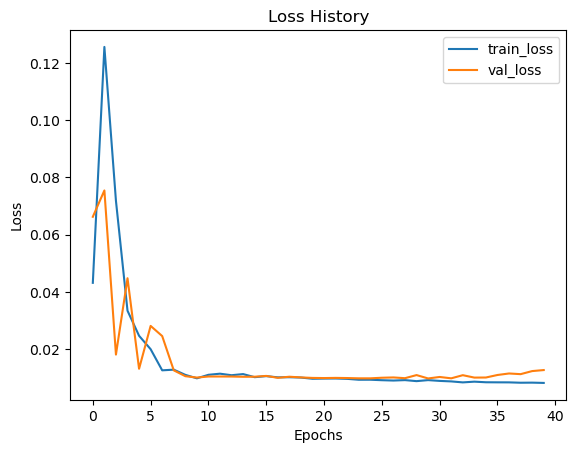

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

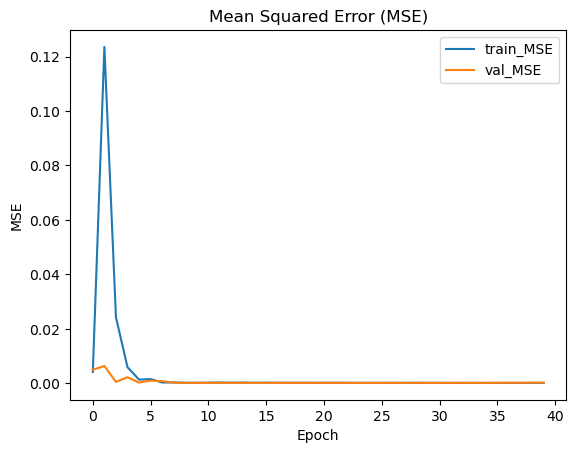

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

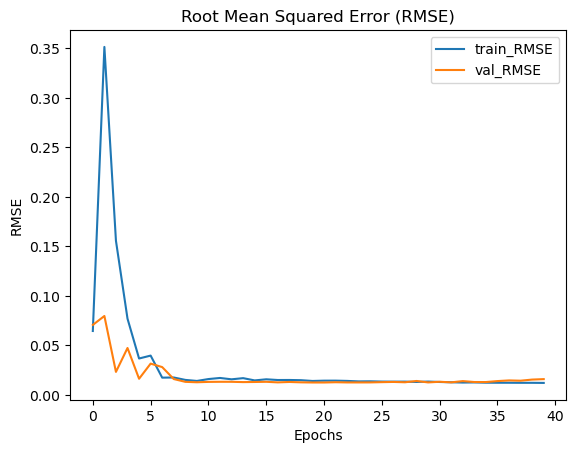

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

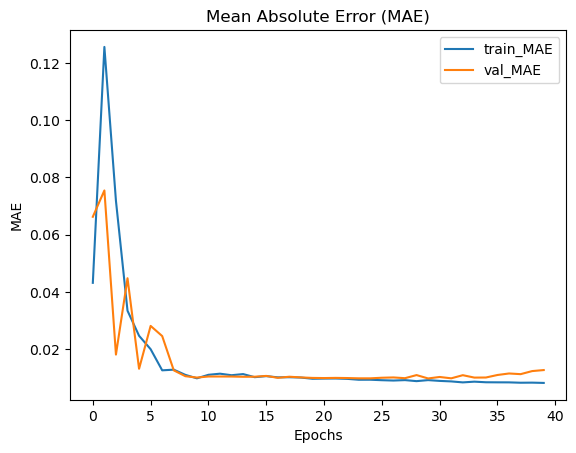

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

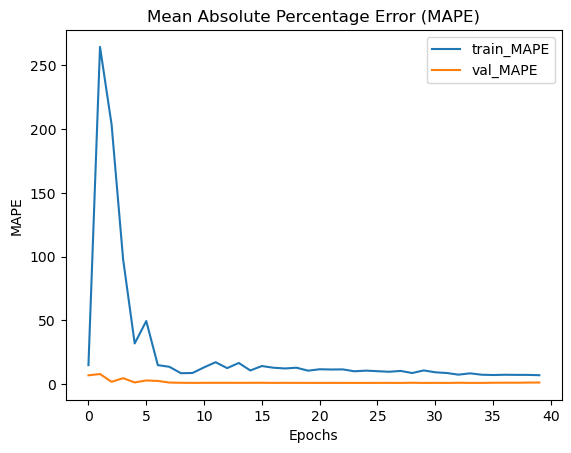

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:19:39.217227: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 2)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


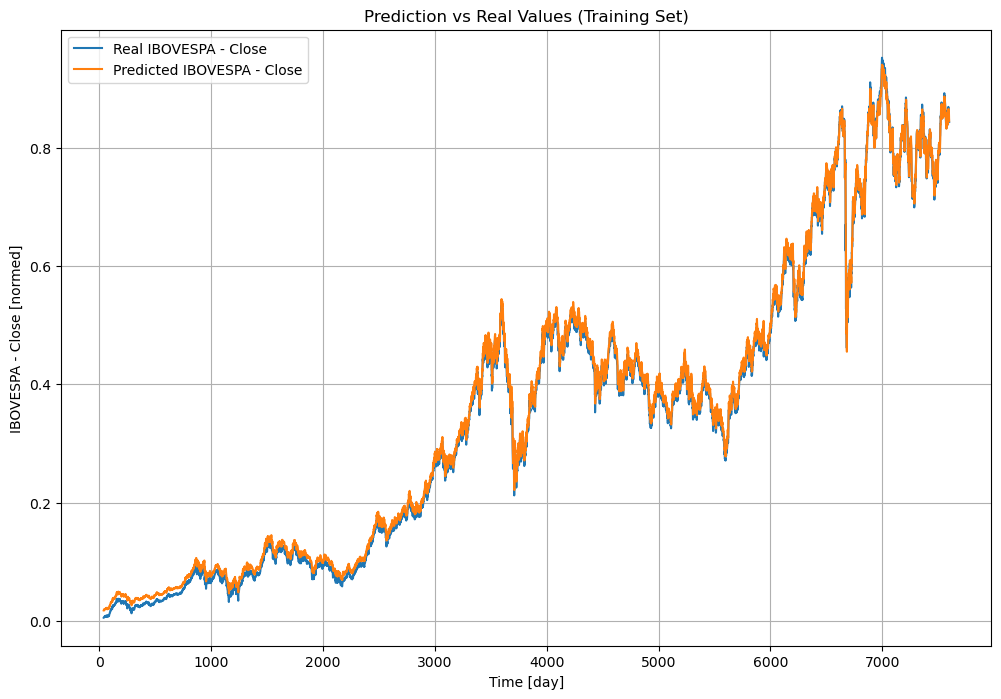

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


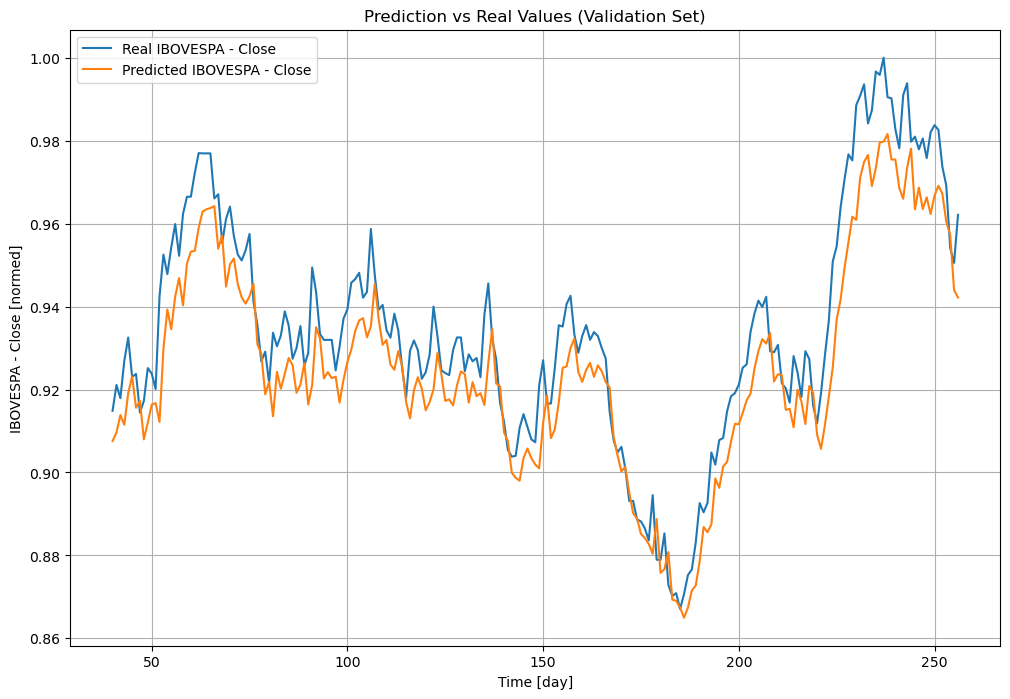

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


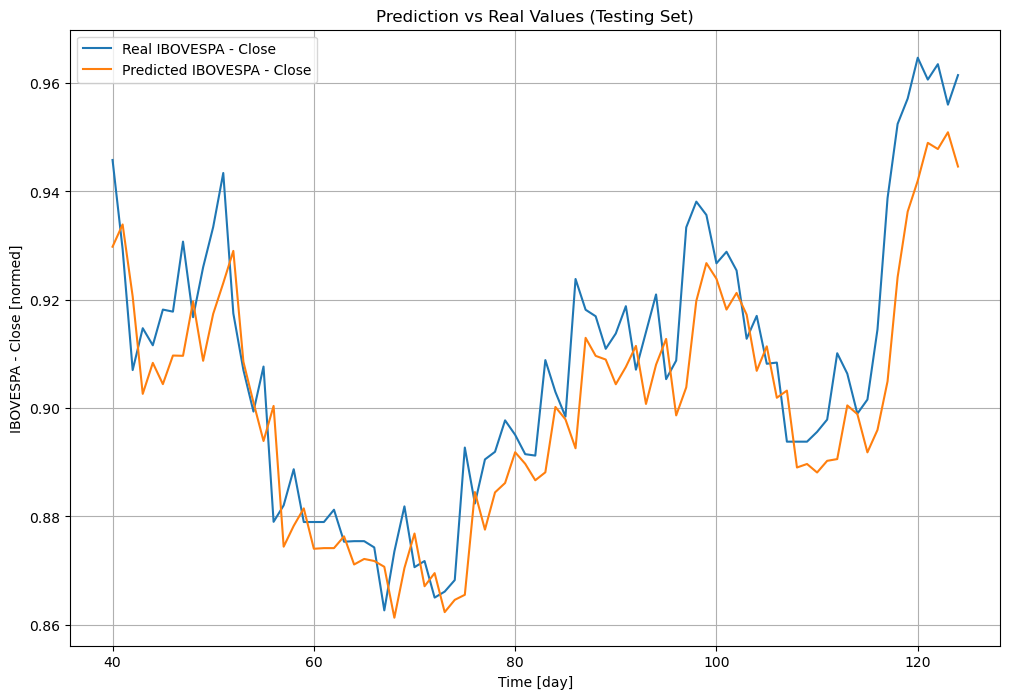

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

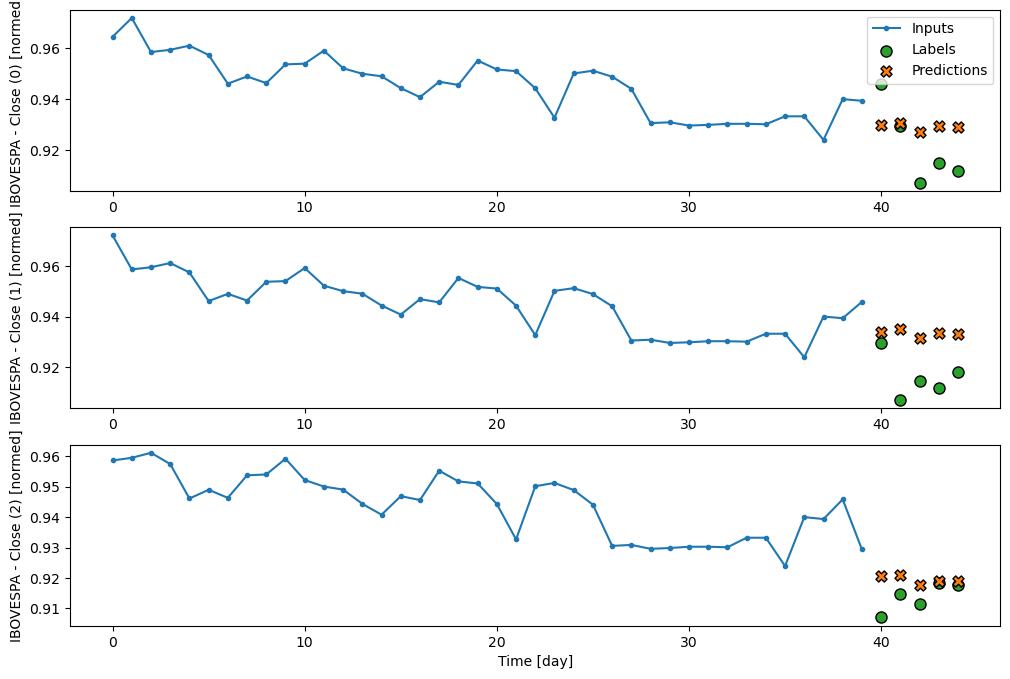

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:38s:822ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[[0.9297997 , 0.9297997 , 0.9297997 , ..., 0.9297997 ,
         0.9297997 , 0.9297997 ],
        [0.9306419 , 0.9306419 , 0.9306419 , ..., 0.9306419 ,
         0.9306419 , 0.9306419 ],
        [0.9271969 , 0.9271969 , 0.9271969 , ..., 0.9271969 ,
         0.9271969 , 0.9271969 ],
        [0.9294412 , 0.9294412 , 0.9294412 , ..., 0.9294412 ,
         0.9294412 , 0.9294412 ],
        [0.9291257 , 0.9291257 , 0.9291257 , ..., 0.9291257 ,
         0.9291259 , 0.9291259 ]],

       [[0.93390596, 0.93390596, 0.93390596, ..., 0.93390596,
         0.93390596, 0.93390596],
        [0.9349489 , 0.9349489 , 0.9349489 , ..., 0.9349489 ,
         0.9349489 , 0.9349489 ],
        [0.9313988 , 0.9313988 , 0.9313988 , ..., 0.9313988 ,
         0.9313988 , 0.9313988 ],
        [0.93365264, 0.93365264, 0.93365264, ..., 0.93365264,
         0.93365264, 0.93365264],
        [0.9331361 , 0.9331361 , 0.9331361 , ..., 0.9331361 ,
         0.9331362 , 0.9331362 ]],

       [[0.9206078 , 0.9206078 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')